# Problem Statement:

To predict the customers who are at high risk of churn in Telecom Sector.

To do this following two things are required 1) To predict customers who will churn 2) Identifying important predicator attributes which help the business understand the indicators of Churn

Note: few lines in the code took 3 to 4 minutes (graph plotting) and Random Forest (tuning with hyperparameters) took approximately one hour and SVM took more than 2 hours - hence for those steps we have mentioned "Not to execute those"
Also as we have run parallely - Random forest, SVM on different systems. Hence, we have screenshots for SVM in this file 
taken from the other file.

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

import os
import warnings
warnings.filterwarnings('ignore')

Telecom_data = pd.read_csv('telecom_churn_data.csv',encoding = 'palmos')

In [2]:
Telecom_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


Total observations 99999 Total number of features in raw data 226

In [3]:
# KEY DETERMINATION 
# As the data is customer based, let's confirm if mobile number variable is unique or not
UniqueIDInChurnData = Telecom_data.mobile_number.unique()
lenOfData = len(Telecom_data)
if len(UniqueIDInChurnData) == lenOfData:
    print("Mobile number is unique")
else: 
    print("Mobile number is not unique")

Mobile number is unique


In [4]:
# DATA CLEANING
print("Data Cleaning")
# check if there is any row where every attribute is missing
missingDataCount = Telecom_data.isnull().all(axis=1).sum()
print("Number of rows with all missing attrubutes is", missingDataCount)

Data Cleaning
Number of rows with all missing attrubutes is 0


In [5]:
# MISSING DATA IN COLUMNS
# Note: First we will focus on the missing data percentage of those columns 
# which are required to find the high value customers
# We will focus on the percentage of missing data in OTHER columns after finding the high value customers

# WHY?
# Because by dropping the column with high percentage of missing data before finding high value customers
# we may lose a column which had almost all the data for high value customer present but overall the missing percentage was high.

In [6]:
# Percentage of missing values in each column
missingDataCount = round((Telecom_data.isnull().sum()/lenOfData)*100,2)
print("Percentage of missing data \n", missingDataCount)

Percentage of missing data 
 mobile_number            0.00
circle_id                0.00
loc_og_t2o_mou           1.02
std_og_t2o_mou           1.02
loc_ic_t2o_mou           1.02
last_date_of_month_6     0.00
last_date_of_month_7     0.60
last_date_of_month_8     1.10
last_date_of_month_9     1.66
arpu_6                   0.00
arpu_7                   0.00
arpu_8                   0.00
arpu_9                   0.00
onnet_mou_6              3.94
onnet_mou_7              3.86
onnet_mou_8              5.38
onnet_mou_9              7.75
offnet_mou_6             3.94
offnet_mou_7             3.86
offnet_mou_8             5.38
offnet_mou_9             7.75
roam_ic_mou_6            3.94
roam_ic_mou_7            3.86
roam_ic_mou_8            5.38
roam_ic_mou_9            7.75
roam_og_mou_6            3.94
roam_og_mou_7            3.86
roam_og_mou_8            5.38
roam_og_mou_9            7.75
loc_og_t2t_mou_6         3.94
                        ...  
arpu_2g_9               74.08
night_pck_u

In [7]:
# missing data percentage more than 10 %
missingDataCount = pd.DataFrame(missingDataCount)
missingDataCountGreaterThan50 = missingDataCount.loc[missingDataCount[0]>=10]
missingDataCountGreaterThan50

0
date_of_last_rech_data_6  74.85
date_of_last_rech_data_7  74.43
date_of_last_rech_data_8  73.66
date_of_last_rech_data_9  74.08
total_rech_data_6         74.85
total_rech_data_7         74.43
total_rech_data_8         73.66
total_rech_data_9         74.08
max_rech_data_6           74.85
max_rech_data_7           74.43
max_rech_data_8           73.66
max_rech_data_9           74.08
count_rech_2g_6           74.85
count_rech_2g_7           74.43
count_rech_2g_8           73.66
count_rech_2g_9           74.08
count_rech_3g_6           74.85
count_rech_3g_7           74.43
count_rech_3g_8           73.66
count_rech_3g_9           74.08
av_rech_amt_data_6        74.85
av_rech_amt_data_7        74.43
av_rech_amt_data_8        73.66
av_rech_amt_data_9        74.08
arpu_3g_6                 74.85
arpu_3g_7                 74.43
arpu_3g_8                 73.66
arpu_3g_9                 74.08
arpu_2g_6                 74.85
arpu_2g_7                 74.43
arpu_2g_8                 73.66
arpu_2g_9                 74.08
night_pck_user_6          74.85
night_pck_user_7          74.43
night_pck_user_8          73.66
night_pck_user_9          74.08
fb_user_6                 74.85
fb_user_7                 74.43
fb_user_8                 73.66
fb_user_9                 74.08

NOTE: REMOVAL OF DATA BELONGING TO POSTPAID IS NOT REQUIRED as it will automatically get removed (if exists) when selecting high value customer as it's recharge amount would be 0.

In [8]:
# Let's go requirement by requirement
# I) to find high value customers 
# 70th percentile of the average recharge amount in the first two months
# Average recharge amount in first two months = (total recharge amount of 6 + total recharge amount of 7)/2
# = (total call recharge amount of 6 + total data recharge amount of 6 + total call rechagre amount of 7 + total data recharge amount of 7)/2
# Columns required to find this are
# total_rech_amt_6, total_rech_amt_7                                           No action required
# total_rech_data_6, total_rech_data_7, av_rech_amt_data_6, av_rech_amt_data_7 Impute missing values

# here imputing values is required do it for month 8 and 9 also to keep the data consistent for further requirement

In [9]:
# Let's analyse the columns where missing value imputation is required
Telecom_data.loc[:,['arpu_3g_6', 'arpu_3g_6','arpu_3g_7','arpu_3g_8','arpu_2g_6','arpu_2g_7','arpu_2g_8','arpu_2g_9','av_rech_amt_data_6','av_rech_amt_data_7',
              'av_rech_amt_data_8','av_rech_amt_data_9', 'total_rech_data_6','total_rech_data_7','av_rech_amt_data_6','av_rech_amt_data_6']].head()

arpu_3g_6  arpu_3g_6  arpu_3g_7  arpu_3g_8  arpu_2g_6  arpu_2g_7  \
0     212.17     212.17     212.17     212.17     212.17     212.17   
1        NaN        NaN       0.00       0.00        NaN      28.61   
2        NaN        NaN        NaN        NaN        NaN        NaN   
3        NaN        NaN        NaN        NaN        NaN        NaN   
4       0.00       0.00        NaN        NaN       0.00        NaN   

   arpu_2g_8  arpu_2g_9  av_rech_amt_data_6  av_rech_amt_data_7  \
0     212.17        NaN               252.0               252.0   
1       7.60        NaN                 NaN               154.0   
2        NaN        0.0                 NaN                 NaN   
3        NaN        NaN                 NaN                 NaN   
4        NaN        NaN                56.0                 NaN   

   av_rech_amt_data_8  av_rech_amt_data_9  total_rech_data_6  \
0               252.0                 NaN                1.0   
1                50.0                 NaN                NaN   
2                 NaN                46.0                NaN   
3                 NaN                 NaN                NaN   
4                 NaN                 NaN                1.0   

   total_rech_data_7  av_rech_amt_data_6  av_rech_amt_data_6  
0                1.0               252.0               252.0  
1                1.0                 NaN                 NaN  
2                NaN                 NaN                 NaN  
3                NaN                 NaN                 NaN  
4                NaN                56.0                56.0

In [10]:
# All these are amounts or revenue i.e. numeric values
# The recharge columns have minimum value 1 and not 0 and all the rows with missing values also have the dates of recharge columns missing
# which indicates no recharge was done. Thus impute the missing value with 0
columns = ['arpu_3g_6', 'arpu_3g_7','arpu_3g_8','arpu_3g_9','arpu_2g_6','arpu_2g_7','arpu_2g_8','arpu_2g_9','arpu_6','arpu_7','arpu_8','arpu_9','av_rech_amt_data_6','av_rech_amt_data_7',
              'av_rech_amt_data_8','av_rech_amt_data_9', 'total_rech_data_6','total_rech_data_7','total_rech_data_8','total_rech_data_9', 'av_rech_amt_data_8','av_rech_amt_data_9','max_rech_data_6','max_rech_data_7','max_rech_data_8','max_rech_data_9']
Telecom_data[columns] = Telecom_data[columns].fillna(0)

In [11]:
Telecom_data.loc[:,['arpu_3g_6', 'arpu_3g_7','arpu_3g_8','arpu_3g_9','arpu_2g_6','arpu_2g_7','arpu_2g_8','arpu_2g_9','arpu_6','arpu_7','arpu_8','arpu_9','av_rech_amt_data_6','av_rech_amt_data_7',
              'av_rech_amt_data_8','av_rech_amt_data_9', 'total_rech_data_6','total_rech_data_7','av_rech_amt_data_8','av_rech_amt_data_9','max_rech_data_6','max_rech_data_7','max_rech_data_8','max_rech_data_9']].head()

arpu_3g_6  arpu_3g_7  arpu_3g_8  arpu_3g_9  arpu_2g_6  arpu_2g_7  \
0     212.17     212.17     212.17       0.00     212.17     212.17   
1       0.00       0.00       0.00       0.00       0.00      28.61   
2       0.00       0.00       0.00       2.84       0.00       0.00   
3       0.00       0.00       0.00       0.00       0.00       0.00   
4       0.00       0.00       0.00       0.00       0.00       0.00   

   arpu_2g_8  arpu_2g_9   arpu_6   arpu_7       ...         \
0     212.17        0.0  197.385  214.816       ...          
1       7.60        0.0   34.047  355.074       ...          
2       0.00        0.0  167.690  189.058       ...          
3       0.00        0.0  221.338  251.102       ...          
4       0.00        0.0  261.636  309.876       ...          

   av_rech_amt_data_8  av_rech_amt_data_9  total_rech_data_6  \
0               252.0                 0.0                1.0   
1                50.0                 0.0                0.0   
2                 0.0                46.0                0.0   
3                 0.0                 0.0                0.0   
4                 0.0                 0.0                1.0   

   total_rech_data_7  av_rech_amt_data_8  av_rech_amt_data_9  max_rech_data_6  \
0                1.0               252.0                 0.0            252.0   
1                1.0                50.0                 0.0              0.0   
2                0.0                 0.0                46.0              0.0   
3                0.0                 0.0                 0.0              0.0   
4                0.0                 0.0                 0.0             56.0   

   max_rech_data_7  max_rech_data_8  max_rech_data_9  
0            252.0            252.0              0.0  
1            154.0             25.0              0.0  
2              0.0              0.0             46.0  
3              0.0              0.0              0.0  
4              0.0              0.0              0.0  

[5 rows x 24 columns]

In [12]:
# VBC Columns is Volume based cost - when no specific scheme is not purchased and paid as per usage
# in prepaid we cannot pay per usage, we pay first and then use hence, this seems to be a post paid column but it has values for 
# those customers who have got recharge on their mobile which means this columnn is not just for postpaid; it combines both hence, of no use to define prepaid
Telecom_data.rename(columns={"jul_vbc_3g":"vbc_3g_7", "sep_vbc_3g":"vbc_3g_9","aug_vbc_3g":"vbc_3g_8", "jun_vbc_3g":"vbc_3g_6"}, inplace=True)

Let's analyse other variables to be used if those have missing data

In [13]:
missingDataCount = round((Telecom_data.isnull().sum()/lenOfData)*100,2)
Telecom_data.loc[:,['total_rech_amt_6', 'total_rech_amt_7', 'total_rech_num_6', 'total_rech_num_7']].isnull().sum()

total_rech_amt_6    0
total_rech_amt_7    0
total_rech_num_6    0
total_rech_num_7    0
dtype: int64

In [14]:
# Derived Columns for finding average recharge amount Note: as of now we do not need to derive it for month 9
Telecom_data['total_rech_data_amt_6'] = Telecom_data['total_rech_data_6'] * Telecom_data['av_rech_amt_data_6']
Telecom_data['total_rech_data_amt_7'] = Telecom_data['total_rech_data_7'] * Telecom_data['av_rech_amt_data_7']
Telecom_data['total_rech_data_amt_8'] = Telecom_data['total_rech_data_8'] * Telecom_data['av_rech_amt_data_8']
Telecom_data['avg_rech_amnt'] = (Telecom_data['total_rech_amt_6']  + Telecom_data['total_rech_data_amt_6'] + Telecom_data['total_rech_amt_7'] + Telecom_data['total_rech_data_amt_7'])/ 4
Telecom_data['avg_rech_amnt_8'] = (Telecom_data['total_rech_amt_8'] + Telecom_data['total_rech_data_amt_8'])/2
# Find the 70th percentile of the average recharge amount in the first two months
threshold = Telecom_data.avg_rech_amnt.quantile(0.7)
print("Threshold for High Value customer's recharge amount is", threshold)

Threshold for High Value customer's recharge amount is 239.0


In [15]:
# Filter the data on the basis of 70 percentile 
churn_high_value = Telecom_data.loc[Telecom_data.avg_rech_amnt >= threshold]

In [16]:
churn_high_value.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30001 entries, 0 to 99997
Columns: 231 entries, mobile_number to avg_rech_amnt_8
dtypes: float64(184), int64(35), object(12)
memory usage: 53.1+ MB


In [17]:
lenOfData = 30001

In [18]:
# Percentage of missing values in each column after filtering High Value Customer
missingDataCount = round((churn_high_value.isnull().sum()/lenOfData)*100,2)

In [19]:
missingDataCount = pd.DataFrame(missingDataCount)
missingDataCountGreaterThan10 = missingDataCount.loc[missingDataCount[0]>=10]
missingDataCountGreaterThan10

0
date_of_last_rech_data_6  44.15
date_of_last_rech_data_7  43.15
date_of_last_rech_data_8  46.83
date_of_last_rech_data_9  49.27
count_rech_2g_6           44.15
count_rech_2g_7           43.15
count_rech_2g_8           46.83
count_rech_2g_9           49.27
count_rech_3g_6           44.15
count_rech_3g_7           43.15
count_rech_3g_8           46.83
count_rech_3g_9           49.27
night_pck_user_6          44.15
night_pck_user_7          43.15
night_pck_user_8          46.83
night_pck_user_9          49.27
fb_user_6                 44.15
fb_user_7                 43.15
fb_user_8                 46.83
fb_user_9                 49.27

In [20]:
# As we can see that all the above mentioned columns have more than 40 % of the missing data
# Let's look at the percentage of missing data which have percentage less than 40% but not equal to 0%
missingDataCountLessThan40 = missingDataCount.loc[(missingDataCount[0]<40) & (missingDataCount[0]!=0)]
len(missingDataCountLessThan40)

126

In [21]:
# Columns with less than 40% data missing are 126 
# Missing Count less than 7% but not equal to 0%
missingDataCountLessThan7 = missingDataCount.loc[(missingDataCount[0]<7) & (missingDataCount[0]!=0)]
len(missingDataCountLessThan7)

126

In [22]:
# Missing Count less than 6% 
missingDataCountLessThan6 = missingDataCount.loc[(missingDataCount[0]<6) & (missingDataCount[0]!=0)]
len(missingDataCountLessThan6)

97

In [23]:
# As the number of observations for <7% and <40% is same which means all are below 7% nothing lies between 7% and 50%
# Hence, the data can be divided in 3 pairs
# 1. Where 0% data is missing - NO Action required
# 2. Where less than 7% data is missing
# 3. where more than 40% data is missing - REMOVE THESE COLUMNS WHICH ARE NOT REQUIRED (Done later)

In [24]:
# Let's impute the values with -1 to treat it as a new category in categorical columns
columns = ['night_pck_user_6', 'night_pck_user_7','night_pck_user_8','fb_user_6','fb_user_7','fb_user_8']
churn_high_value[columns] = churn_high_value[columns].fillna(-1)

In [25]:
# Let's now find which columns have very low variance 
count = churn_high_value.nunique()
count = pd.DataFrame(count)
count_one_unique = count.loc[count[0] == 1]
count_one_unique

0
circle_id             1
loc_og_t2o_mou        1
std_og_t2o_mou        1
loc_ic_t2o_mou        1
last_date_of_month_6  1
last_date_of_month_7  1
last_date_of_month_8  1
last_date_of_month_9  1
std_og_t2c_mou_6      1
std_og_t2c_mou_7      1
std_og_t2c_mou_8      1
std_og_t2c_mou_9      1
std_ic_t2o_mou_6      1
std_ic_t2o_mou_7      1
std_ic_t2o_mou_8      1
std_ic_t2o_mou_9      1

In [26]:
# Above columns have just one value which means it does not provide any information which could be used to find the pattern
# Hence, remove the columns with such low variance
count_one_unique = count_one_unique.reset_index()
count_one_unique.rename(columns={0:"count", "index":"colName"}, inplace=True)
column_list = count_one_unique.colName
churn_high_value.drop(columns=column_list, inplace=True)
churn_high_value.head()

mobile_number    arpu_6    arpu_7    arpu_8   arpu_9  onnet_mou_6  \
0      7000842753   197.385   214.816   213.803   21.100          NaN   
7      7000701601  1069.180  1349.850  3171.480  500.000        57.84   
8      7001524846   378.721   492.223   137.362  166.787       413.69   
21     7002124215   514.453   597.753   637.760  578.596       102.41   
23     7000887461    74.350   193.897   366.966  811.480        48.96   

    onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6       ...         aon  \
0           NaN         0.00          NaN           NaN       ...         968   
7         54.68        52.29          NaN        453.43       ...         802   
8        351.03        35.08        33.46         94.66       ...         315   
21       132.11        85.14       161.63        757.93       ...         720   
23        50.66        33.58        15.74         85.41       ...         604   

    vbc_3g_8  vbc_3g_7  vbc_3g_6  vbc_3g_9  total_rech_data_amt_6  \
0      30.40      0.00    101.20      3.58                  252.0   
7      57.74     19.38     18.74      0.00                    0.0   
8      21.03    910.65    122.16      0.00                    0.0   
21      0.00      0.00      0.00      0.00                    0.0   
23     40.45     51.86      0.00      0.00                    0.0   

    total_rech_data_amt_7  total_rech_data_amt_8  avg_rech_amnt  \
0                   252.0                  252.0          279.5   
7                     0.0                    0.0          592.5   
8                   354.0                  207.0          348.0   
21                    0.0                    0.0          320.0   
23                  712.0                  540.0          291.5   

    avg_rech_amnt_8  
0             252.0  
7            1819.0  
8             163.5  
21            359.0  
23            489.5  

[5 rows x 215 columns]

In [27]:
# Tag the churn customers based on Usage Based Churn 
churn_high_value['churn'] = churn_high_value.apply(lambda x: 1 if (x['total_ic_mou_9'] == 0 and x['total_og_mou_9'] == 0 and x['vol_2g_mb_9'] == 0 and x['vol_3g_mb_9'] == 0) else 0, axis=1)
churn_high_value.head()

mobile_number    arpu_6    arpu_7    arpu_8   arpu_9  onnet_mou_6  \
0      7000842753   197.385   214.816   213.803   21.100          NaN   
7      7000701601  1069.180  1349.850  3171.480  500.000        57.84   
8      7001524846   378.721   492.223   137.362  166.787       413.69   
21     7002124215   514.453   597.753   637.760  578.596       102.41   
23     7000887461    74.350   193.897   366.966  811.480        48.96   

    onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  ...    vbc_3g_8  \
0           NaN         0.00          NaN           NaN  ...       30.40   
7         54.68        52.29          NaN        453.43  ...       57.74   
8        351.03        35.08        33.46         94.66  ...       21.03   
21       132.11        85.14       161.63        757.93  ...        0.00   
23        50.66        33.58        15.74         85.41  ...       40.45   

    vbc_3g_7  vbc_3g_6  vbc_3g_9  total_rech_data_amt_6  \
0       0.00    101.20      3.58                  252.0   
7      19.38     18.74      0.00                    0.0   
8     910.65    122.16      0.00                    0.0   
21      0.00      0.00      0.00                    0.0   
23     51.86      0.00      0.00                    0.0   

    total_rech_data_amt_7  total_rech_data_amt_8  avg_rech_amnt  \
0                   252.0                  252.0          279.5   
7                     0.0                    0.0          592.5   
8                   354.0                  207.0          348.0   
21                    0.0                    0.0          320.0   
23                  712.0                  540.0          291.5   

    avg_rech_amnt_8  churn  
0             252.0      1  
7            1819.0      1  
8             163.5      0  
21            359.0      0  
23            489.5      0  

[5 rows x 216 columns]

In [28]:
missingDataCount = round((Telecom_data.isnull().sum()/lenOfData)*100,2)
churn_high_value.loc[:,['churn']].isnull().sum()

churn    0
dtype: int64

In [29]:
# Delete the columns which ends with _9 because we dont need to analyze the last month data 
churn_high_value.drop(columns = [column for column in churn_high_value if column.endswith('_9')], inplace = True)

In [30]:
churn_high_value.shape

(30001, 164)

In [31]:
churn_high_value.fillna(0, inplace=True)

In [32]:
# Analysis on categorical features
eachValueCount = churn_high_value.groupby(['fb_user_6','churn']).agg({'churn':'count'})
eachValueCount

churn
fb_user_6 churn       
-1.0      0      11937
          1       1308
 0.0      0       1136
          1         95
 1.0      0      14487
          1       1038

# YOU MAY SKIP RUNNING THE BELOW CODE AS IT TAKES 4 TO 5 MINUTES TO RUN

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Checking to see the distribution
dfUA = churn_high_value.groupby(['fb_user_6','churn']).fb_user_6.count()
dfUA = pd.DataFrame(dfUA)
dfUA = dfUA.rename(columns={'fb_user_6' : 'churn_count'})
dfUA.reset_index(inplace=True)
print(dfUA.head(10))
plt.figure(figsize = (12,8))
plt.title("Univariate Analysis - fb_user_6 count")
sns.barplot(x='fb_user_6', y = 'churn_count', data = dfUA)
plt.xlabel("fb_user_6")
plt.ylabel("churn_count")
plt.show()

# RESULT OF THE ABOVE CODE (added as a screen shot from the file where it was run)

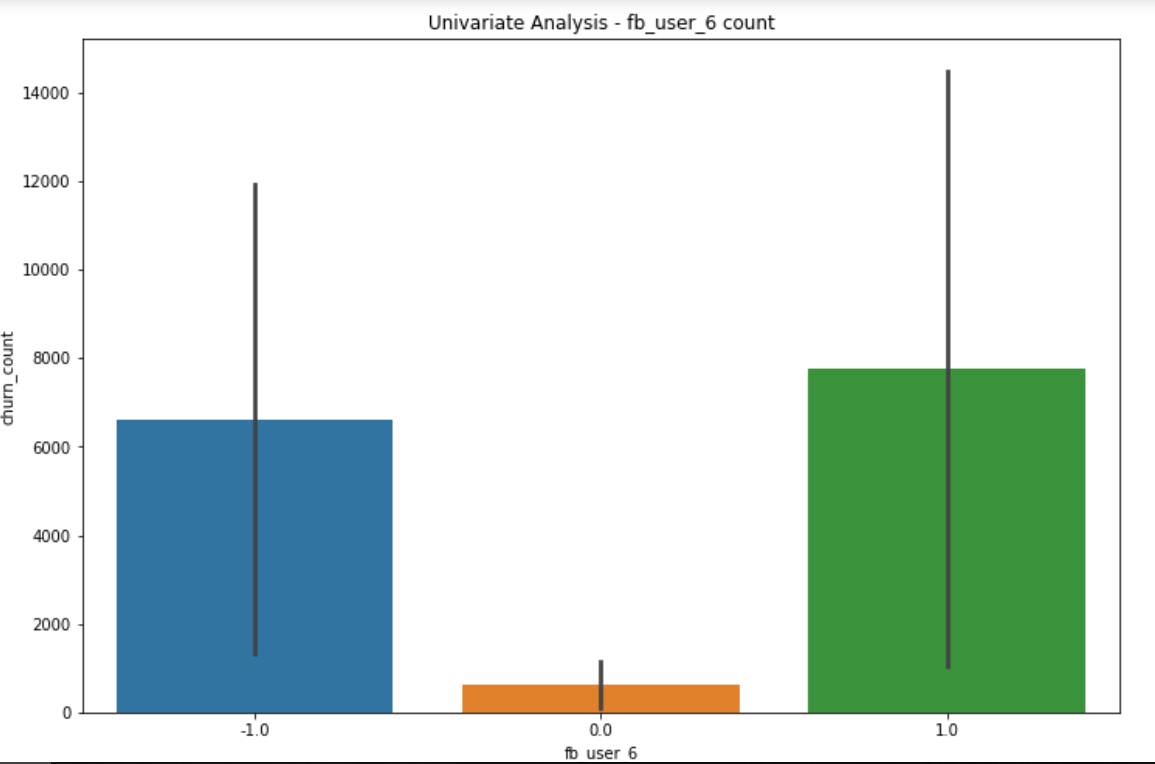

### You can run the below code

In [33]:
# Replacing the labels of categorical columns with churn rate in each label 
# In order to run PCA we should not keep any categorical variables and churn rate would be the perfect indicator of each category
fb_user_6_plus_one_rows = churn_high_value.loc[churn_high_value['fb_user_6'] == 1.0]
churn_fraction = fb_user_6_plus_one_rows["churn"].sum()/fb_user_6_plus_one_rows["churn"].count()
churn_high_value.loc[churn_high_value['fb_user_6'] == 1.0, ['fb_user_6']] = churn_fraction.round(5)

fb_user_6_minus_one_rows = churn_high_value.loc[churn_high_value['fb_user_6'] == -1.0]
churn_fraction = fb_user_6_minus_one_rows["churn"].sum()/fb_user_6_minus_one_rows["churn"].count()
churn_high_value.loc[churn_high_value['fb_user_6'] == -1.0, ['fb_user_6']] = churn_fraction.round(5)

fb_user_6_zero_rows = churn_high_value.loc[churn_high_value['fb_user_6'] == 0.0]
churn_fraction = fb_user_6_zero_rows["churn"].sum()/fb_user_6_zero_rows["churn"].count()
churn_high_value.loc[churn_high_value['fb_user_6'] == 0.0, ['fb_user_6']] = churn_fraction.round(5)

In [34]:
t = churn_high_value.groupby('fb_user_6').count()
t

mobile_number  arpu_6  arpu_7  arpu_8  onnet_mou_6  onnet_mou_7  \
fb_user_6                                                                    
0.06686            15525   15525   15525   15525        15525        15525   
0.07717             1231    1231    1231    1231         1231         1231   
0.09875            13245   13245   13245   13245        13245        13245   

           onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  ...    \
fb_user_6                                                         ...     
0.06686          15525         15525         15525         15525  ...     
0.07717           1231          1231          1231          1231  ...     
0.09875          13245         13245         13245         13245  ...     

             aon  vbc_3g_8  vbc_3g_7  vbc_3g_6  total_rech_data_amt_6  \
fb_user_6                                                               
0.06686    15525     15525     15525     15525                  15525   
0.07717     1231      1231      1231      1231                   1231   
0.09875    13245     13245     13245     13245                  13245   

           total_rech_data_amt_7  total_rech_data_amt_8  avg_rech_amnt  \
fb_user_6                                                                
0.06686                    15525                  15525          15525   
0.07717                     1231                   1231           1231   
0.09875                    13245                  13245          13245   

           avg_rech_amnt_8  churn  
fb_user_6                          
0.06686              15525  15525  
0.07717               1231   1231  
0.09875              13245  13245  

[3 rows x 163 columns]

In [35]:
# Similarly let's do it for month 7
fb_user_7_plus_one_rows = churn_high_value.loc[churn_high_value['fb_user_7'] == 1.0]
churn_fraction = fb_user_7_plus_one_rows["churn"].sum()/fb_user_7_plus_one_rows["churn"].count()
churn_high_value.loc[churn_high_value['fb_user_7'] == 1.0, ['fb_user_7']] = churn_fraction.round(5)

fb_user_7_minus_one_rows = churn_high_value.loc[churn_high_value['fb_user_7'] == -1.0]
churn_fraction = fb_user_7_minus_one_rows["churn"].sum()/fb_user_7_minus_one_rows["churn"].count()
churn_high_value.loc[churn_high_value['fb_user_7'] == -1.0, ['fb_user_7']] = churn_fraction.round(5)

fb_user_7_zero_rows = churn_high_value.loc[churn_high_value['fb_user_7'] == 0.0]
churn_fraction = fb_user_7_zero_rows["churn"].sum()/fb_user_7_zero_rows["churn"].count()
churn_high_value.loc[churn_high_value['fb_user_7'] == 0.0, ['fb_user_7']] = churn_fraction.round(5)

In [36]:
t = churn_high_value.groupby('fb_user_7').count()
t

mobile_number  arpu_6  arpu_7  arpu_8  onnet_mou_6  onnet_mou_7  \
fb_user_7                                                                    
0.05515            15722   15722   15722   15722        15722        15722   
0.06592             1335    1335    1335    1335         1335         1335   
0.11480            12944   12944   12944   12944        12944        12944   

           onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  ...    \
fb_user_7                                                         ...     
0.05515          15722         15722         15722         15722  ...     
0.06592           1335          1335          1335          1335  ...     
0.11480          12944         12944         12944         12944  ...     

             aon  vbc_3g_8  vbc_3g_7  vbc_3g_6  total_rech_data_amt_6  \
fb_user_7                                                               
0.05515    15722     15722     15722     15722                  15722   
0.06592     1335      1335      1335      1335                   1335   
0.11480    12944     12944     12944     12944                  12944   

           total_rech_data_amt_7  total_rech_data_amt_8  avg_rech_amnt  \
fb_user_7                                                                
0.05515                    15722                  15722          15722   
0.06592                     1335                   1335           1335   
0.11480                    12944                  12944          12944   

           avg_rech_amnt_8  churn  
fb_user_7                          
0.05515              15722  15722  
0.06592               1335   1335  
0.11480              12944  12944  

[3 rows x 163 columns]

# DO NOT RUN THE BELOW CODE AS IT TAKES LOT OF TIME

In [ ]:
# Checking to see the distribution for fb_user_7
dfUA7 = churn_high_value.groupby(['fb_user_7','churn']).fb_user_7.count()
dfUA7 = pd.DataFrame(dfUA7)
dfUA7 = dfUA7.rename(columns={'fb_user_7' : 'churn_count'})
dfUA7.reset_index(inplace=True)
print(dfUA7.head(10))
plt.figure(figsize = (12,8))
plt.title("Univariate Analysis - fb_user_7 count")
sns.barplot(x='fb_user_7', y = 'churn_count', data = dfUA7)
plt.xlabel("fb_user_7")
plt.ylabel("churn_count")
plt.show()

# RESULT OF THE ABOVE CODE (added as a screen shot from the file where it was run)

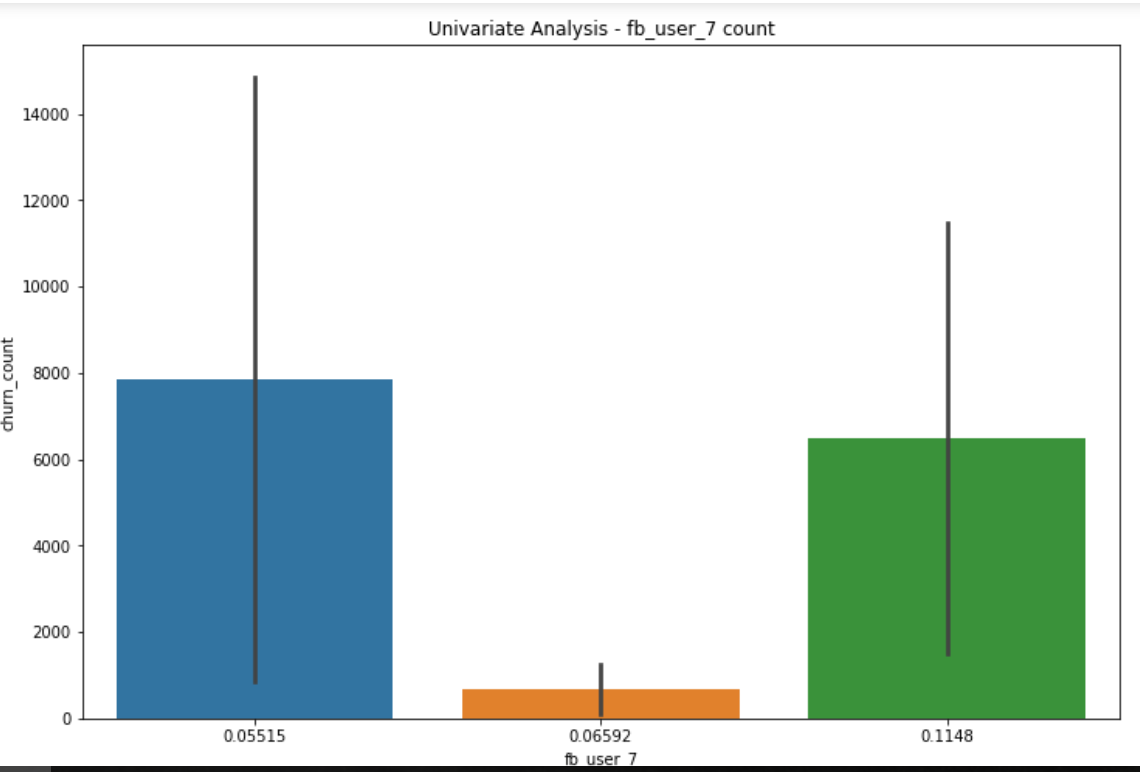

### You can run the below code

In [37]:
fb_user_8_plus_one_rows = churn_high_value.loc[churn_high_value['fb_user_8'] == 1.0]
churn_fraction = fb_user_8_plus_one_rows["churn"].sum()/fb_user_8_plus_one_rows["churn"].count()
churn_high_value.loc[churn_high_value['fb_user_8'] == 1.0, ['fb_user_8']] = churn_fraction.round(5)

fb_user_8_minus_one_rows = churn_high_value.loc[churn_high_value['fb_user_8'] == -1.0]
churn_fraction = fb_user_8_minus_one_rows["churn"].sum()/fb_user_8_minus_one_rows["churn"].count()
churn_high_value.loc[churn_high_value['fb_user_8'] == -1.0, ['fb_user_8']] = churn_fraction.round(5)

fb_user_8_zero_rows = churn_high_value.loc[churn_high_value['fb_user_8'] == 0.0]
churn_fraction = fb_user_8_zero_rows["churn"].sum()/fb_user_8_zero_rows["churn"].count()
churn_high_value.loc[churn_high_value['fb_user_8'] == 0.0, ['fb_user_8']] = churn_fraction.round(5)

# DO NOT RUN THE BELOW CODE AS IT TAKES LOT OF TIME

In [ ]:
# Checking to see the distribution fb_user_8
dfUA8 = churn_high_value.groupby(['fb_user_8','churn']).fb_user_8.count()
dfUA8 = pd.DataFrame(dfUA8)
dfUA8 = dfUA8.rename(columns={'fb_user_8' : 'churn_count'})
dfUA8.reset_index(inplace=True)
print(dfUA8.head(10))
plt.figure(figsize = (12,8))
plt.title("Univariate Analysis - fb_user_8 count")
sns.barplot(x='fb_user_8', y = 'churn_count', data = dfUA8)
plt.xlabel("fb_user_8")
plt.ylabel("churn_count")
plt.show()

# RESULT OF THE ABOVE CODE (added as a screen shot from the file where it was run)

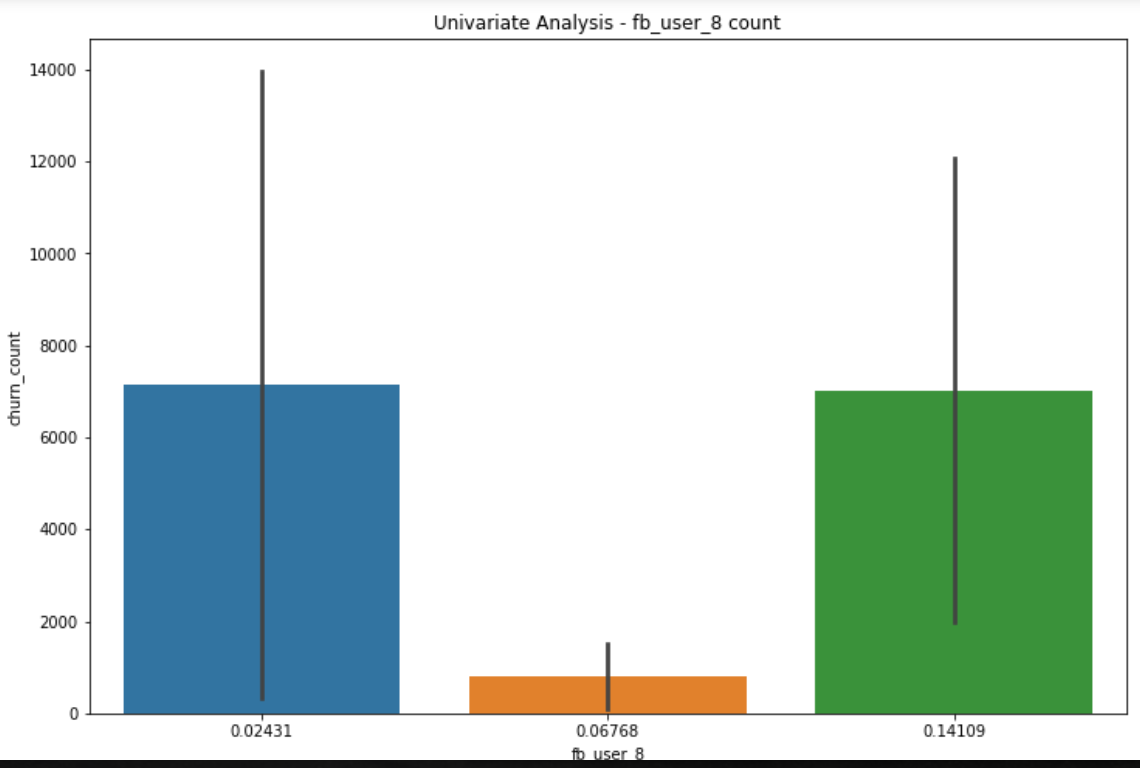

### You can run the below code

In [38]:
night_pack_user_6_plus_one_rows = churn_high_value.loc[churn_high_value['night_pck_user_6'] == 1.0]
churn_fraction = night_pack_user_6_plus_one_rows["churn"].sum()/night_pack_user_6_plus_one_rows["churn"].count()
churn_high_value.loc[churn_high_value['night_pck_user_6'] == 1.0, ['night_pck_user_6']] = churn_fraction.round(5)

night_pack_user_6_minus_one_rows = churn_high_value.loc[churn_high_value['night_pck_user_6'] == -1.0]
churn_fraction = night_pack_user_6_minus_one_rows["churn"].sum()/night_pack_user_6_minus_one_rows["churn"].count()
churn_high_value.loc[churn_high_value['night_pck_user_6'] == -1.0, ['night_pck_user_6']] = churn_fraction.round(5)

night_pack_user_6_zero_rows = churn_high_value.loc[churn_high_value['night_pck_user_6'] == 0.0]
churn_fraction = night_pack_user_6_zero_rows["churn"].sum()/night_pack_user_6_zero_rows["churn"].count()
churn_high_value.loc[churn_high_value['night_pck_user_6'] == 0.0, ['night_pck_user_6']] = churn_fraction.round(5)

# DO NOT RUN THE BELOW CODE AS IT TAKES LOT OF TIME

In [ ]:
# Checking to see the distribution night_pck_user_6
dfnp6 = churn_high_value.groupby(['night_pck_user_6','churn']).night_pck_user_6.count()
dfnp6 = pd.DataFrame(dfnp6)
dfnp6 = dfnp6.rename(columns={'night_pck_user_6' : 'churn_count'})
dfnp6.reset_index(inplace=True)
print(dfnp6.head(10))
plt.figure(figsize = (12,8))
plt.title("Univariate Analysis - night_pck_user_6 count")
sns.barplot(x='night_pck_user_6', y = 'churn_count', data = dfnp6)
plt.xlabel("night_pck_user_6")
plt.ylabel("churn_count")
plt.show()

# RESULT OF THE ABOVE CODE (added as a screen shot from the file where it was run)

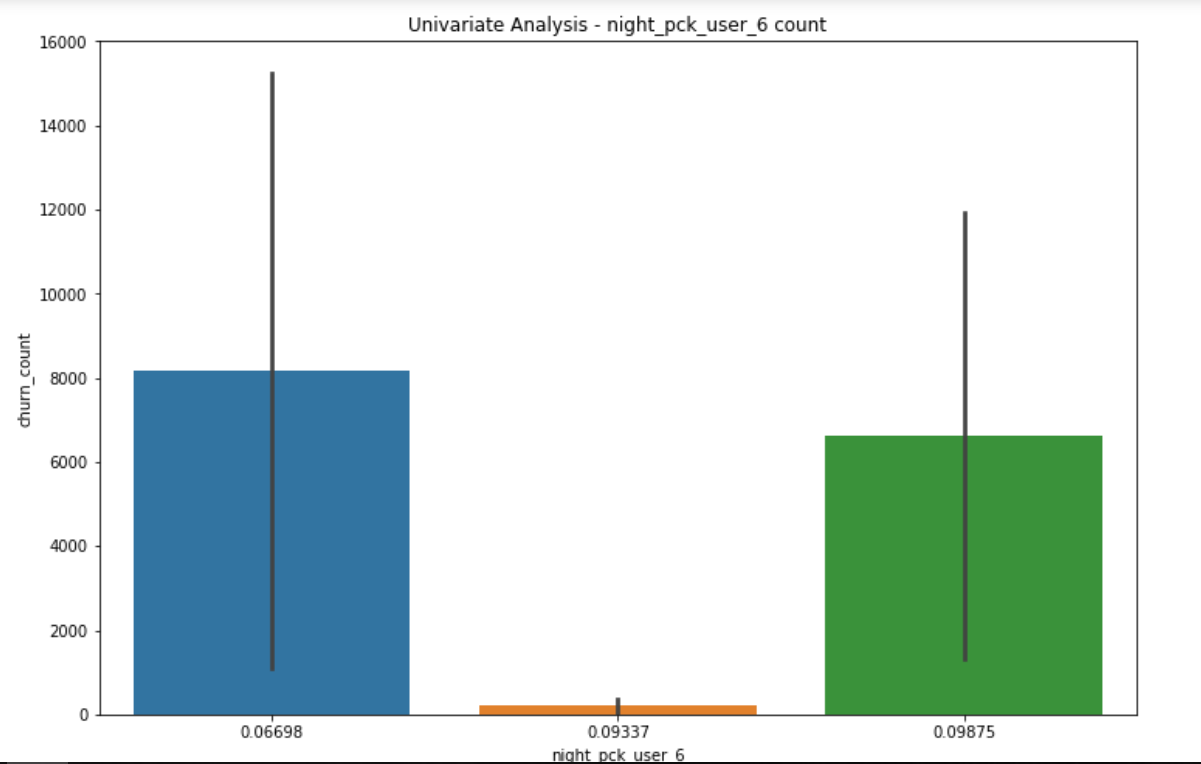

### You can run the below code

In [39]:
night_pack_user_7_plus_one_rows = churn_high_value.loc[churn_high_value['night_pck_user_7'] == 1.0]
churn_fraction = night_pack_user_7_plus_one_rows["churn"].sum()/night_pack_user_7_plus_one_rows["churn"].count()
churn_high_value.loc[churn_high_value['night_pck_user_7'] == 1.0, ['night_pck_user_7']] = churn_fraction.round(5)

night_pack_user_7_minus_one_rows = churn_high_value.loc[churn_high_value['night_pck_user_7'] == -1.0]
churn_fraction = night_pack_user_7_minus_one_rows["churn"].sum()/night_pack_user_7_minus_one_rows["churn"].count()
churn_high_value.loc[churn_high_value['night_pck_user_7'] == -1.0, ['night_pck_user_7']] = churn_fraction.round(5)

night_pack_user_7_zero_rows = churn_high_value.loc[churn_high_value['night_pck_user_7'] == 0.0]
churn_fraction = night_pack_user_7_zero_rows["churn"].sum()/night_pack_user_7_zero_rows["churn"].count()
churn_high_value.loc[churn_high_value['night_pck_user_7'] == 0.0, ['night_pck_user_7']] = churn_fraction.round(5)

# DO NOT RUN THE BELOW CODE AS IT TAKES LOT OF TIME

In [ ]:
# Checking to see the distribution night_pck_user_7
dfnp7 = churn_high_value.groupby(['night_pck_user_7','churn']).night_pck_user_7.count()
dfnp7 = pd.DataFrame(dfnp7)
dfnp7 = dfnp7.rename(columns={'night_pck_user_7' : 'churn_count'})
dfnp7.reset_index(inplace=True)
print(dfnp7.head(10))
plt.figure(figsize = (12,8))
plt.title("Univariate Analysis - night_pck_user_7 count")
sns.barplot(x='night_pck_user_7', y = 'churn_count', data = dfnp7)
plt.xlabel("night_pck_user_7")
plt.ylabel("churn_count")
plt.show()

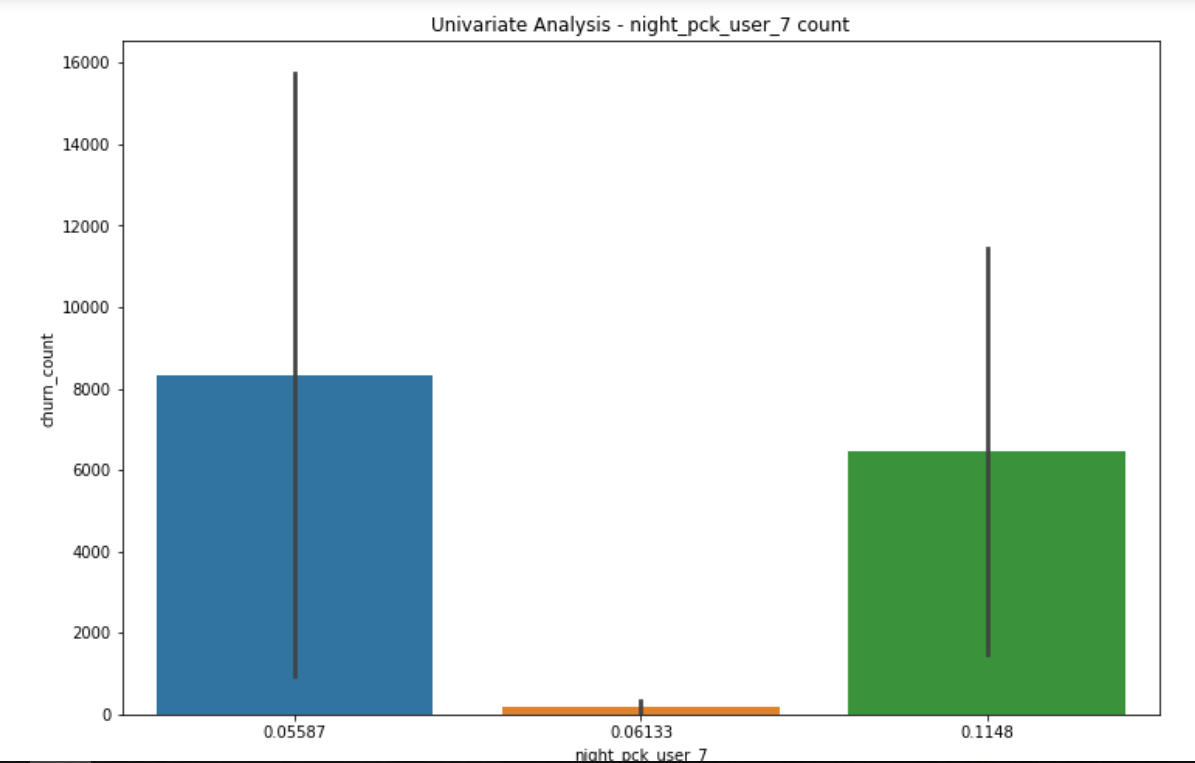

### You can run the below code

In [40]:
night_pack_user_8_plus_one_rows = churn_high_value.loc[churn_high_value['night_pck_user_8'] == 1.0]
churn_fraction = night_pack_user_8_plus_one_rows["churn"].sum()/night_pack_user_8_plus_one_rows["churn"].count()
churn_high_value.loc[churn_high_value['night_pck_user_8'] == 1.0, ['night_pck_user_8']] = churn_fraction.round(5)

night_pack_user_8_minus_one_rows = churn_high_value.loc[churn_high_value['night_pck_user_8'] == -1.0]
churn_fraction = night_pack_user_8_minus_one_rows["churn"].sum()/night_pack_user_8_minus_one_rows["churn"].count()
churn_high_value.loc[churn_high_value['night_pck_user_8'] == -1.0, ['night_pck_user_8']] = churn_fraction.round(5)

night_pack_user_8_zero_rows = churn_high_value.loc[churn_high_value['night_pck_user_8'] == 0.0]
churn_fraction = night_pack_user_8_zero_rows["churn"].sum()/night_pack_user_8_zero_rows["churn"].count()
churn_high_value.loc[churn_high_value['night_pck_user_8'] == 0.0, ['night_pck_user_8']] = churn_fraction.round(5)

# You may skip running the below code as it takes lot of time

In [ ]:
# Checking to see the distribution night_pck_user_8
dfnp8 = churn_high_value.groupby(['night_pck_user_8','churn']).night_pck_user_8.count()
dfnp8 = pd.DataFrame(dfnp8)
dfnp8 = dfnp8.rename(columns={'night_pck_user_8' : 'churn_count'})
dfnp8.reset_index(inplace=True)
print(dfnp8.head(10))
plt.figure(figsize = (12,8))
plt.title("Univariate Analysis - night_pck_user_8 count")
sns.barplot(x='night_pck_user_8', y = 'churn_count', data = dfnp8)
plt.xlabel("night_pck_user_8")
plt.ylabel("churn_count")
plt.show()

# RESULT OF THE ABOVE CODE (added as a screen shot from the file where it was run)

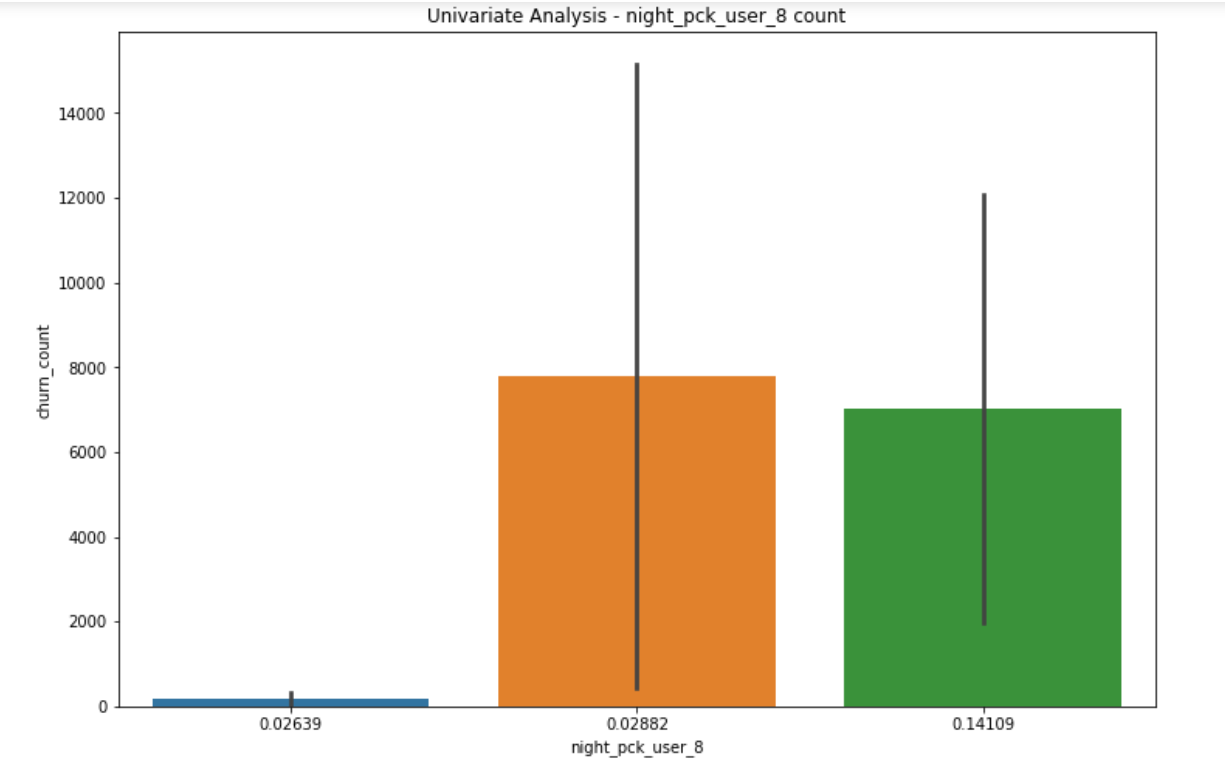

You can run the below code

In [41]:
# Delete the columns which start with date temporarily because we have to try other approach 
churn_high_value.drop(columns = [column for column in churn_high_value if column.startswith('date')], inplace = True)
churn_high_value.drop(columns = ['last_day_rch_amt_6','last_day_rch_amt_7','last_day_rch_amt_8'],inplace = True)
# Also remove columns with high percentage of missing value and which are not required
churn_high_value.drop(columns = ['count_rech_2g_6','count_rech_2g_7','count_rech_2g_8','count_rech_2g_6','count_rech_2g_7','count_rech_2g_8'],inplace = True)
churn_high_value.drop(columns = ['mobile_number','total_rech_data_6','total_rech_data_7','total_rech_data_8','av_rech_amt_data_6','av_rech_amt_data_7','av_rech_amt_data_8'],inplace = True)
# Note there are columns which are already in the data set as derived columns for example 
# onnet_mou_6 is the sum of all the calls in the same network like std_og_t2t_mou_6, loc_og_t2t_mou_6 etc.
# Let's keep for the timing these as derived columns - we will further have to drop some to remove multicolinearity
# Dropping mobile_number for now as it does not require to be a part of standardisation

More derived columns

In [42]:
churn_high_value['avg_arpu'] = ( churn_high_value['arpu_6']  + churn_high_value['arpu_7'] ) / 2
churn_high_value['avg_onnet_mou'] = ( churn_high_value['onnet_mou_6']  + churn_high_value['onnet_mou_7'] ) / 2
churn_high_value['avg_offnet_mou'] = ( churn_high_value['offnet_mou_6']  + churn_high_value['offnet_mou_7'] ) / 2
churn_high_value['avg_roam_ic_mou'] = ( churn_high_value['roam_ic_mou_6']  + churn_high_value['roam_ic_mou_7'] ) / 2

churn_high_value['avg_roam_og_mou'] = ( churn_high_value['roam_og_mou_6']  + churn_high_value['roam_og_mou_7'] ) / 2
churn_high_value['avg_loc_og_t2t_mou'] = ( churn_high_value['loc_og_t2t_mou_6']  + churn_high_value['loc_og_t2t_mou_7'] ) / 2
churn_high_value['avg_loc_og_t2m_mou'] = ( churn_high_value['loc_og_t2m_mou_6']  + churn_high_value['loc_og_t2m_mou_7'] ) / 2
churn_high_value['avg_loc_og_t2f_mou'] = ( churn_high_value['loc_og_t2f_mou_6']  + churn_high_value['loc_og_t2f_mou_7'] ) / 2
churn_high_value['avg_loc_og_t2c_mou'] = ( churn_high_value['loc_og_t2c_mou_6']  + churn_high_value['loc_og_t2c_mou_7'] ) / 2
churn_high_value['avg_loc_og_mou'] = ( churn_high_value['loc_og_mou_6']  + churn_high_value['loc_og_mou_7'] ) / 2
churn_high_value['avg_std_og_t2t_mou'] = ( churn_high_value['std_og_t2t_mou_6']  + churn_high_value['std_og_t2t_mou_7'] ) / 2
churn_high_value['avg_std_og_t2m_mou'] = ( churn_high_value['std_og_t2m_mou_6']  + churn_high_value['std_og_t2m_mou_7'] ) / 2
churn_high_value['avg_std_og_t2f_mou'] = ( churn_high_value['std_og_t2f_mou_6']  + churn_high_value['std_og_t2f_mou_7'] ) / 2
churn_high_value['avg_std_og_mou'] = ( churn_high_value['std_og_mou_6']  + churn_high_value['std_og_mou_7'] ) / 2

churn_high_value['avg_spl_og_mou'] = ( churn_high_value['spl_og_mou_6']  + churn_high_value['spl_og_mou_7'] ) / 2
churn_high_value['avg_og_others'] = ( churn_high_value['og_others_6']  + churn_high_value['og_others_7'] ) / 2
churn_high_value['avg_total_og_mou'] = ( churn_high_value['total_og_mou_6']  + churn_high_value['total_og_mou_7'] ) / 2
churn_high_value['avg_loc_ic_t2t_mou'] = ( churn_high_value['loc_ic_t2t_mou_6']  + churn_high_value['loc_ic_t2t_mou_7'] ) / 2 
churn_high_value['avg_loc_ic_t2m_mou'] = ( churn_high_value['loc_ic_t2m_mou_6']  + churn_high_value['loc_ic_t2m_mou_7'] ) / 2 
churn_high_value['avg_loc_ic_t2f_mou'] = ( churn_high_value['loc_ic_t2f_mou_6']  + churn_high_value['loc_ic_t2f_mou_7'] ) / 2 
churn_high_value['avg_loc_ic_mou'] = ( churn_high_value['loc_ic_mou_6']  + churn_high_value['loc_ic_mou_7'] ) / 2 

churn_high_value['avg_std_ic_t2t_mou'] = ( churn_high_value['std_ic_t2t_mou_6']  + churn_high_value['std_ic_t2t_mou_7'] ) / 2
churn_high_value['avg_std_ic_t2m_mou'] = ( churn_high_value['std_ic_t2m_mou_6']  + churn_high_value['std_ic_t2m_mou_7'] ) / 2
churn_high_value['avg_std_ic_t2f_mou'] = ( churn_high_value['std_ic_t2f_mou_6']  + churn_high_value['std_ic_t2f_mou_7'] ) / 2
churn_high_value['avg_std_ic_mou'] = ( churn_high_value['std_ic_mou_6']  + churn_high_value['std_ic_mou_7'] ) / 2 
churn_high_value['avg_total_ic_mou'] = ( churn_high_value['total_ic_mou_6']  + churn_high_value['total_ic_mou_7'] ) / 2 
churn_high_value['avg_spl_ic_mou'] = ( churn_high_value['spl_ic_mou_6']  + churn_high_value['spl_ic_mou_7'] ) / 2 
churn_high_value['avg_isd_ic_mou'] = ( churn_high_value['isd_ic_mou_6']  + churn_high_value['isd_ic_mou_7'] ) / 2 
churn_high_value['avg_ic_others'] = ( churn_high_value['ic_others_6']  + churn_high_value['ic_others_7'] ) / 2 

churn_high_value['avg_total_rech_num'] = ( churn_high_value['total_rech_num_6']  + churn_high_value['total_rech_num_7'] ) / 2
churn_high_value['avg_total_rech_amt'] = ( churn_high_value['total_rech_amt_6']  + churn_high_value['total_rech_amt_7'] ) / 2
churn_high_value['avg_max_rech_amt'] = ( churn_high_value['max_rech_amt_6']  + churn_high_value['max_rech_amt_7'] ) / 2
churn_high_value['avg_max_rech_data'] = ( churn_high_value['max_rech_data_6']  + churn_high_value['max_rech_data_7'] ) / 2 
churn_high_value['avg_vbc_3g'] = ( churn_high_value['vbc_3g_6']  + churn_high_value['vbc_3g_7'] ) / 2 

churn_high_value.drop(columns = ['arpu_6','arpu_7','onnet_mou_6','onnet_mou_7','offnet_mou_6','offnet_mou_7','roam_ic_mou_6','roam_ic_mou_7'],inplace = True)
churn_high_value.drop(columns = ['std_og_mou_6','std_og_mou_7','std_og_t2f_mou_6','std_og_t2f_mou_7','std_og_t2m_mou_6','std_og_t2m_mou_7','std_og_t2t_mou_6','std_og_t2t_mou_7','loc_og_mou_6','loc_og_mou_7','loc_og_t2c_mou_6','loc_og_t2c_mou_7','loc_og_t2f_mou_6','loc_og_t2f_mou_7','loc_og_t2t_mou_6','loc_og_t2t_mou_7','roam_og_mou_6','roam_og_mou_7','loc_og_t2m_mou_6','loc_og_t2m_mou_7'],inplace = True)
churn_high_value.drop(columns = ['std_ic_t2m_mou_6','std_ic_t2m_mou_7','std_ic_t2t_mou_6','std_ic_t2t_mou_7','loc_ic_mou_6','loc_ic_mou_7','loc_ic_t2f_mou_6','loc_ic_t2f_mou_7','loc_ic_t2m_mou_6','loc_ic_t2m_mou_7','loc_ic_t2t_mou_6','loc_ic_t2t_mou_7','spl_og_mou_6','spl_og_mou_7','og_others_6','og_others_7','total_og_mou_6','total_og_mou_7'],inplace = True)
churn_high_value.drop(columns = ['ic_others_6','ic_others_7','isd_ic_mou_6','isd_ic_mou_7','std_ic_t2f_mou_6','std_ic_t2f_mou_7','std_ic_mou_6','std_ic_mou_7','total_ic_mou_6','total_ic_mou_7','spl_ic_mou_6','spl_ic_mou_7'],inplace = True)
churn_high_value.drop(columns = ['vbc_3g_6','vbc_3g_7','max_rech_data_6','max_rech_data_7','max_rech_amt_6','max_rech_amt_7','total_rech_amt_6','total_rech_amt_7','total_rech_num_6','total_rech_num_7'],inplace = True)

In [43]:
churn_high_value['avg_isd_og_mou'] = ( churn_high_value['isd_og_mou_6']  + churn_high_value['isd_og_mou_7'] ) / 2
churn_high_value['avg_vol_2g_mb'] = ( churn_high_value['vol_2g_mb_6']  + churn_high_value['vol_2g_mb_7'] ) / 2
churn_high_value['avg_vol_3g_mb'] = ( churn_high_value['vol_3g_mb_6']  + churn_high_value['vol_3g_mb_7'] ) / 2
churn_high_value['avg_arpu_3g'] = ( churn_high_value['arpu_3g_6']  + churn_high_value['arpu_3g_7'] ) / 2
churn_high_value['avg_arpu_2g'] = ( churn_high_value['arpu_2g_6']  + churn_high_value['arpu_2g_7'] ) / 2
churn_high_value['avg_night_pck_user'] = ( churn_high_value['night_pck_user_6']  + churn_high_value['night_pck_user_7'] ) / 2
churn_high_value.drop(columns = ['isd_og_mou_6','isd_og_mou_7','vol_2g_mb_6','vol_2g_mb_7','vol_3g_mb_6','vol_3g_mb_7','arpu_3g_6','arpu_3g_7','arpu_2g_6','arpu_2g_7'],inplace = True)


churn_high_value['avg_monthly_2g'] = ( churn_high_value['monthly_2g_6']  + churn_high_value['monthly_2g_7'] ) / 2
churn_high_value['avg_sachet_2g'] = ( churn_high_value['sachet_2g_6']  + churn_high_value['sachet_2g_7'] ) / 2
churn_high_value['avg_monthly_3g'] = ( churn_high_value['monthly_3g_6']  + churn_high_value['monthly_3g_7'] ) / 2
churn_high_value['avg_sachet_3g'] = ( churn_high_value['sachet_3g_6']  + churn_high_value['sachet_3g_7'] ) / 2
churn_high_value['avg_fb_user'] = ( churn_high_value['fb_user_6']  + churn_high_value['fb_user_7'] ) / 2
churn_high_value['avg_total_rech_data_amt'] = ( churn_high_value['total_rech_data_amt_6']  + churn_high_value['total_rech_data_amt_7'] ) / 2

churn_high_value.drop(columns = ['total_rech_data_amt_6','total_rech_data_amt_7','monthly_2g_6','monthly_2g_7','sachet_2g_6','sachet_2g_7','monthly_3g_6','monthly_3g_7','sachet_3g_6','sachet_3g_7','fb_user_6','fb_user_7'],inplace = True)

In [44]:
churn_high_value['avg_count_rech_3g'] = ( churn_high_value['count_rech_3g_6']  + churn_high_value['count_rech_3g_7'] ) / 2
churn_high_value['avg_night_pck_user'] = ( churn_high_value['night_pck_user_6']  + churn_high_value['night_pck_user_7'] ) / 2
churn_high_value.drop(columns = ['count_rech_3g_6','count_rech_3g_7','night_pck_user_6','night_pck_user_7'],inplace = True)

In [45]:
# We will further derive more columns and put those in a different dataframe (THIS WILL BE DONE LATER)
# As we need to find out the churn pattern which can be fetched from the difference in the behaviour of the 
# cutomer from good phase to action phase
# For example, if a customer got the recharge done
# recharge of month 6 and 7 = 125, recharge of month 8 = 110 Difference = 125-110 = 15
# recharge of month 6 and 7 = 125, recharge of month 8 = 10 Difference = 125 - 10 = 115
# Huge difference may mean high chance of churn but as other features are also involved let's analyse further
# for correct reason behind churn

In [46]:
# Treat outiers lower and upper limit depending on column values
churn_outliers = churn_high_value.copy()
churn_outliers.describe(percentiles=[0.05,0.10,0.20,0.30,0.50,0.75, 0.80, 0.85, 0.90,0.95,0.99])

arpu_8   onnet_mou_8  offnet_mou_8  roam_ic_mou_8  roam_og_mou_8  \
count  30001.000000  30001.000000  30001.000000   30001.000000   30001.000000   
mean     508.597957    234.112539    335.077044      12.500551      19.865615   
std      501.961981    458.448598    482.062509      74.125281     104.719009   
min     -945.808000      0.000000      0.000000       0.000000       0.000000   
5%         9.550000      0.000000      0.000000       0.000000       0.000000   
10%       84.000000      0.000000      2.200000       0.000000       0.000000   
20%      190.594000      5.010000     27.880000       0.000000       0.000000   
30%      271.339000     17.230000     67.640000       0.000000       0.000000   
50%      427.585000     65.610000    182.790000       0.000000       0.000000   
75%      661.491000    239.960000    438.890000       0.000000       0.000000   
80%      735.931000    323.310000    526.430000       0.000000       0.000000   
85%      833.302000    451.880000    646.640000       3.030000       5.140000   
90%      977.345000    665.080000    823.680000      15.010000      28.880000   
95%     1255.019000   1074.590000   1167.540000      56.350000     100.510000   
99%     1986.622000   2159.110000   2193.130000     282.190000     427.030000   
max    33543.624000  10752.560000  14007.340000    4169.810000    5337.040000   

       loc_og_t2t_mou_8  loc_og_t2m_mou_8  loc_og_t2f_mou_8  loc_og_t2c_mou_8  \
count      30001.000000      30001.000000      30001.000000      30001.000000   
mean          78.077112        151.756812          5.886385          1.707746   
std          227.373609        233.660905         19.502281          7.208138   
min            0.000000          0.000000          0.000000          0.000000   
5%             0.000000          0.000000          0.000000          0.000000   
10%            0.000000          0.000000          0.000000          0.000000   
20%            0.880000          6.430000          0.000000          0.000000   
30%            4.890000         20.760000          0.000000          0.000000   
50%           20.730000         67.760000          0.000000          0.000000   
75%           72.040000        196.960000          3.930000          0.010000   
80%           94.640000        242.590000          5.990000          0.740000   
85%          125.830000        305.480000          9.430000          2.180000   
90%          178.840000        398.510000         15.160000          4.580000   
95%          298.780000        574.760000         28.390000          9.380000   
99%          913.330000       1088.310000         82.240000         28.210000   
max        10752.560000       4961.330000        928.490000        351.830000   

       loc_og_mou_8        ...           avg_arpu_3g   avg_arpu_2g  \
count  30001.000000        ...          30001.000000  30001.000000   
mean     235.728174        ...             67.814480     64.070401   
std      363.370172        ...            162.755407    146.993547   
min        0.000000        ...            -15.135000     -7.740000   
5%         0.000000        ...              0.000000      0.000000   
10%        0.000000        ...              0.000000      0.000000   
20%       11.590000        ...              0.000000      0.000000   
30%       34.380000        ...              0.000000      0.000000   
50%      110.810000        ...              0.000000      0.350000   
75%      310.610000        ...             63.960000     65.280000   
80%      377.460000        ...            106.085000    106.085000   
85%      472.160000        ...            151.560000    138.065000   
90%      607.830000        ...            221.230000    212.170000   
95%      859.780000        ...            343.795000    318.255000   
99%     1662.810000        ...            740.290000    644.600000   
max    11039.910000        ...           4390.560000   4390.540000   

       avg_night_pck_user  avg_monthly_2g  avg_sachet_2g  avg_mont

In [47]:
# arpu_8 start from 7th percentile 39.42
# onnet_mou_8 95th percentile 1074.59
# offnet_mou_8 95th 1167.54
# roam_ic_mou_8 95th 56.35
# roam_og_mou_8 95th 100.51
# loc_og_t2t_mou_8 95th 298.78
# loc_og_t2m_mou_8 95th  574.76
# loc_og_t2f_mou_8 95th  28.39
# loc_og_t2c_mou_8 95th 9.38
# loc_og_mou_8 95th 859.78

churn_high_value['arpu_8'] = churn_high_value.apply( lambda x: x['arpu_8'] if x['arpu_8'] > 39.42 else 39.42,axis=1)
churn_high_value['onnet_mou_8'] = churn_high_value.apply( lambda x: x['onnet_mou_8'] if x['onnet_mou_8'] < 1074.59 else 1074.59,axis=1)
churn_high_value['offnet_mou_8'] = churn_high_value.apply( lambda x: x['offnet_mou_8'] if x['offnet_mou_8'] < 1167.54 else 1167.54,axis=1)
churn_high_value['roam_ic_mou_8'] = churn_high_value.apply( lambda x: x['roam_ic_mou_8'] if x['roam_ic_mou_8'] < 56.35 else 56.35,axis=1)
churn_high_value['roam_og_mou_8'] = churn_high_value.apply( lambda x: x['roam_og_mou_8'] if x['roam_og_mou_8'] < 100.51 else 100.51,axis=1)
churn_high_value['loc_og_t2t_mou_8'] = churn_high_value.apply( lambda x: x['loc_og_t2t_mou_8'] if x['loc_og_t2t_mou_8'] < 298.78 else 298.78,axis=1)
churn_high_value['loc_og_t2m_mou_8'] = churn_high_value.apply( lambda x: x['loc_og_t2m_mou_8'] if x['loc_og_t2m_mou_8'] < 574.76 else 574.76,axis=1)
churn_high_value['loc_og_t2f_mou_8'] = churn_high_value.apply( lambda x: x['loc_og_t2f_mou_8'] if x['loc_og_t2f_mou_8'] < 28.39 else 28.39,axis=1)
churn_high_value['loc_og_t2c_mou_8'] = churn_high_value.apply( lambda x: x['loc_og_t2c_mou_8'] if x['loc_og_t2c_mou_8'] < 9.38 else 9.38,axis=1)
churn_high_value['loc_og_mou_8'] = churn_high_value.apply( lambda x: x['loc_og_mou_8'] if x['loc_og_mou_8'] < 859.78 else 859.78,axis=1)

churn_high_value.describe(percentiles=[0.05,0.10,0.20,0.30,0.50,0.75, 0.80, 0.85, 0.90,0.95,0.99])

arpu_8   onnet_mou_8  offnet_mou_8  roam_ic_mou_8  roam_og_mou_8  \
count  30001.000000  30001.000000  30001.000000   30001.000000   30001.000000   
mean     510.890886    198.648585    300.470944       4.791270       8.695463   
std      499.686566    293.823756    327.420614      13.895008      25.057610   
min       39.420000      0.000000      0.000000       0.000000       0.000000   
5%        39.420000      0.000000      0.000000       0.000000       0.000000   
10%       84.000000      0.000000      2.200000       0.000000       0.000000   
20%      190.594000      5.010000     27.880000       0.000000       0.000000   
30%      271.339000     17.230000     67.640000       0.000000       0.000000   
50%      427.585000     65.610000    182.790000       0.000000       0.000000   
75%      661.491000    239.960000    438.890000       0.000000       0.000000   
80%      735.931000    323.310000    526.430000       0.000000       0.000000   
85%      833.302000    451.880000    646.640000       3.030000       5.140000   
90%      977.345000    665.080000    823.680000      15.010000      28.880000   
95%     1255.019000   1074.590000   1167.540000      56.350000     100.510000   
99%     1986.622000   1074.590000   1167.540000      56.350000     100.510000   
max    33543.624000   1074.590000   1167.540000      56.350000     100.510000   

       loc_og_t2t_mou_8  loc_og_t2m_mou_8  loc_og_t2f_mou_8  loc_og_t2c_mou_8  \
count      30001.000000      30001.000000      30001.000000      30001.000000   
mean          56.490501        135.122899          4.024482          1.048060   
std           80.731190        162.619799          7.637428          2.500788   
min            0.000000          0.000000          0.000000          0.000000   
5%             0.000000          0.000000          0.000000          0.000000   
10%            0.000000          0.000000          0.000000          0.000000   
20%            0.880000          6.430000          0.000000          0.000000   
30%            4.890000         20.760000          0.000000          0.000000   
50%           20.730000         67.760000          0.000000          0.000000   
75%           72.040000        196.960000          3.930000          0.010000   
80%           94.640000        242.590000          5.990000          0.740000   
85%          125.830000        305.480000          9.430000          2.180000   
90%          178.840000        398.510000         15.160000          4.580000   
95%          298.780000        574.760000         28.390000          9.380000   
99%          298.780000        574.760000         28.390000          9.380000   
max          298.780000        574.760000         28.390000          9.380000   

       loc_og_mou_8        ...           avg_arpu_3g   avg_arpu_2g  \
count  30001.000000        ...          30001.000000  30001.000000   
mean     209.462733        ...             67.814480     64.070401   
std      244.926221        ...            162.755407    146.993547   
min        0.000000        ...            -15.135000     -7.740000   
5%         0.000000        ...              0.000000      0.000000   
10%        0.000000        ...              0.000000      0.000000   
20%       11.590000        ...              0.000000      0.000000   
30%       34.380000        ...              0.000000      0.000000   
50%      110.810000        ...              0.000000      0.350000   
75%      310.610000        ...             63.960000     65.280000   
80%      377.460000        ...            106.085000    106.085000   
85%      472.160000        ...            151.560000    138.065000   
90%      607.830000        ...            221.230000    212.170000   
95%      859.780000        ...            343.795000    318.255000   
99%      859.780000        ...            740.290000    644.600000   
max      859.780000        ...           4390.560000   4390.540000   

       avg_night_pck_user  avg_monthly_2g  avg_sachet_2g  avg_mont

In [48]:
churn_outliers = churn_outliers.drop(columns = ['loc_og_mou_8','loc_og_t2c_mou_8','arpu_8','onnet_mou_8','offnet_mou_8','roam_ic_mou_8','loc_og_t2t_mou_8','roam_og_mou_8','loc_og_t2m_mou_8','loc_og_t2f_mou_8'],axis=1)
churn_outliers.describe(percentiles=[0.05,0.10,0.20,0.30,0.50,0.75, 0.80, 0.85, 0.90,0.95,0.99])

std_og_t2t_mou_8  std_og_t2m_mou_8  std_og_t2f_mou_8  std_og_mou_8  \
count      30001.000000      30001.000000      30001.000000  30001.000000   
mean         148.441175        157.350068          1.584734    307.379315   
std          397.564547        409.100284         10.931804    608.976504   
min            0.000000          0.000000          0.000000      0.000000   
5%             0.000000          0.000000          0.000000      0.000000   
10%            0.000000          0.000000          0.000000      0.000000   
20%            0.000000          0.000000          0.000000      0.000000   
30%            0.000000          0.000000          0.000000      0.380000   
50%            0.630000          9.460000          0.000000     25.480000   
75%           78.190000        117.780000          0.000000    357.230000   
80%          142.440000        181.830000          0.000000    515.010000   
85%          262.830000        287.330000          0.000000    723.210000   
90%          475.360000        464.890000          1.280000   1002.860000   
95%          887.460000        842.830000          5.930000   1476.160000   
99%         1912.830000       1893.710000         35.190000   2769.360000   
max         8014.430000      13950.040000        516.910000  13980.060000   

       isd_og_mou_8  spl_og_mou_8   og_others_8  total_og_mou_8  \
count  30001.000000  30001.000000  30001.000000    30001.000000   
mean       1.948970      6.557204      0.057607      551.678812   
std       44.712024     20.311857      3.315125      700.478180   
min        0.000000      0.000000      0.000000        0.000000   
5%         0.000000      0.000000      0.000000        0.000000   
10%        0.000000      0.000000      0.000000        0.210000   
20%        0.000000      0.000000      0.000000       38.990000   
30%        0.000000      0.000000      0.000000      113.390000   
50%        0.000000      0.430000      0.000000      333.540000   
75%        0.000000      6.150000      0.000000      774.780000   
80%        0.000000      8.510000      0.000000      909.840000   
85%        0.000000     12.040000      0.000000     1095.910000   
90%        0.000000     17.610000      0.000000     1359.590000   
95%        0.360000     29.280000      0.000000     1857.080000   
99%       28.690000     70.830000      0.000000     3219.810000   
max     5681.540000    954.510000    394.930000    14043.060000   

       loc_ic_t2t_mou_8  loc_ic_t2m_mou_8        ...           avg_arpu_3g  \
count      30001.000000      30001.000000        ...          30001.000000   
mean          62.619432        146.232731        ...             67.814480   
std          158.912293        214.882624        ...            162.755407   
min            0.000000          0.000000        ...            -15.135000   
5%             0.000000          0.000000        ...              0.000000   
10%            0.000000          1.350000        ...              0.000000   
20%            2.600000         15.440000        ...              0.000000   
30%            7.510000         33.410000        ...              0.000000   
50%           22.610000         80.040000        ...              0.000000   
75%           65.080000        185.730000        ...             63.960000   
80%           81.630000        222.410000        ...            106.085000   
85%          104.740000        273.010000        ...            151.560000   
90%          140.460000        352.060000        ...            221.230000   
95%          224.330000        509.810000        ...            343.795000   
99%          623.080000        980.160000        ...            740.290000   
max         4003.210000       4643.490000        ...           4390.560000   

        avg_arpu_2g  avg_night_pck_user  avg_monthly_2g  avg_sachet_2g  \
count  30001.000000        30001.000000    30001.000000   30001.000000   
mean      64.070401            0.081364        0.178877       1.140045   
std     

In [49]:
# std_og_t2t_mou_8 95th percentile 887.46
# std_og_t2m_mou_8 95th percentile 842.83
# std_og_t2f_mou_8 95th percentile 5.93
# std_og_mou_8	 95th percentile  1476
# isd_og_mou_8	 95th percentile  0.36
# spl_og_mou_8	 95th percentile  29.28
# total_og_mou_8	95th percentile  1857
# loc_ic_t2t_mou_8 95th percentile 224.33
# loc_ic_t2m_mou_8 95th percentile 509.81

# loc_ic_t2f_mou_8 95th percentile 65.31
# loc_ic_mou_8	95th percentile  758.56
# std_ic_t2t_mou_8	 95th percentile  56.28
# std_ic_t2m_mou_8	 95th percentile 114.08
# std_ic_t2f_mou_8	95th percentile  10.49
# std_ic_mou_8	 95th percentile 181.08
# total_ic_mou_8	 95th percentile  915.69
# spl_ic_mou_8	 95th percentile 0.25
# isd_ic_mou_8 95th percentile 42.31

churn_high_value['std_og_t2t_mou_8'] = churn_high_value.apply( lambda x: x['std_og_t2t_mou_8'] if x['std_og_t2t_mou_8'] < 887.46 else 887.46,axis=1)
churn_high_value['std_og_t2m_mou_8'] = churn_high_value.apply( lambda x: x['std_og_t2m_mou_8'] if x['std_og_t2m_mou_8'] < 842.83 else 842.83,axis=1)
churn_high_value['std_og_t2f_mou_8'] = churn_high_value.apply( lambda x: x['std_og_t2f_mou_8'] if x['std_og_t2f_mou_8'] < 5.93 else 5.93,axis=1)
churn_high_value['std_og_mou_8'] = churn_high_value.apply( lambda x: x['std_og_mou_8'] if x['std_og_mou_8'] < 1476 else 1476,axis=1)
churn_high_value['isd_og_mou_8'] = churn_high_value.apply( lambda x: x['isd_og_mou_8'] if x['isd_og_mou_8'] < 0.36 else 0.36,axis=1)
churn_high_value['spl_og_mou_8'] = churn_high_value.apply( lambda x: x['spl_og_mou_8'] if x['spl_og_mou_8'] < 29.28 else 29.28,axis=1)
churn_high_value['total_og_mou_8'] = churn_high_value.apply( lambda x: x['total_og_mou_8'] if x['total_og_mou_8'] < 1857 else 1857,axis=1)
churn_high_value['loc_ic_t2t_mou_8'] = churn_high_value.apply( lambda x: x['loc_ic_t2t_mou_8'] if x['loc_ic_t2t_mou_8'] < 224.33 else 224.33,axis=1)
churn_high_value['loc_ic_t2m_mou_8'] = churn_high_value.apply( lambda x: x['loc_ic_t2m_mou_8'] if x['loc_ic_t2m_mou_8'] < 509.81 else 509.81,axis=1)

churn_high_value['loc_ic_t2f_mou_8'] = churn_high_value.apply( lambda x: x['loc_ic_t2f_mou_8'] if x['loc_ic_t2f_mou_8'] < 65.31 else 65.31,axis=1)
churn_high_value['loc_ic_mou_8'] = churn_high_value.apply( lambda x: x['loc_ic_mou_8'] if x['loc_ic_mou_8'] < 758.56 else 758.56,axis=1)
churn_high_value['std_ic_t2t_mou_8'] = churn_high_value.apply( lambda x: x['std_ic_t2t_mou_8'] if x['std_ic_t2t_mou_8'] < 56.28 else 56.28,axis=1)
churn_high_value['std_ic_t2m_mou_8'] = churn_high_value.apply( lambda x: x['std_ic_t2m_mou_8'] if x['std_ic_t2m_mou_8'] < 114.08 else 114.08,axis=1)
churn_high_value['std_ic_t2f_mou_8'] = churn_high_value.apply( lambda x: x['std_ic_t2f_mou_8'] if x['std_ic_t2f_mou_8'] < 10.49 else 10.49,axis=1)
churn_high_value['std_ic_mou_8'] = churn_high_value.apply( lambda x: x['std_ic_mou_8'] if x['std_ic_mou_8'] < 181.08 else 181.08,axis=1)
churn_high_value['total_ic_mou_8'] = churn_high_value.apply( lambda x: x['total_ic_mou_8'] if x['total_ic_mou_8'] < 915.69 else 915.69,axis=1)
churn_high_value['spl_ic_mou_8'] = churn_high_value.apply( lambda x: x['spl_ic_mou_8'] if x['spl_ic_mou_8'] < 0.25 else 0.25,axis=1)
churn_high_value['isd_ic_mou_8'] = churn_high_value.apply( lambda x: x['isd_ic_mou_8'] if x['isd_ic_mou_8'] < 42.31 else 42.31,axis=1)

churn_high_value.describe(percentiles=[0.05,0.10,0.20,0.30,0.50,0.75, 0.80, 0.85, 0.90,0.95,0.99])

arpu_8   onnet_mou_8  offnet_mou_8  roam_ic_mou_8  roam_og_mou_8  \
count  30001.000000  30001.000000  30001.000000   30001.000000   30001.000000   
mean     510.890886    198.648585    300.470944       4.791270       8.695463   
std      499.686566    293.823756    327.420614      13.895008      25.057610   
min       39.420000      0.000000      0.000000       0.000000       0.000000   
5%        39.420000      0.000000      0.000000       0.000000       0.000000   
10%       84.000000      0.000000      2.200000       0.000000       0.000000   
20%      190.594000      5.010000     27.880000       0.000000       0.000000   
30%      271.339000     17.230000     67.640000       0.000000       0.000000   
50%      427.585000     65.610000    182.790000       0.000000       0.000000   
75%      661.491000    239.960000    438.890000       0.000000       0.000000   
80%      735.931000    323.310000    526.430000       0.000000       0.000000   
85%      833.302000    451.880000    646.640000       3.030000       5.140000   
90%      977.345000    665.080000    823.680000      15.010000      28.880000   
95%     1255.019000   1074.590000   1167.540000      56.350000     100.510000   
99%     1986.622000   1074.590000   1167.540000      56.350000     100.510000   
max    33543.624000   1074.590000   1167.540000      56.350000     100.510000   

       loc_og_t2t_mou_8  loc_og_t2m_mou_8  loc_og_t2f_mou_8  loc_og_t2c_mou_8  \
count      30001.000000      30001.000000      30001.000000      30001.000000   
mean          56.490501        135.122899          4.024482          1.048060   
std           80.731190        162.619799          7.637428          2.500788   
min            0.000000          0.000000          0.000000          0.000000   
5%             0.000000          0.000000          0.000000          0.000000   
10%            0.000000          0.000000          0.000000          0.000000   
20%            0.880000          6.430000          0.000000          0.000000   
30%            4.890000         20.760000          0.000000          0.000000   
50%           20.730000         67.760000          0.000000          0.000000   
75%           72.040000        196.960000          3.930000          0.010000   
80%           94.640000        242.590000          5.990000          0.740000   
85%          125.830000        305.480000          9.430000          2.180000   
90%          178.840000        398.510000         15.160000          4.580000   
95%          298.780000        574.760000         28.390000          9.380000   
99%          298.780000        574.760000         28.390000          9.380000   
max          298.780000        574.760000         28.390000          9.380000   

       loc_og_mou_8        ...           avg_arpu_3g   avg_arpu_2g  \
count  30001.000000        ...          30001.000000  30001.000000   
mean     209.462733        ...             67.814480     64.070401   
std      244.926221        ...            162.755407    146.993547   
min        0.000000        ...            -15.135000     -7.740000   
5%         0.000000        ...              0.000000      0.000000   
10%        0.000000        ...              0.000000      0.000000   
20%       11.590000        ...              0.000000      0.000000   
30%       34.380000        ...              0.000000      0.000000   
50%      110.810000        ...              0.000000      0.350000   
75%      310.610000        ...             63.960000     65.280000   
80%      377.460000        ...            106.085000    106.085000   
85%      472.160000        ...            151.560000    138.065000   
90%      607.830000        ...            221.230000    212.170000   
95%      859.780000        ...            343.795000    318.255000   
99%      859.780000        ...            740.290000    644.600000   
max      859.780000        ...           4390.560000   4390.540000   

       avg_night_pck_user  avg_monthly_2g  avg_sachet_2g  avg_mont

In [50]:
churn_outliers = churn_outliers.drop(columns = ['std_og_t2t_mou_8','std_og_t2m_mou_8','std_og_t2f_mou_8','std_og_mou_8','isd_og_mou_8','spl_og_mou_8','total_og_mou_8','loc_ic_t2t_mou_8','loc_ic_t2m_mou_8'],axis=1)
churn_outliers = churn_outliers.drop(columns = ['isd_ic_mou_8','loc_ic_t2f_mou_8','spl_ic_mou_8','total_ic_mou_8','std_ic_t2m_mou_8','og_others_8','std_ic_t2f_mou_8','loc_ic_mou_8','std_ic_t2t_mou_8'],axis=1)
churn_outliers.describe(percentiles=[0.05,0.10,0.20,0.30,0.50,0.75, 0.80, 0.85, 0.90,0.95,0.99])

std_ic_mou_8   ic_others_8  total_rech_num_8  total_rech_amt_8  \
count  30001.000000  30001.000000      30001.000000      30001.000000   
mean      44.401653      1.224455          9.972868        584.365454   
std      138.813305     12.783238          9.274370        611.245907   
min        0.000000      0.000000          0.000000          0.000000   
5%         0.000000      0.000000          1.000000          0.000000   
10%        0.000000      0.000000          2.000000         56.000000   
20%        0.000000      0.000000          3.000000        197.000000   
30%        1.240000      0.000000          5.000000        291.000000   
50%        9.290000      0.000000          8.000000        490.000000   
75%       38.380000      0.000000         13.000000        776.000000   
80%       50.330000      0.180000         15.000000        860.000000   
85%       68.860000      0.460000         17.000000        984.000000   
90%       99.980000      1.130000         21.000000       1148.000000   
95%      181.080000      3.730000         28.000000       1490.000000   
99%      539.410000     21.510000         45.000000       2341.000000   
max     5957.140000   1209.860000        196.000000      45320.000000   

       max_rech_amt_8  max_rech_data_8  count_rech_3g_8   vol_2g_mb_8  \
count    30001.000000     30001.000000     30001.000000  30001.000000   
mean       160.144462        72.492917         0.413420    105.913072   
std        173.207799       110.567519         1.276497    313.384838   
min          0.000000         0.000000         0.000000      0.000000   
5%           0.000000         0.000000         0.000000      0.000000   
10%         25.000000         0.000000         0.000000      0.000000   
20%         50.000000         0.000000         0.000000      0.000000   
30%         98.000000         0.000000         0.000000      0.000000   
50%        130.000000        23.000000         0.000000      0.000000   
75%        198.000000       154.000000         0.000000     51.650000   
80%        229.000000       154.000000         1.000000     96.000000   
85%        252.000000       179.000000         1.000000    171.470000   
90%        252.000000       252.000000         1.000000    318.950000   
95%        440.000000       252.000000         2.000000    613.020000   
99%        951.000000       455.000000         5.000000   1447.740000   
max       4449.000000      1555.000000        45.000000  11117.610000   

        vol_3g_mb_8     arpu_3g_8        ...           avg_arpu_3g  \
count  30001.000000  30001.000000        ...          30001.000000   
mean     351.493998     62.773480        ...             67.814480   
std      919.021056    170.173104        ...            162.755407   
min        0.000000    -24.490000        ...            -15.135000   
5%         0.000000      0.000000        ...              0.000000   
10%        0.000000      0.000000        ...              0.000000   
20%        0.000000      0.000000        ...              0.000000   
30%        0.000000      0.000000        ...              0.000000   
50%        0.000000      0.000000        ...              0.000000   
75%      356.190000     20.920000        ...             63.960000   
80%      563.140000     64.290000        ...            106.085000   
85%      804.240000    150.580000        ...            151.560000   
90%     1105.170000    212.380000        ...            221.230000   
95%     1736.240000    389.000000        ...            343.795000   
99%     3941.640000    794.930000        ...            740.290000   
max    30036.060000   3716.900000        ...           4390.560000   

        avg_arpu_2g  avg_night_pck_user  avg_monthly_2g  avg_sachet_2g  \
count  30001.000000        30001.000000    30001.000000   30001.000000   
mean      64.070401            0.081364        0.178877       1.140045   
std      146.993547            0.020525        0.387763       2.414776   
min       -7.740000            0.061

In [51]:
# std_ic_mou_8	 95th percentile 181.08
# ic_others_8	 95th percentile 3.73
# total_rech_num_8	95th percentile  28.00
# total_rech_amt_8	 95th percentile 1490
# max_rech_amt_8	 95th percentile 440
# max_rech_data_8	95th percentile  252.00
# count_rech_3g_8	95th percentile  2
# vol_2g_mb_8	 95th percentile 613.02
# vol_3g_mb_8 95th percentile 1736.24
# arpu_3g_8 95th percentile 389

# arpu_2g_8	 95th percentile 334.24
# vbc_3g_8 95th percentile  938.56
# total_rech_data_amt_8  95th percentile 2256
churn_high_value['std_ic_mou_8'] = churn_high_value.apply( lambda x: x['std_ic_mou_8'] if x['std_ic_mou_8'] < 181.08 else 181.08,axis=1)
churn_high_value['ic_others_8'] = churn_high_value.apply( lambda x: x['ic_others_8'] if x['ic_others_8'] < 3.73 else 3.73,axis=1)
churn_high_value['total_rech_num_8'] = churn_high_value.apply( lambda x: x['total_rech_num_8'] if x['total_rech_num_8'] < 28.00 else 28.00,axis=1)
churn_high_value['total_rech_amt_8'] = churn_high_value.apply( lambda x: x['total_rech_amt_8'] if x['total_rech_amt_8'] < 1490 else 1490,axis=1)
churn_high_value['max_rech_amt_8'] = churn_high_value.apply( lambda x: x['max_rech_amt_8'] if x['max_rech_amt_8'] < 440 else 440,axis=1)
churn_high_value['max_rech_data_8'] = churn_high_value.apply( lambda x: x['max_rech_data_8'] if x['max_rech_data_8'] < 252.00 else 252.00,axis=1)
churn_high_value['count_rech_3g_8'] = churn_high_value.apply( lambda x: x['count_rech_3g_8'] if x['count_rech_3g_8'] < 2 else 2,axis=1)
churn_high_value['vol_2g_mb_8'] = churn_high_value.apply( lambda x: x['vol_2g_mb_8'] if x['vol_2g_mb_8'] < 613.02 else 613.02,axis=1)
churn_high_value['vol_3g_mb_8'] = churn_high_value.apply( lambda x: x['vol_3g_mb_8'] if x['vol_3g_mb_8'] < 1736.24 else 1736.24,axis=1)
churn_high_value['arpu_3g_8'] = churn_high_value.apply( lambda x: x['arpu_3g_8'] if x['arpu_3g_8'] < 389 else 389,axis=1)


churn_high_value['arpu_2g_8'] = churn_high_value.apply( lambda x: x['arpu_2g_8'] if x['arpu_2g_8'] < 334.24 else 334.24,axis=1)
churn_high_value['vbc_3g_8'] = churn_high_value.apply( lambda x: x['vbc_3g_8'] if x['vbc_3g_8'] < 938.56 else 938.56,axis=1)
churn_high_value['total_rech_data_amt_8'] = churn_high_value.apply( lambda x: x['total_rech_data_amt_8'] if x['total_rech_data_amt_8'] < 2256 else 2256,axis=1)

churn_outliers = churn_outliers.drop(columns = ['std_ic_mou_8','ic_others_8','total_rech_num_8','total_rech_amt_8','max_rech_amt_8','max_rech_data_8','count_rech_3g_8','vol_2g_mb_8','vol_3g_mb_8','arpu_3g_8'],axis=1)
churn_outliers = churn_outliers.drop(columns = ['arpu_2g_8','vbc_3g_8','total_rech_data_amt_8','sachet_3g_8','fb_user_8','aon','night_pck_user_8','monthly_2g_8','sachet_2g_8','monthly_3g_8'],axis=1)
churn_outliers.describe(percentiles=[0.05,0.10,0.20,0.30,0.50,0.75, 0.80, 0.85, 0.90,0.95,0.99])

avg_rech_amnt  avg_rech_amnt_8         churn      avg_arpu  \
count   30001.000000     30001.000000  30001.000000  30001.000000   
mean      576.310314       523.809199      0.081364    559.636514   
std       679.356991       902.304422      0.273398    429.909145   
min       239.000000         0.000000      0.000000   -749.783000   
5%        250.000000         0.000000      0.000000    154.266000   
10%       260.000000        50.000000      0.000000    213.807000   
20%       286.250000       158.000000      0.000000    305.375000   
30%       316.750000       228.500000      0.000000    380.663000   
50%       400.000000       344.000000      0.000000    484.859500   
75%       604.000000       576.000000      0.000000    674.571000   
80%       684.000000       673.500000      0.000000    739.732500   
85%       802.000000       804.000000      0.000000    824.566000   
90%       995.750000      1019.000000      0.000000    949.558000   
95%      1399.250000      1521.500000      1.000000   1188.990500   
99%      3045.250000      3408.000000      1.000000   1869.444500   
max     30618.000000     47942.250000      1.000000  31438.461000   

       avg_onnet_mou  avg_offnet_mou  avg_roam_ic_mou  avg_roam_og_mou  \
count   30001.000000    30001.000000     30001.000000     30001.000000   
mean      264.306159      375.898565        14.376429        23.361816   
std       439.579176      457.633472        66.078507        93.281425   
min         0.000000        0.000000         0.000000         0.000000   
5%          0.000000        3.470000         0.000000         0.000000   
10%         2.400000       18.420000         0.000000         0.000000   
20%        13.005000       59.025000         0.000000         0.000000   
30%        30.485000      108.310000         0.000000         0.000000   
50%        92.035000      235.570000         0.000000         0.000000   
75%       307.500000      497.990000         1.525000         3.100000   
80%       414.820000      590.530000         5.055000        10.920000   
85%       560.400000      714.735000        12.290000        24.365000   
90%       766.345000      887.890000        28.035000        51.660000   
95%      1100.710000     1201.440000        72.920000       123.305000   
99%      2037.530000     2145.700000       278.895000       439.645000   
max      7331.060000     8314.795000      3060.600000      2410.835000   

       avg_loc_og_t2t_mou  avg_loc_og_t2m_mou        ...          \
count        30001.000000        30001.000000        ...           
mean            85.079520          163.126630        ...           
std            222.279441          232.215248        ...           
min              0.000000            0.000000        ...           
5%               0.000000            0.105000        ...           
10%              0.565000            4.535000        ...           
20%              4.085000           16.950000        ...           
30%              9.505000           32.860000        ...           
50%             26.690000           82.430000        ...           
75%             79.360000          211.345000        ...           
80%            101.500000          258.095000        ...           
85%            134.300000          322.435000        ...           
90%            187.770000          415.535000        ...           
95%            318.285000          585.675000        ...           
99%            986.260000         1097.485000        ...           
max           5941.565000         4150.165000        ...           

        avg_arpu_3g   avg_arpu_2g  avg_night_pck_user  avg_monthly_2g  \
count  30001.000000  30001.000000        30001.000000    30001.000000   
mean      67.814480     64.070401            0.081364        0.178877   
std      162.755407    146.993547            0.020525        0.387763   
min      -15.135000     -7.740000            0.061425        0.000000   
5%         0.000000      0.000000            0.06142

In [52]:
#avg_rech_amnt	 95th percentile 1399.25 
#avg_rech_amnt_8 95th percentile 1521.50
#avg_onnet_mou	 95th percentile 1100.71 
#avg_offnet_mou	 95th percentile 1201.44 
# avg_roam_ic_mou	95th percentile 72.92 
#avg_roam_og_mou	95th percentile 123.305 
#avg_loc_og_t2t_mou	95th percentile 318.28 
#avg_loc_og_t2m_mou 95th percentile 585.67
    
churn_high_value['avg_rech_amnt'] = churn_high_value.apply( lambda x: x['avg_rech_amnt'] if x['avg_rech_amnt'] < 1399.25  else 1399.25 ,axis=1)
churn_high_value['avg_rech_amnt_8'] = churn_high_value.apply( lambda x: x['avg_rech_amnt_8'] if x['avg_rech_amnt_8'] < 1521.50 else 1521.50,axis=1)
churn_high_value['avg_onnet_mou'] = churn_high_value.apply( lambda x: x['avg_onnet_mou'] if x['avg_onnet_mou'] < 1100.71 else 1100.71,axis=1) 
   
churn_high_value['avg_offnet_mou'] = churn_high_value.apply( lambda x: x['avg_offnet_mou'] if x['avg_offnet_mou'] < 1201.44 else 1201.44,axis=1)
churn_high_value['avg_roam_ic_mou'] = churn_high_value.apply( lambda x: x['avg_roam_ic_mou'] if x['avg_roam_ic_mou'] < 72.92 else 72.92,axis=1)
churn_high_value['avg_roam_og_mou'] = churn_high_value.apply( lambda x: x['avg_roam_og_mou'] if x['avg_roam_og_mou'] < 123.305 else 123.305,axis=1)    

churn_high_value['avg_loc_og_t2t_mou'] = churn_high_value.apply( lambda x: x['avg_loc_og_t2t_mou'] if x['avg_loc_og_t2t_mou'] < 318.28 else 318.28,axis=1)
churn_high_value['avg_loc_og_t2m_mou'] = churn_high_value.apply( lambda x: x['avg_loc_og_t2m_mou'] if x['avg_loc_og_t2m_mou'] < 585.67 else 585.67,axis=1)

churn_outliers = churn_outliers.drop(columns = ['churn','avg_arpu','avg_loc_og_t2m_mou','avg_loc_og_t2t_mou','avg_roam_og_mou','avg_roam_ic_mou','avg_offnet_mou','avg_onnet_mou','avg_rech_amnt_8','avg_rech_amnt'],axis=1)       
churn_outliers.describe(percentiles=[0.05,0.10,0.20,0.30,0.50,0.75, 0.80, 0.85, 0.90,0.95,0.99])

avg_loc_og_t2f_mou  avg_loc_og_t2c_mou  avg_loc_og_mou  \
count        30001.000000         30001.00000    30001.000000   
mean             6.383899             1.73249      254.598340   
std             20.955732             6.48236      358.222994   
min              0.000000             0.00000        0.000000   
5%               0.000000             0.00000        0.380000   
10%              0.000000             0.00000        8.045000   
20%              0.000000             0.00000       28.330000   
30%              0.000000             0.00000       53.465000   
50%              0.640000             0.00000      132.210000   
75%              4.720000             1.13000      334.720000   
80%              6.905000             1.92000      405.435000   
85%             10.175000             2.99000      495.060000   
90%             16.000000             4.76500      627.770000   
95%             29.740000             8.68500      887.885000   
99%             86.310000            22.19000     1668.195000   
max           1331.230000           420.57500     6582.420000   

       avg_std_og_t2t_mou  avg_std_og_t2m_mou  avg_std_og_t2f_mou  \
count        30001.000000        30001.000000        30001.000000   
mean           170.059634          183.677078            1.814799   
std            385.607865          393.887902           11.529439   
min              0.000000            0.000000            0.000000   
5%               0.000000            0.000000            0.000000   
10%              0.000000            0.000000            0.000000   
20%              0.000000            0.000000            0.000000   
30%              0.000000            1.640000            0.000000   
50%              5.430000           22.230000            0.000000   
75%            132.125000          173.510000            0.000000   
80%            221.845000          254.035000            0.205000   
85%            369.805000          377.035000            0.850000   
90%            603.425000          580.970000            2.330000   
95%            939.560000          921.305000            6.975000   
99%           1760.500000         1848.975000           38.235000   
max           7308.050000         7857.410000          382.920000   

       avg_std_og_mou  avg_spl_og_mou  avg_og_others  avg_total_og_mou  \
count    30001.000000    30001.000000   30001.000000      30001.000000   
mean       355.555232        6.463458       0.351998        619.116149   
std        583.058865       17.314038       2.464511        651.601836   
min          0.000000        0.000000       0.000000          0.000000   
5%           0.000000        0.000000       0.000000          3.305000   
10%          0.000000        0.000000       0.000000         24.110000   
20%          0.515000        0.000000       0.000000         96.370000   
30%          4.370000        0.005000       0.000000        196.185000   
50%         58.220000        1.735000       0.000000        453.100000   
75%        529.650000        6.990000       0.000000        884.570000   
80%        690.340000        9.045000       0.270000       1003.310000   
85%        867.000000       11.955000       0.585000       1159.345000   
90%       1093.610000       16.415000       1.045000       1399.495000   
95%       1494.170000       26.270000       1.970000       1820.215000   
99%       2584.240000       62.295000       4.595000       2949.200000   
max       8856.235000     1144.500000     304.905000       9347.210000   

             ...           avg_arpu_3g   avg_arpu_2g  avg_night_pck_user  \
count        ...          30001.000000  30001.000000        30001.000000   
mean         ...             67.814480     64.070401            0.081364   
std          ...            162.755407    146.993547            0.020525   
min          ...            -15.135000     -7.740000            0.061425   
5%           ...              0.000000      0.000000            0.061425   
10%         

In [53]:
#avg_loc_og_t2f_mou	 95th percentile 29.74
# avg_loc_og_t2c_mou	95th percentile 8.68 
# avg_loc_og_mou	95th percentile 887.88
# avg_std_og_t2t_mou	 95th percentile  939.56
# avg_std_og_t2m_mou	95th percentile 921.30
# avg_std_og_t2f_mou	95th percentile 6.97
# avg_std_og_mou	95th percentile 1494.17
# avg_spl_og_mou	95th percentile 26.27
# avg_og_others	95th percentile 1.97
# avg_total_og_mou 95th percentile 1820.21

#avg_arpu_3g	95th percentile 343.79
#avg_arpu_2g	95th percentile  318.25
#avg_night_pck_user	95th percentile
#avg_monthly_2g	95th percentile
#avg_sachet_2g	95th percentile 6.00
#avg_monthly_3g	95th percentile 
#avg_sachet_3g	 95th percentile 1.00
#avg_fb_user	 95th percentile 
#avg_total_rech_data_amt	95th percentile 2026.50
#avg_count_rech_3g 95th percentile 2.00

churn_high_value['avg_loc_og_t2f_mou'] = churn_high_value.apply( lambda x: x['avg_loc_og_t2f_mou'] if x['avg_loc_og_t2f_mou'] < 29.74  else 29.74 ,axis=1)
churn_high_value['avg_loc_og_t2c_mou'] = churn_high_value.apply( lambda x: x['avg_loc_og_t2c_mou'] if x['avg_loc_og_t2c_mou'] < 8.68  else 8.68 ,axis=1)
churn_high_value['avg_loc_og_mou'] = churn_high_value.apply( lambda x: x['avg_loc_og_mou'] if x['avg_loc_og_mou'] < 887.88 else 887.88,axis=1) 
   
churn_high_value['avg_std_og_t2t_mou'] = churn_high_value.apply( lambda x: x['avg_std_og_t2t_mou'] if x['avg_std_og_t2t_mou'] < 939.56 else 939.56,axis=1)
churn_high_value['avg_std_og_t2m_mou'] = churn_high_value.apply( lambda x: x['avg_std_og_t2m_mou'] if x['avg_std_og_t2m_mou'] < 921.30 else 921.30,axis=1)
churn_high_value['avg_std_og_t2f_mou'] = churn_high_value.apply( lambda x: x['avg_std_og_t2f_mou'] if x['avg_std_og_t2f_mou'] < 6.97 else 6.97,axis=1)    

churn_high_value['avg_std_og_mou'] = churn_high_value.apply( lambda x: x['avg_std_og_mou'] if x['avg_std_og_mou'] < 1494.17 else 1494.17,axis=1)
churn_high_value['avg_spl_og_mou'] = churn_high_value.apply( lambda x: x['avg_spl_og_mou'] if x['avg_spl_og_mou'] < 26.27 else 26.27,axis=1)

churn_high_value['avg_og_others'] = churn_high_value.apply( lambda x: x['avg_og_others'] if x['avg_og_others'] < 1.97 else 1.97,axis=1)
churn_high_value['avg_total_og_mou'] = churn_high_value.apply( lambda x: x['avg_total_og_mou'] if x['avg_total_og_mou'] < 1820.21 else 1820.21,axis=1)


churn_high_value['avg_arpu_3g'] = churn_high_value.apply( lambda x: x['avg_arpu_3g'] if x['avg_arpu_3g'] < 343.79  else 343.79 ,axis=1)
churn_high_value['avg_arpu_2g'] = churn_high_value.apply( lambda x: x['avg_arpu_2g'] if x['avg_arpu_2g'] < 318.25  else 318.25 ,axis=1)
churn_high_value['avg_sachet_2g'] = churn_high_value.apply( lambda x: x['avg_sachet_2g'] if x['avg_sachet_2g'] < 6.00 else 6.00,axis=1) 
   
churn_high_value['avg_sachet_3g'] = churn_high_value.apply( lambda x: x['avg_sachet_3g'] if x['avg_sachet_3g'] < 1.00 else 1.00,axis=1)
churn_high_value['avg_total_rech_data_amt'] = churn_high_value.apply( lambda x: x['avg_total_rech_data_amt'] if x['avg_total_rech_data_amt'] < 2026.50 else 2026.50,axis=1)
churn_high_value['avg_count_rech_3g'] = churn_high_value.apply( lambda x: x['avg_count_rech_3g'] if x['avg_count_rech_3g'] < 2.00 else 2.00,axis=1)    


churn_outliers = churn_outliers.drop(columns = ['avg_loc_og_t2f_mou','avg_loc_og_t2c_mou','avg_loc_og_mou','avg_std_og_t2t_mou','avg_std_og_t2m_mou','avg_std_og_t2f_mou','avg_std_og_mou','avg_spl_og_mou','avg_og_others','avg_total_og_mou'],axis=1)
churn_outliers = churn_outliers.drop(columns = ['avg_arpu_3g','avg_arpu_2g','avg_sachet_2g','avg_sachet_3g','avg_total_rech_data_amt','avg_count_rech_3g','avg_night_pck_user','avg_monthly_2g','avg_monthly_3g','avg_fb_user'],axis=1)      

In [54]:
churn_outliers.describe(percentiles=[0.05,0.10,0.20,0.30,0.50,0.75, 0.80, 0.85, 0.90,0.95,0.99])

avg_loc_ic_t2t_mou  avg_loc_ic_t2m_mou  avg_loc_ic_t2f_mou  \
count        30001.000000        30001.000000        30001.000000   
mean            66.045108          151.018801           15.657016   
std            157.153746          207.004076           44.348676   
min              0.000000            0.000000            0.000000   
5%               0.125000            2.790000            0.000000   
10%              1.545000           10.350000            0.000000   
20%              5.975000           25.520000            0.000000   
30%             11.465000           43.200000            0.415000   
50%             27.345000           87.675000            2.620000   
75%             68.585000          189.735000           12.900000   
80%             85.030000          225.035000           17.800000   
85%            108.070000          274.510000           25.285000   
90%            145.555000          350.855000           38.555000   
95%            228.085000          502.135000           70.500000   
99%            628.395000          966.335000          191.945000   
max           5716.160000         4432.685000         1358.435000   

       avg_loc_ic_mou  avg_std_ic_t2t_mou  avg_std_ic_t2m_mou  \
count    30001.000000        30001.000000        30001.000000   
mean       232.730594           15.158141           30.008866   
std        300.965105           75.054257           93.957854   
min          0.000000            0.000000            0.000000   
5%           5.420000            0.000000            0.000000   
10%         18.345000            0.000000            0.000000   
20%         43.075000            0.000000            0.230000   
30%         69.875000            0.000000            1.405000   
50%        140.370000            1.405000            6.995000   
75%        297.450000            9.880000           26.010000   
80%        353.485000           14.185000           33.785000   
85%        429.400000           20.380000           46.025000   
90%        538.385000           31.780000           66.300000   
95%        751.035000           58.880000          118.460000   
99%       1424.245000          200.035000          366.225000   
max       6556.670000         5630.245000         3122.585000   

       avg_std_ic_t2f_mou  avg_std_ic_mou  avg_total_ic_mou  avg_spl_ic_mou  \
count        30001.000000    30001.000000      30001.000000     30001.00000   
mean             2.747149       47.917774        293.353741         0.04040   
std             17.908139      133.339333        350.965449         0.15064   
min              0.000000        0.000000          0.000000         0.00000   
5%               0.000000        0.000000         10.190000         0.00000   
10%              0.000000        0.000000         31.310000         0.00000   
20%              0.000000        1.330000         66.965000         0.00000   
30%              0.000000        4.055000        102.440000         0.00000   
50%              0.000000       14.320000        190.510000         0.00000   
75%              0.680000       44.105000        374.585000         0.00000   
80%              1.315000       56.620000        439.835000         0.06500   
85%              2.395000       74.860000        529.450000         0.10000   
90%              4.780000      106.595000        659.540000         0.15000   
95%             11.385000      186.010000        907.900000         0.24500   
99%             46.470000      543.400000       1681.770000         0.40500   
max           1185.045000     5630.410000       7579.500000        16.61000   

       avg_isd_ic_mou  avg_ic_others  avg_total_rech_num  avg_total_rech_amt  \
count    30001.000000   30001.000000        30001.000000        30001.000000   
mean        11.330242       1.326893           11.784924          660.615179   
std         73.233106      13.728038            8.634676          515.173412   
min          0.000000       0.000000            0.500000       

In [60]:
#avg_loc_ic_t2t_mou	 95th percentile 228.09
#avg_loc_ic_t2m_mou	 95th percentile 502.13
#avg_loc_ic_t2f_mou	 95th percentile 70.50

#avg_loc_ic_mou	 95th percentile 751.03
#avg_std_ic_t2t_mou	 95th percentile 58.88
#avg_std_ic_t2m_mou	 95th percentile 118.46

#avg_std_ic_t2f_mou	 95th percentile 11.38
#avg_std_ic_mou	 95th percentile 186.01

#avg_total_ic_mou	 95th percentile 907.90
#avg_spl_ic_mou	 95th percentile 0.24

#avg_isd_ic_mou	95th percentile  45.47
#avg_ic_others	  95th percentile 4.54
#avg_total_rech_num	 95th percentile  28.00

#avg_total_rech_amt	 95th percentile  1406
#avg_max_rech_amt	95th percentile  452.
#avg_max_rech_data	95th percentile 252

#avg_vbc_3g	 95th percentile 905.67
#avg_isd_og_mou	95th percentile  1.35
#avg_vol_2g_mb	95th percentile  651.50
#avg_vol_3g_mb 95th percentile 1642.81

churn_high_value['avg_vbc_3g'] = churn_high_value.apply( lambda x: x['avg_vbc_3g'] if x['avg_vbc_3g'] < 905.67  else 905.67 ,axis=1)
churn_high_value['avg_isd_og_mou'] = churn_high_value.apply( lambda x: x['avg_isd_og_mou'] if x['avg_isd_og_mou'] < 1.35  else 1.35 ,axis=1)
churn_high_value['avg_vol_2g_mb'] = churn_high_value.apply( lambda x: x['avg_vol_2g_mb'] if x['avg_vol_2g_mb'] < 651.50 else 651.50,axis=1) 
churn_high_value['avg_vol_3g_mb'] = churn_high_value.apply( lambda x: x['avg_vol_3g_mb'] if x['avg_vol_3g_mb'] < 1642.81  else 1642.81 ,axis=1)


churn_high_value['avg_loc_ic_t2t_mou'] = churn_high_value.apply( lambda x: x['avg_loc_ic_t2t_mou'] if x['avg_loc_ic_t2t_mou'] < 228.09  else 228.09 ,axis=1)
churn_high_value['avg_loc_ic_t2m_mou'] = churn_high_value.apply( lambda x: x['avg_loc_ic_t2m_mou'] if x['avg_loc_ic_t2m_mou'] < 502.13 else 502.13 ,axis=1)
churn_high_value['avg_loc_ic_t2f_mou'] = churn_high_value.apply( lambda x: x['avg_loc_ic_t2f_mou'] if x['avg_loc_ic_t2f_mou'] < 70.50 else 70.50,axis=1) 
   
churn_high_value['avg_loc_ic_mou'] = churn_high_value.apply( lambda x: x['avg_loc_ic_mou'] if x['avg_loc_ic_mou'] < 751.03 else 751.03,axis=1)
churn_high_value['avg_std_ic_t2t_mou'] = churn_high_value.apply( lambda x: x['avg_std_ic_t2t_mou'] if x['avg_std_ic_t2t_mou'] < 58.88 else 58.88,axis=1)
churn_high_value['avg_std_ic_t2m_mou'] = churn_high_value.apply( lambda x: x['avg_std_ic_t2m_mou'] if x['avg_std_ic_t2m_mou'] < 118.46 else 118.46,axis=1)    

churn_high_value['avg_std_ic_t2f_mou'] = churn_high_value.apply( lambda x: x['avg_std_ic_t2f_mou'] if x['avg_std_ic_t2f_mou'] < 11.38 else 11.38,axis=1)
churn_high_value['avg_std_ic_mou'] = churn_high_value.apply( lambda x: x['avg_std_ic_mou'] if x['avg_std_ic_mou'] <  186.01 else  186.01 ,axis=1)

churn_high_value['avg_total_ic_mou'] = churn_high_value.apply( lambda x: x['avg_total_ic_mou'] if x['avg_total_ic_mou'] < 907.90 else 907.90,axis=1)
churn_high_value['avg_spl_ic_mou'] = churn_high_value.apply( lambda x: x['avg_spl_ic_mou'] if x['avg_spl_ic_mou'] <  0.24 else  0.24,axis=1)


churn_high_value['avg_isd_ic_mou'] = churn_high_value.apply( lambda x: x['avg_isd_ic_mou'] if x['avg_isd_ic_mou'] < 45.47 else 45.47 ,axis=1)
churn_high_value['avg_ic_others'] = churn_high_value.apply( lambda x: x['avg_ic_others'] if x['avg_ic_others'] < 4.54  else 4.54 ,axis=1)
churn_high_value['avg_total_rech_num'] = churn_high_value.apply( lambda x: x['avg_total_rech_num'] if x['avg_total_rech_num'] < 28.00 else 28.00,axis=1) 
   
churn_high_value['avg_total_rech_amt'] = churn_high_value.apply( lambda x: x['avg_total_rech_amt'] if x['avg_total_rech_amt'] < 1406 else 1406,axis=1)
churn_high_value['avg_max_rech_amt'] = churn_high_value.apply( lambda x: x['avg_max_rech_amt'] if x['avg_max_rech_amt'] < 452 else 452,axis=1)
churn_high_value['avg_max_rech_data'] = churn_high_value.apply( lambda x: x['avg_max_rech_data'] if x['avg_max_rech_data'] < 252 else 252,axis=1)    

In [61]:
# As most of the fields had 2 times difference between 95th and 99th percentile value. All such fields are NOT REMOVED because we 
# have less amount data belonging to churn percentage. So, we treated it with 95th percentile. 
# We have showed it above using DESCRIBE method as graph was taking lots of time

In [62]:
churn_without_pattern = churn_high_value.loc[:]

In [63]:
churn_without_pattern.shape

(30001, 98)

In [64]:
# Start preparing the other dataframe that consists of patterns
temp = churn_high_value.loc[:]
temp.shape

(30001, 98)

In [65]:
temp['pattern_arpu'] =  temp['avg_arpu'] - temp['arpu_8']
temp['pattern_onnet_mou'] = ( temp['avg_onnet_mou']  - temp['onnet_mou_8'] )
temp['pattern_offnet_mou'] = ( temp['avg_offnet_mou']  - temp['offnet_mou_8'] ) 
temp['pattern_roam_ic_mou'] = ( temp['avg_roam_ic_mou']  - temp['roam_ic_mou_8'] )
temp['pattern_roam_og_mou'] = ( temp['avg_roam_og_mou']  - temp['roam_og_mou_8'] )
temp['pattern_loc_og_t2t_mou'] = ( temp['avg_loc_og_t2t_mou']  - temp['loc_og_t2t_mou_8'] )
temp['pattern_avg_loc_og_t2m_mou'] = ( temp['avg_loc_og_t2m_mou'] -  temp['loc_og_t2m_mou_8'] )
temp['pattern_avg_loc_og_t2f_mou'] = ( temp['avg_loc_og_t2f_mou']  - temp['loc_og_t2f_mou_8'] )
temp['pattern_avg_loc_og_t2c_mou'] = ( temp['avg_loc_og_t2c_mou']  - temp['loc_og_t2c_mou_8'] )
temp['pattern_avg_loc_og_mou'] = ( temp['avg_loc_og_mou']  - temp['loc_og_mou_8'] )
temp['pattern_avg_std_og_t2t_mou'] = ( temp['avg_std_og_t2t_mou']  - temp['std_og_t2t_mou_8'] )
temp['pattern_avg_std_og_t2m_mou'] = ( temp['avg_std_og_t2m_mou']  - temp['std_og_t2m_mou_8'] )
temp['pattern_avg_std_og_t2f_mou'] = ( temp['avg_std_og_t2f_mou']  - temp['std_og_t2f_mou_8'] )
temp['pattern_avg_std_og_mou'] = ( temp['avg_std_og_mou']  - temp['std_og_mou_8'] )

temp['pattern_spl_og_mou'] = ( temp['avg_spl_og_mou']  - temp['spl_og_mou_8'] ) 
temp['pattern_og_others'] = ( temp['avg_og_others']  - temp['og_others_8'] )
temp['pattern_total_og_mou'] = ( temp['avg_total_og_mou']  - temp['total_og_mou_8'] ) 
temp['pattern_loc_ic_t2t_mou'] = ( temp['avg_loc_ic_t2t_mou']  - temp['loc_ic_t2t_mou_8'] ) 
temp['pattern_loc_ic_t2m_mou'] = ( temp['avg_loc_ic_t2m_mou']  - temp['loc_ic_t2m_mou_8'] )
temp['pattern_loc_ic_t2f_mou'] = ( temp['avg_loc_ic_t2f_mou']  - temp['loc_ic_t2f_mou_8'] ) 
temp['pattern_loc_ic_mou'] = ( temp['avg_loc_ic_mou']  - temp['loc_ic_mou_8'] ) 

temp['pattern_std_ic_t2t_mou'] = ( temp['avg_std_ic_t2t_mou']  - temp['std_ic_t2t_mou_8'] )
temp['pattern_std_ic_t2m_mou'] = ( temp['avg_std_ic_t2m_mou']  - temp['std_ic_t2m_mou_8'] )
temp['pattern_std_ic_t2f_mou'] = ( temp['avg_std_ic_t2f_mou']  - temp['std_ic_t2f_mou_8'] )
temp['pattern_std_ic_mou'] = ( temp['avg_std_ic_mou']  - temp['std_ic_mou_8'] )
temp['pattern_total_ic_mou'] = ( temp['avg_total_ic_mou']  - temp['total_ic_mou_8'] ) 
temp['pattern_spl_ic_mou'] = ( temp['avg_spl_ic_mou']  - temp['spl_ic_mou_8'] )
temp['pattern_isd_ic_mou'] = ( temp['avg_isd_ic_mou']  - temp['isd_ic_mou_8'] ) 
temp['pattern_ic_others'] = ( temp['avg_ic_others']  - temp['ic_others_8'] ) 

temp['pattern_total_rech_num'] = ( temp['avg_total_rech_num']  - temp['total_rech_num_8'] )
temp['pattern_total_rech_amt'] = ( temp['avg_total_rech_amt']  - temp['total_rech_amt_8'] )
temp['pattern_max_rech_amt'] = ( temp['avg_max_rech_amt']  - temp['max_rech_amt_8'] )
temp['pattern_max_rech_data'] = ( temp['avg_max_rech_data']  - temp['max_rech_data_8'] ) 
temp['pattern_vbc_3g'] = ( temp['avg_vbc_3g']  - temp['vbc_3g_8'] )

temp.drop(columns = ['avg_arpu','arpu_8','avg_onnet_mou','onnet_mou_8','avg_offnet_mou','offnet_mou_8','avg_roam_ic_mou','roam_ic_mou_8'],inplace = True)
temp.drop(columns = ['avg_std_og_mou','std_og_mou_8','avg_std_og_t2f_mou','std_og_t2f_mou_8','avg_std_og_t2m_mou','std_og_t2m_mou_8','avg_std_og_t2t_mou','std_og_t2t_mou_8','avg_loc_og_mou','loc_og_mou_8','avg_loc_og_t2c_mou','loc_og_t2c_mou_8','avg_loc_og_t2f_mou','loc_og_t2f_mou_8','avg_loc_og_t2t_mou','loc_og_t2t_mou_8','avg_roam_og_mou','roam_og_mou_8','avg_loc_og_t2m_mou','loc_og_t2m_mou_8'],inplace = True)
temp.drop(columns = ['avg_std_ic_t2m_mou','std_ic_t2m_mou_8','avg_std_ic_t2t_mou','std_ic_t2t_mou_8','avg_loc_ic_mou','loc_ic_mou_8','avg_loc_ic_t2f_mou','loc_ic_t2f_mou_8','avg_loc_ic_t2m_mou','loc_ic_t2m_mou_8','avg_loc_ic_t2t_mou','loc_ic_t2t_mou_8','avg_spl_og_mou','spl_og_mou_8','avg_og_others','og_others_8','avg_total_og_mou','total_og_mou_8'],inplace = True)
temp.drop(columns = ['avg_ic_others','ic_others_8','avg_isd_ic_mou','isd_ic_mou_8','avg_std_ic_t2f_mou','std_ic_t2f_mou_8','avg_std_ic_mou','std_ic_mou_8','avg_total_ic_mou','total_ic_mou_8','avg_spl_ic_mou','spl_ic_mou_8'],inplace = True)
temp.drop(columns = ['avg_vbc_3g','vbc_3g_8','avg_max_rech_data','max_rech_data_8','avg_max_rech_amt','max_rech_amt_8','avg_total_rech_amt','total_rech_amt_8','avg_total_rech_num','total_rech_num_8'],inplace = True)

In [66]:
temp['pattern_isd_og_mou'] = ( temp['avg_isd_og_mou']  - temp['isd_og_mou_8'] )
temp['pattern_vol_2g_mb'] = ( temp['avg_vol_2g_mb']  - temp['vol_2g_mb_8'] )
temp['pattern_vol_3g_mb'] = ( temp['avg_vol_3g_mb']  - temp['vol_3g_mb_8'] )
temp['pattern_arpu_3g'] = ( temp['avg_arpu_3g']  - temp['arpu_3g_8'] )
temp['pattern_arpu_2g'] = ( temp['avg_arpu_2g']  - temp['arpu_2g_8'] )
temp['pattern_night_pck_user'] = ( temp['avg_night_pck_user']  - temp['night_pck_user_8'] )
temp.drop(columns = ['avg_isd_og_mou','isd_og_mou_8','avg_vol_2g_mb','vol_2g_mb_8','avg_vol_3g_mb','vol_3g_mb_8','avg_arpu_3g','arpu_3g_8','avg_arpu_2g','arpu_2g_8'],inplace = True)


temp['pattern_monthly_2g'] = ( temp['avg_monthly_2g']  - temp['monthly_2g_8'] )
temp['pattern_sachet_2g'] = ( temp['avg_sachet_2g']  - temp['sachet_2g_8'] )
temp['pattern_monthly_3g'] = ( temp['avg_monthly_3g']  - temp['monthly_3g_8'] )
temp['pattern_sachet_3g'] = ( temp['avg_sachet_3g']  - temp['sachet_3g_8'] )
temp['pattern_fb_user'] = ( temp['avg_fb_user']  - temp['fb_user_8'] )
temp['pattern_total_rech_data_amt'] = ( temp['avg_total_rech_data_amt']  - temp['total_rech_data_amt_8'] )

temp.drop(columns = ['avg_total_rech_data_amt','total_rech_data_amt_8','avg_monthly_2g','monthly_2g_8','avg_sachet_2g','sachet_2g_8','avg_monthly_3g','monthly_3g_8','avg_sachet_3g','sachet_3g_8','avg_fb_user','fb_user_8'],inplace = True)

In [67]:
temp['pattern_avg_rech_amnt'] = ( temp['avg_rech_amnt'] -  temp['avg_rech_amnt_8'] )
temp['pattern_count_rech_3g'] = ( temp['avg_count_rech_3g']  - temp['count_rech_3g_8'] )
temp['pattern_night_pck_user'] = ( temp['avg_night_pck_user']  - temp['night_pck_user_8'] )
temp.drop(columns = ['avg_count_rech_3g','count_rech_3g_8','avg_night_pck_user','night_pck_user_8','avg_rech_amnt','avg_rech_amnt_8'],inplace = True)

In [68]:
# Prepare a flag column using the pattern from good to action phase
temp['prob_churn'] = temp.apply(lambda x: 1 if ( ( x['pattern_total_rech_data_amt']+x['pattern_max_rech_amt'] ) > 10 and (x['pattern_total_og_mou']+x['pattern_total_ic_mou']) > 10) else 0, axis=1)
temp.head()

aon  churn  pattern_arpu  pattern_onnet_mou  pattern_offnet_mou  \
0   968      1       -7.7025               0.00               0.000   
7   802      1    -1961.9650               3.97             184.385   
8   315      0      298.1100             347.28             -48.835   
21  720      0      -81.6570              32.12            -156.085   
23  604      0     -232.8425              16.23            -118.505   

    pattern_roam_ic_mou  pattern_roam_og_mou  pattern_loc_og_t2t_mou  \
0                  0.00                0.000                   0.000   
7                 -6.78              -19.895                   1.105   
8                  0.00                0.000                 244.870   
21                 0.00                0.000                 -18.020   
23                 0.00                0.000                  16.230   

    pattern_avg_loc_og_t2m_mou  pattern_avg_loc_og_t2f_mou     ...      \
0                        0.000                       0.000     ...       
7                      215.725                       1.350     ...       
8                       25.230                       0.000     ...       
21                     -14.940                      -1.205     ...       
23                     -65.585                       0.000     ...       

    pattern_night_pck_user  pattern_monthly_2g  pattern_sachet_2g  \
0                 0.032605                 0.0                0.0   
7                -0.034315                 0.0                0.0   
8                 0.048490                 0.5               -2.5   
21               -0.034315                 0.0                0.0   
23                0.048490                 0.0                0.0   

    pattern_monthly_3g  pattern_sachet_3g  pattern_fb_user  \
0                  0.0                0.0         0.036695   
7                  0.0                0.0        -0.034315   
8                  0.0                0.0         0.052640   
21                 0.0                0.0        -0.034315   
23                 0.0               -1.0         0.052640   

    pattern_total_rech_data_amt  pattern_avg_rech_amnt  pattern_count_rech_3g  \
0                           0.0                   27.5                    0.0   
7                           0.0                 -929.0                    0.0   
8                         -30.0                  184.5                    0.0   
21                          0.0                  -39.0                    0.0   
23                       -184.0                 -198.0                   -1.0   

    prob_churn  
0            0  
7            1  
8            1  
21           0  
23           0  

[5 rows x 51 columns]

In [69]:
churn_without_pattern.shape

(30001, 98)

In [70]:
churn_with_pattern = temp.loc[:]

In [71]:
churn_with_pattern.shape

(30001, 51)

# PATTERN and NON PATTERN DATA SET (let's understand the difference)

We will create models on two kind of data sets - one without pattern columns and one with pattern columns, here pattern refers to action phase data minus good phase data This is done to compare and to know whether we need to keep pattern derived columns or not i.e. are individual recharge columns are useful in model creation or derived columns to track the pattern of change from good phase to action phase

In [ ]:
# Note we did not combine both pattern and non-pattern columns in one dataframe because on combining we may get some correlated columns
# like pattern_avg_rech_amnt could be correlated to avg_rech_amnt and avg_rech_amnt_8 but 

In [72]:
from sklearn.model_selection import train_test_split
y_pattern = churn_with_pattern['churn']
X_pattern = churn_with_pattern.drop(['churn'],axis=1)
y_no_pattern = churn_without_pattern['churn']
X_no_pattern = churn_without_pattern.drop(['churn'],axis=1)

In [73]:
# Handle imbalanced data: as rate of churn is typically low
from imblearn import under_sampling 
from imblearn import over_sampling


from sklearn.model_selection import train_test_split

X_train_pattern, X_test_pattern, y_train_pattern, y_test_pattern = train_test_split(X_pattern, y_pattern, test_size=0.3, random_state=0)
print("Number transactions X_train_pattern dataset: ", X_train_pattern.shape)
print("Number transactions y_train_pattern dataset: ", y_train_pattern.shape)
print("Number transactions X_test_pattern dataset: ", X_test_pattern.shape)
print("Number transactions y_test_pattern dataset: ", y_test_pattern.shape)

X_train_no_pattern, X_test_no_pattern, y_train_no_pattern, y_test_no_pattern = train_test_split(X_no_pattern, y_no_pattern, test_size=0.3, random_state=0)
print("Number transactions y_train_no_pattern dataset: ", y_train_no_pattern.shape)
print("Number transactions X_test_no_pattern dataset: ", X_test_no_pattern.shape)
print("Number transactions y_test_no_pattern dataset: ", y_test_no_pattern.shape)

Number transactions X_train_pattern dataset:  (21000, 50)
Number transactions y_train_pattern dataset:  (21000,)
Number transactions X_test_pattern dataset:  (9001, 50)
Number transactions y_test_pattern dataset:  (9001,)
Number transactions y_train_no_pattern dataset:  (21000,)
Number transactions X_test_no_pattern dataset:  (9001, 97)
Number transactions y_test_no_pattern dataset:  (9001,)


In [74]:
# Standardising the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train_pattern)
result_pattern_1 = scaler.transform(X_train_pattern)
X_scale_train_pattern =  pd.DataFrame(result_pattern_1)

scaler.fit(X_test_pattern)
result_pattern_2 = scaler.transform(X_test_pattern)
X_scale_test_pattern =  pd.DataFrame(result_pattern_2)

scaler.fit(X_train_no_pattern)
result_no_pattern_1 = scaler.transform(X_train_no_pattern)
X_scale_train_no_pattern =  pd.DataFrame(result_no_pattern_1)

scaler.fit(X_test_no_pattern)
result_no_pattern_2 = scaler.transform(X_test_no_pattern)
X_scale_test_no_pattern =  pd.DataFrame(result_no_pattern_2)

In [75]:
# Percentage of churn data in training data set
pec_churn_data = sum(y_train_pattern==1)/(sum(y_train_pattern==1)+sum(y_train_pattern==0))
print(pec_churn_data)

0.08223809523809524


In [76]:
# Balancing the data as the percentage of churn is too small in the overall training data set.
from imblearn.over_sampling import SMOTE
print("Before OverSampling, counts of label '1' in Pattern Dataset : {}".format(sum(y_train_pattern==1)))
print("Before OverSampling, counts of label '0' in Pattern Dataset: {} \n".format(sum(y_train_pattern==0)))

print("Before OverSampling, counts of label '1' in Non Pattern Dataset : {}".format(sum(y_train_no_pattern==1)))
print("Before OverSampling, counts of label '0' in Non Pattern Dataset: {} \n".format(sum(y_train_no_pattern==0)))


sm = SMOTE(random_state=2)
X_train_pattern_balanced, y_train_pattern_balanced = sm.fit_sample(X_scale_train_pattern, y_train_pattern.ravel())

X_train_no_pattern_balanced, y_train_no_pattern_balanced = sm.fit_sample(X_scale_train_no_pattern, y_train_no_pattern.ravel())

print('After OverSampling, the shape of train_X in Pattern: {}'.format(X_train_pattern_balanced.shape))
print('After OverSampling, the shape of train_y in Pattern: {} \n'.format(y_train_pattern_balanced.shape))

print('After OverSampling, the shape of train_X in non Pattern: {}'.format(X_train_no_pattern_balanced.shape))
print('After OverSampling, the shape of train_y in non Pattern: {} \n'.format(y_train_no_pattern_balanced.shape))

print("After OverSampling, counts of label '1' in Pattern Dataset: {}".format(sum(y_train_pattern_balanced== 1)))
print("After OverSampling, counts of label '0' in Pattern Dataset: {} \n".format(sum(y_train_pattern_balanced== 0)))

print("After OverSampling, counts of label '1' in Non Pattern Dataset: {}".format(sum(y_train_no_pattern_balanced== 1)))
print("After OverSampling, counts of label '0' in Non Pattern Dataset: {}".format(sum(y_train_no_pattern_balanced== 0)))


Before OverSampling, counts of label '1' in Pattern Dataset : 1727
Before OverSampling, counts of label '0' in Pattern Dataset: 19273 

Before OverSampling, counts of label '1' in Non Pattern Dataset : 1727
Before OverSampling, counts of label '0' in Non Pattern Dataset: 19273 

After OverSampling, the shape of train_X in Pattern: (38546, 50)
After OverSampling, the shape of train_y in Pattern: (38546,) 

After OverSampling, the shape of train_X in non Pattern: (38546, 97)
After OverSampling, the shape of train_y in non Pattern: (38546,) 

After OverSampling, counts of label '1' in Pattern Dataset: 19273
After OverSampling, counts of label '0' in Pattern Dataset: 19273 

After OverSampling, counts of label '1' in Non Pattern Dataset: 19273
After OverSampling, counts of label '0' in Non Pattern Dataset: 19273


In [77]:
X_train_pattern_balanced = pd.DataFrame(X_train_pattern_balanced, columns = X_train_pattern.columns)
X_train_no_pattern_balanced = pd.DataFrame(X_train_no_pattern_balanced, columns = X_train_no_pattern.columns)

In [78]:
X_train_pattern_balanced.head(2)

aon  pattern_arpu  pattern_onnet_mou  pattern_offnet_mou  \
0 -0.718720     -0.699495           0.414093           -0.594849   
1  1.822603      1.438372           0.301326            0.483635   

   pattern_roam_ic_mou  pattern_roam_og_mou  pattern_loc_og_t2t_mou  \
0             0.803905             1.862390                0.488784   
1            -0.151270            -0.145746                1.517629   

   pattern_avg_loc_og_t2m_mou  pattern_avg_loc_og_t2f_mou  \
0                   -0.010992                   -1.348518   
1                    1.384780                    0.469125   

   pattern_avg_loc_og_t2c_mou     ...      pattern_night_pck_user  \
0                   -0.310576     ...                    0.718323   
1                   -0.058549     ...                   -1.750530   

   pattern_monthly_2g  pattern_sachet_2g  pattern_monthly_3g  \
0           -0.063455           0.044675           -2.115597   
1            5.571070           0.044675           -0.026168   

   pattern_sachet_3g  pattern_fb_user  pattern_total_rech_data_amt  \
0           0.076804         0.810112                    -1.587647   
1           0.076804        -1.765288                     1.103891   

   pattern_avg_rech_amnt  pattern_count_rech_3g  prob_churn  
0              -1.290588              -2.083340   -0.629063  
1               1.598442              -0.102037    1.589667  

[2 rows x 50 columns]

In [79]:
X_train_no_pattern_balanced.head(2)

arpu_8  onnet_mou_8  offnet_mou_8  roam_ic_mou_8  roam_og_mou_8  \
0  0.784770     0.442978      1.818026       3.713504       2.157430   
1 -0.931702    -0.666011     -0.897461      -0.343780      -0.345115   

   loc_og_t2t_mou_8  loc_og_t2m_mou_8  loc_og_t2f_mou_8  loc_og_t2c_mou_8  \
0         -0.053024          2.701864          0.672532         -0.031151   
1         -0.675544         -0.807474         -0.348487         -0.416869   

   loc_og_mou_8        ...          avg_arpu_3g  avg_arpu_2g  \
0      2.350795        ...             1.579899     1.764874   
1     -0.825910        ...             0.120360    -0.568344   

   avg_night_pck_user  avg_monthly_2g  avg_sachet_2g  avg_monthly_3g  \
0           -0.969315       -0.459814      -0.557801        1.329239   
1           -0.969315        4.742824      -0.557801       -0.386224   

   avg_sachet_3g  avg_fb_user  avg_total_rech_data_amt  avg_count_rech_3g  
0      -0.414164    -0.985617                -0.242383           1.088621  
1      -0.414164    -0.985617                 0.412992          -0.590548  

[2 rows x 97 columns]

NOTE: While modeling we will calulate various metrics like recall, accuracy, precision etc. Our main focus will be RECALL(Sensitivity) as we need to focus on Correctly predicting Churn and not non-churn.

# Principal Component Analysis (PCA)

Note: When performing PCA, it should be performed on train data only because model building is all about doing well on the data we haven't seen yet!

In [78]:
from sklearn.decomposition import PCA
# Pattern
# Doing the PCA on the train data for data set having pattern features
pca_pattern = PCA(svd_solver='randomized', random_state=42)
pca_pattern.fit(X_train_pattern_balanced)
# No Pattern
# Doing the PCA on the traib data for data set that have individual features of good and action phase
pca_no_pattern = PCA(svd_solver='randomized', random_state=42)
pca_no_pattern.fit(X_train_no_pattern_balanced)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
  svd_solver='randomized', tol=0.0, whiten=False)

In [79]:
# Let's see the plot - as the first Principal component has the highes variance so let's look at first two components
pca_pattern.components_

array([[-3.98952602e-02,  2.46137469e-01,  2.26409338e-01, ...,
         1.68497010e-01,  4.98178606e-02,  1.92406860e-01],
       [-7.51595127e-03,  4.06221029e-02, -1.65154942e-01, ...,
         2.03485775e-01,  2.93433420e-01,  8.40938715e-02],
       [-7.21737462e-02,  6.45105543e-02,  2.19192708e-01, ...,
         9.02659348e-02,  9.05387243e-02, -7.74240876e-03],
       ...,
       [ 4.36779489e-03,  8.25885798e-02,  2.46016363e-02, ...,
        -6.72170631e-01, -2.46933604e-03, -3.44117707e-03],
       [ 2.02085975e-04,  2.15701315e-02, -1.46906479e-01, ...,
        -2.81354353e-01, -2.14556792e-03, -5.70918604e-03],
       [-2.82047670e-03, -2.29531478e-03,  1.94050883e-02, ...,
         2.23807744e-02, -1.05997497e-03,  6.47145708e-03]])

In [80]:
pca_no_pattern.components_

array([[ 0.12417822,  0.02141529,  0.08510982, ..., -0.14485874,
         0.10114994,  0.13224648],
       [ 0.12339718,  0.15142662,  0.17253976, ...,  0.16663219,
        -0.1491657 , -0.13681165],
       [ 0.11719031,  0.13346664,  0.05861047, ..., -0.02694854,
         0.08344007,  0.11188488],
       ...,
       [ 0.00783698, -0.1786576 , -0.04404208, ...,  0.00758537,
        -0.04114746, -0.003829  ],
       [ 0.00370305, -0.00155278, -0.01111063, ..., -0.67588913,
         0.00871046,  0.00299664],
       [ 0.00409979,  0.08154178,  0.12289949, ...,  0.00610639,
         0.01492426, -0.00154411]])

In [81]:
# Pattern
colnames = list(X_train_pattern.columns)
pcs_df_pattern = pd.DataFrame({'PC1':pca_pattern.components_[0],'PC2':pca_pattern.components_[1], 'Feature':colnames})
pcs_df_pattern.head()

Feature       PC1       PC2
0                  aon -0.039895 -0.007516
1         pattern_arpu  0.246137  0.040622
2    pattern_onnet_mou  0.226409 -0.165155
3   pattern_offnet_mou  0.258988 -0.110557
4  pattern_roam_ic_mou -0.021986  0.048475

In [82]:
# Non Pattern
colnames = list(X_train_no_pattern.columns)
pcs_df_no_pattern = pd.DataFrame({'PC1':pca_no_pattern.components_[0],'PC2':pca_no_pattern.components_[1], 'Feature':colnames})
pcs_df_no_pattern.head()

Feature       PC1       PC2
0         arpu_8  0.124178  0.123397
1    onnet_mou_8  0.021415  0.151427
2   offnet_mou_8  0.085110  0.172540
3  roam_ic_mou_8 -0.025906  0.047679
4  roam_og_mou_8 -0.043432  0.062572

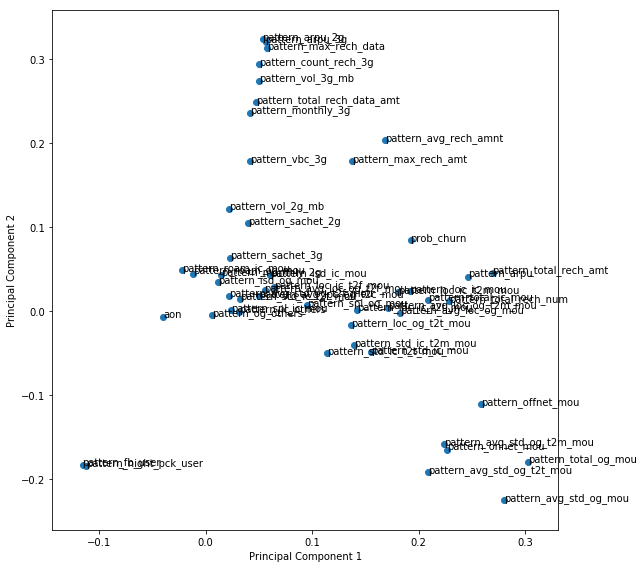

In [83]:
# Pattern
%matplotlib inline
fig = plt.figure(figsize = (8,8))
plt.scatter(pcs_df_pattern.PC1, pcs_df_pattern.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(pcs_df_pattern.Feature):
    plt.annotate(txt, (pcs_df_pattern.PC1[i],pcs_df_pattern.PC2[i]))
plt.tight_layout()
plt.show()

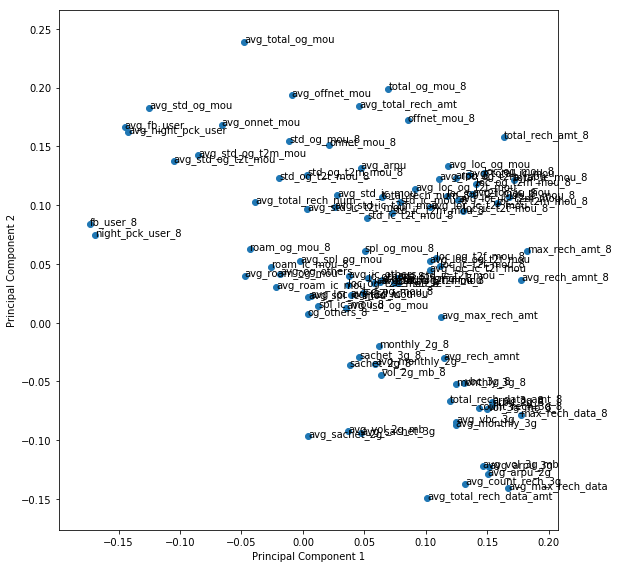

In [84]:
# Non Pattern
%matplotlib inline
fig = plt.figure(figsize = (8,8))
plt.scatter(pcs_df_no_pattern.PC1, pcs_df_no_pattern.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(pcs_df_no_pattern.Feature):
    plt.annotate(txt, (pcs_df_no_pattern.PC1[i],pcs_df_no_pattern.PC2[i]))
plt.tight_layout()
plt.show()

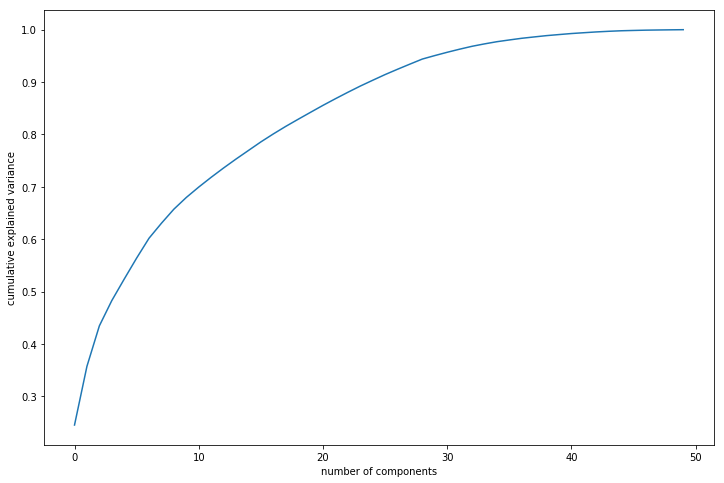

In [85]:
# Pattern
# Let's look at the scree plot to find the number of Principal Component needed
# Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca_pattern.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

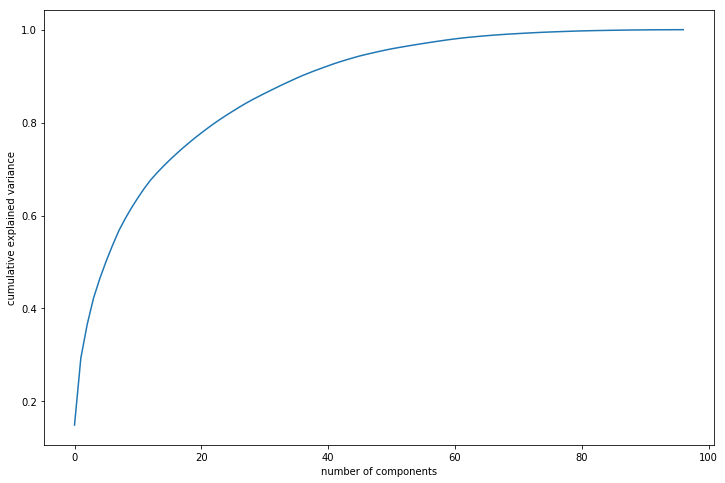

In [86]:
# No Pattern - Scree Plot
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca_no_pattern.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [87]:
# Pattern 
# We should use incremental PCA as it saves lots of time on large data set 
# In the scree plot the line is getting linear at around 40 components; 
from sklearn.decomposition import IncrementalPCA
pca_final_pattern = IncrementalPCA(n_components=40)

In [88]:
df_train_pca_pattern = pca_final_pattern.fit_transform(X_train_pattern_balanced)
df_train_pca_pattern.shape

(38546, 40)

In [89]:
# Creating correlation matrix for the principal components - we expect little to no correlation
corrmat = np.corrcoef(df_train_pca_pattern.transpose())

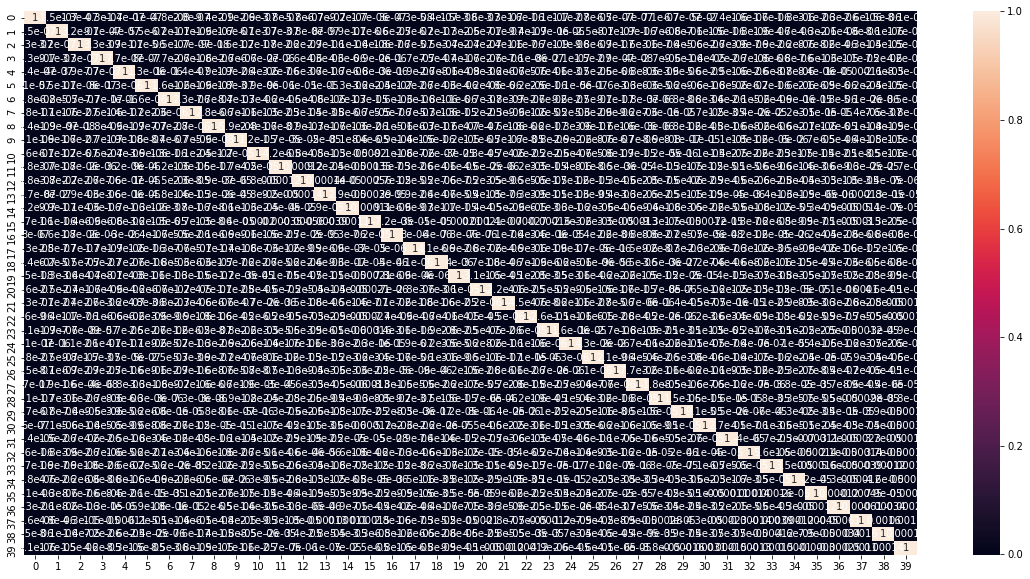

In [90]:
#plotting the correlation matrix
%matplotlib inline
plt.figure(figsize = (20,10))
sns.heatmap(corrmat,annot = True)

In [91]:
# 1s -> 0s in diagonals
corrmat_nodiag = corrmat - np.diagflat(corrmat.diagonal())
print("max corr:",corrmat_nodiag.max(), ", min corr: ", corrmat_nodiag.min(),)
# we see that correlations are indeed very close to 0

max corr: 0.0016041022394461153 , min corr:  -0.0006058951177619521


In [116]:
# Balancing test data
sm = SMOTE(random_state=2)
X_test_pattern_balanced, y_test_pattern_balanced = sm.fit_sample(X_scale_test_pattern, y_test_pattern.ravel())
X_test_no_pattern_balanced, y_test_no_pattern_balanced = sm.fit_sample(X_scale_test_no_pattern, y_test_no_pattern.ravel())

In [118]:
X_test_pattern_balanced = pd.DataFrame(X_test_pattern_balanced, columns = X_test_pattern.columns)
X_test_no_pattern_balanced = pd.DataFrame(X_test_no_pattern_balanced, columns = X_test_no_pattern.columns)

In [93]:
#Applying selected components to the test data - 40 components
df_test_pca_pattern = pca_final_pattern.transform(X_test_pattern_balanced)
df_test_pca_pattern.shape

(16574, 40)

In [94]:
colnames = list(churn_with_pattern.columns)
colnames.pop(2)
pcs_df_pattern = pd.DataFrame({'PC2':pca_pattern.components_[36], 'Feature':colnames})
pcs_df_pattern

Feature       PC2
0                           aon -0.002407
1                         churn -0.338052
2             pattern_onnet_mou -0.006617
3            pattern_offnet_mou -0.007346
4           pattern_roam_ic_mou -0.249446
5           pattern_roam_og_mou  0.223019
6        pattern_loc_og_t2t_mou  0.001260
7    pattern_avg_loc_og_t2m_mou -0.014536
8    pattern_avg_loc_og_t2f_mou -0.008068
9    pattern_avg_loc_og_t2c_mou  0.002525
10       pattern_avg_loc_og_mou -0.009615
11   pattern_avg_std_og_t2t_mou -0.035179
12   pattern_avg_std_og_t2m_mou -0.028473
13   pattern_avg_std_og_t2f_mou  0.003026
14       pattern_avg_std_og_mou -0.007938
15           pattern_spl_og_mou  0.012195
16            pattern_og_others -0.005182
17         pattern_total_og_mou -0.009730
18       pattern_loc_ic_t2t_mou -0.015038
19       pattern_loc_ic_t2m_mou  0.015958
20       pattern_loc_ic_t2f_mou  0.005746
21           pattern_loc_ic_mou  0.005435
22       pattern_std_ic_t2t_mou  0.013144
23       pattern_std_ic_t2m_mou  0.013267
24       pattern_std_ic_t2f_mou  0.001763
25           pattern_std_ic_mou -0.010869
26         pattern_total_ic_mou -0.016984
27           pattern_spl_ic_mou  0.016165
28           pattern_isd_ic_mou  0.017935
29            pattern_ic_others  0.000394
30       pattern_total_rech_num -0.096365
31       pattern_total_rech_amt  0.376145
32         pattern_max_rech_amt -0.196268
33        pattern_max_rech_data -0.238939
34               pattern_vbc_3g  0.037879
35           pattern_isd_og_mou -0.009728
36            pattern_vol_2g_mb  0.025292
37            pattern_vol_3g_mb -0.059396
38              pattern_arpu_3g  0.302043
39              pattern_arpu_2g  0.266433
40       pattern_night_pck_user -0.071332
41           pattern_monthly_2g  0.010712
42            pattern_sachet_2g -0.232073
43           pattern_monthly_3g -0.115116
44            pattern_sachet_3g  0.072552
45              pattern_fb_user -0.084986
46  pattern_total_rech_data_amt  0.086694
47        pattern_avg_rech_amnt  0.208016
48        pattern_count_rech_3g -0.462914
49                   prob_churn  0.069517

In [95]:
# Non Pattern Dataset
# In the scree plot the line is getting linear at around 70 components (Scree plot); 
pca_final_no_pattern = IncrementalPCA(n_components=70)

In [96]:
df_train_pca_no_pattern = pca_final_no_pattern.fit_transform(X_train_no_pattern_balanced)
df_train_pca_no_pattern.shape

(38546, 70)

In [97]:
# Creating correlation matrix for the principal components - we expect little to no correlation
corrmat = np.corrcoef(df_train_pca_no_pattern.transpose())

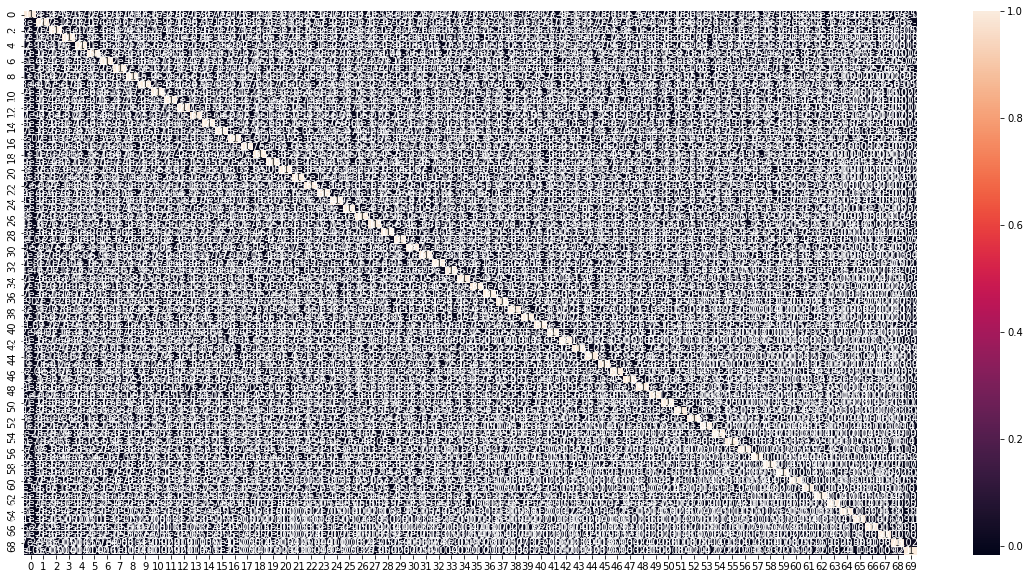

In [98]:
#plotting the correlation matrix
%matplotlib inline
plt.figure(figsize = (20,10))
sns.heatmap(corrmat,annot = True)

In [99]:
# 1s -> 0s in diagonals
corrmat_nodiag = corrmat - np.diagflat(corrmat.diagonal())
print("max corr:",corrmat_nodiag.max(), ", min corr: ", corrmat_nodiag.min(),)
# we see that correlations are indeed very close to 0

max corr: 0.020783033913590907 , min corr:  -0.016015867091935716


In [100]:
#Applying selected components to the test data - 70 components
df_test_pca_no_pattern = pca_final_no_pattern.transform(X_test_no_pattern_balanced)
df_test_pca_no_pattern.shape

(16574, 70)

# Logistic Regression

LR will be performed on both dataset - pattern and non pattern

In [101]:
#Training the model on the train data
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

# Pattern
learner_pca_pattern = LogisticRegression(class_weight="balanced")
model_pca_pattern = learner_pca_pattern.fit(df_train_pca_pattern, y_train_pattern_balanced)

# No Pattern
learner_pca_no_pattern = LogisticRegression(class_weight="balanced")
model_pca_no_pattern = learner_pca_no_pattern.fit(df_train_pca_no_pattern, y_train_no_pattern_balanced)

In [102]:
#Making prediction on the test data
# Pattern
pred_probs_test_pattern = model_pca_pattern.predict_proba(df_test_pca_pattern)[:,1]
"{:2.2f}".format(metrics.roc_auc_score(y_test_pattern_balanced, pred_probs_test_pattern))

'0.85'

In [103]:
# Non Pattern
pred_probs_test_no_pattern = model_pca_no_pattern.predict_proba(df_test_pca_no_pattern)[:,1]
"{:2.2f}".format(metrics.roc_auc_score(y_test_no_pattern_balanced, pred_probs_test_no_pattern))

'0.91'

In [104]:
# Let's check if by reducing the componets the score remains same of decreases
# Pattern - reducing from 40 to 30
pca_final_pattern_2 = IncrementalPCA(n_components=30)
df_train_pca_pattern_2 = pca_final_pattern_2.fit_transform(X_train_pattern_balanced)
df_test_pca_pattern_2 = pca_final_pattern_2.transform(X_test_pattern_balanced)
df_test_pca_pattern_2.shape

(16574, 30)

In [105]:
# No Pattern - reducing from 70 to 60
pca_final_no_pattern_2 = IncrementalPCA(n_components=60)
df_train_pca_no_pattern_2 = pca_final_no_pattern_2.fit_transform(X_train_no_pattern_balanced)
df_test_pca_no_pattern_2 = pca_final_no_pattern_2.transform(X_test_no_pattern_balanced)
df_test_pca_no_pattern_2.shape

(16574, 60)

In [106]:
# training the regression model 2
# Pattern
learner_pca_pattern_2 = LogisticRegression(class_weight="balanced")
model_pca_pattern_2 = learner_pca_pattern_2.fit(df_train_pca_pattern_2,y_train_pattern_balanced)
#Making prediction on the test data
pred_probs_test_pattern_2 = model_pca_pattern_2.predict_proba(df_test_pca_pattern_2)[:,1]
"{:2.2f}".format(metrics.roc_auc_score(y_test_pattern_balanced, pred_probs_test_pattern_2))

'0.85'

In [107]:
# No Pattern
learner_pca_no_pattern_2 = LogisticRegression(class_weight="balanced")
model_pca_no_pattern_2 = learner_pca_no_pattern_2.fit(df_train_pca_no_pattern_2,y_train_no_pattern_balanced)
#Making prediction on the test data
pred_probs_test_no_pattern_2 = model_pca_no_pattern_2.predict_proba(df_test_pca_no_pattern_2)[:,1]
"{:2.2f}".format(metrics.roc_auc_score(y_test_no_pattern_balanced, pred_probs_test_no_pattern_2))

'0.91'

Comparing model 1 and model 2 of pattern and non pattern data set the roc_auc_score remains same with reduction of components also respectively. Pattern dataset (with more derived columns) - 0.85 Non Pattern dataset - 0.91

In [108]:
# Pattern - reducing from 30 to 25 
pca_final_pattern_3 = IncrementalPCA(n_components=25)
df_train_pca_pattern_3 = pca_final_pattern_3.fit_transform(X_train_pattern_balanced)
df_test_pca_pattern_3 = pca_final_pattern_3.transform(X_test_pattern_balanced)
df_test_pca_pattern_3.shape

(16574, 25)

In [109]:
# No Pattern - reducing from 60 to 40 
pca_final_no_pattern_3 = IncrementalPCA(n_components=40)
df_train_pca_no_pattern_3 = pca_final_no_pattern_3.fit_transform(X_train_no_pattern_balanced)
df_test_pca_no_pattern_3 = pca_final_no_pattern_3.transform(X_test_no_pattern_balanced)
df_test_pca_no_pattern_3.shape

(16574, 40)

In [110]:
#training the regression model 3
# Pattern
learner_pca_pattern_3 = LogisticRegression(class_weight="balanced")
model_pca_pattern_3 = learner_pca_pattern_3.fit(df_train_pca_pattern_3,y_train_pattern_balanced)
#Making prediction on the test data
pred_probs_test_pattern_3 = model_pca_pattern_3.predict_proba(df_test_pca_pattern_3)[:,1]
"{:2.2f}".format(metrics.roc_auc_score(y_test_pattern_balanced, pred_probs_test_pattern_3))

'0.85'

In [111]:
# No Pattern
learner_pca_no_pattern_3 = LogisticRegression(class_weight="balanced")
model_pca_no_pattern_3 = learner_pca_no_pattern_3.fit(df_train_pca_no_pattern_3,y_train_no_pattern_balanced)
#Making prediction on the test data
pred_probs_test_no_pattern_3 = model_pca_no_pattern_3.predict_proba(df_test_pca_no_pattern_3)[:,1]
"{:2.2f}".format(metrics.roc_auc_score(y_test_no_pattern_balanced, pred_probs_test_no_pattern_3))

'0.91'

Comparing model 2 and model 3 of pattern and non pattern data set the roc_auc_score remains same with reducing components respectively.
Pattern dataset (with more derived columns) - 0.85 Non Pattern dataset - 0.91

In [112]:
# Pattern - reducing from 25 to 15
pca_final_pattern_4 = IncrementalPCA(n_components=15)
df_train_pca_pattern_4 = pca_final_pattern_4.fit_transform(X_train_pattern_balanced)
df_test_pca_pattern_4 = pca_final_pattern_4.transform(X_test_pattern_balanced)
df_test_pca_pattern_4.shape

(16574, 15)

In [113]:
# No Pattern - reducing from 40 to 25
pca_final_no_pattern_4 = IncrementalPCA(n_components=25)
df_train_pca_no_pattern_4 = pca_final_no_pattern_4.fit_transform(X_train_no_pattern_balanced)
df_test_pca_no_pattern_4 = pca_final_no_pattern_4.transform(X_test_no_pattern_balanced)
df_test_pca_no_pattern_4.shape

(16574, 25)

In [114]:
#training the regression model 4
# Pattern
learner_pca_pattern_4 = LogisticRegression(class_weight="balanced")
model_pca_pattern_4 = learner_pca_pattern_4.fit(df_train_pca_pattern_4,y_train_pattern_balanced)
#Making prediction on the test data
pred_probs_test_pattern_4 = model_pca_pattern_4.predict_proba(df_test_pca_pattern_4)[:,1]
"{:2.2f}".format(metrics.roc_auc_score(y_test_pattern_balanced, pred_probs_test_pattern_4))

'0.84'

In [115]:
# No Pattern
learner_pca_no_pattern_4 = LogisticRegression(class_weight="balanced")
model_pca_no_pattern_4 = learner_pca_no_pattern_4.fit(df_train_pca_no_pattern_4,y_train_no_pattern_balanced)
#Making prediction on the test data
pred_probs_test_no_pattern_4 = model_pca_no_pattern_4.predict_proba(df_test_pca_no_pattern_4)[:,1]
"{:2.2f}".format(metrics.roc_auc_score(y_test_no_pattern_balanced, pred_probs_test_no_pattern_4))

'0.90'

Comparing model 3 and model 4 of pattern and non pattern data set the roc_auc_score changes for both respectively.
Pattern dataset (with more derived columns) -> 0.85 to 0.84 (n_components changed from 25 to 15) Non Pattern dataset - 0.91 to 0.90 (n_components changed from 40 to 25)

In [116]:
# Finding components that give 90% of the information
# Pattern
pca_again_pattern = PCA(0.90)
df_train_pca_pattern_5 = pca_again_pattern.fit_transform(X_train_pattern_balanced)
df_train_pca_pattern_5.shape

(38546, 25)

In [117]:
# No Pattern
pca_again_no_pattern = PCA(0.90)
df_train_pca_no_pattern_5 = pca_again_no_pattern.fit_transform(X_train_no_pattern_balanced)
df_train_pca_no_pattern_5.shape

(38546, 37)

In [118]:
# As we saw by previous analysis in pattern data set that by reducing columns below 25, the roc score also reduced
# for non pattern dataset we saw that from reducing components from 40 to 25, the roc score reduced. So, instead of checking 
# for each value between 40 and 25 we found it on the basis of variance/ information percentage of 90%

In [119]:
#training the regression model 5
# Pattern
learner_pca_pattern_5 = LogisticRegression(class_weight="balanced")
model_pca_pattern_5 = learner_pca_pattern_5.fit(df_train_pca_pattern_5,y_train_pattern_balanced)
df_test_pca_pattern_5 = pca_again_pattern.transform(X_test_pattern_balanced)
df_test_pca_pattern_5.shape

(16574, 25)

In [120]:
#Making prediction on the test data
pred_probs_test_pattern_5 = model_pca_pattern_5.predict_proba(df_test_pca_pattern_5)[:,1]
"{:2.2f}".format(metrics.roc_auc_score(y_test_pattern_balanced, pred_probs_test_pattern_5))

'0.85'

Pattern - Model 3 had 25 components and 0.86 roc score. Model 5 with 90% information needs 25 components and has 0.86 roc score

In [121]:
# No Pattern
learner_pca_no_pattern_5 = LogisticRegression(class_weight="balanced")
model_pca_no_pattern_5 = learner_pca_no_pattern_5.fit(df_train_pca_no_pattern_5,y_train_no_pattern_balanced)
df_test_pca_no_pattern_5 = pca_again_no_pattern.transform(X_test_no_pattern_balanced)
df_test_pca_no_pattern_5.shape

(16574, 37)

In [122]:
#Making prediction on the test data
pred_probs_test_no_pattern_5 = model_pca_no_pattern_5.predict_proba(df_test_pca_no_pattern_5)[:,1]
"{:2.2f}".format(metrics.roc_auc_score(y_test_no_pattern_balanced, pred_probs_test_no_pattern_5))

'0.91'

Non Pattern - Model 3 had 40 components and 0.91 roc score. Model 5 with 90% information needs 37 components and has 0.91 roc auc score

As we saw that non pattern dataset with the logistic regression model gave better performance in each iteration and it's comparision with itself gives good performance with 37 components

In [123]:
# Pattern 
# Converting y_pred to a dataframe which is an array
y_pred_pattern_df = pd.DataFrame(pred_probs_test_pattern_5)
# Converting to column dataframe
y_pred_1 = y_pred_pattern_df
# Let's see the head
y_pred_1.head()

0
0  0.617711
1  0.450732
2  0.303782
3  0.084076
4  0.482593

In [124]:
# Converting y_test to dataframe
y_test_pattern_df = pd.DataFrame(y_test_pattern_balanced)
y_test_pattern_df = y_test_pattern_df.rename(columns={ 0 : 'Churn'})
y_test_pattern_df.head()

Churn
0      0
1      0
2      0
3      0
4      0

In [125]:
# Putting Mobile number to index
y_test_pattern_df['MobileID'] = y_test_pattern_df.index
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_pattern_df.reset_index(drop=True, inplace=True)
# Appending y_test_df and y_pred_1
y_pred_pattern_final = pd.concat([y_test_pattern_df,y_pred_1],axis=1)
# Renaming the column 
y_pred_pattern_final= y_pred_pattern_final.rename(columns={ 0 : 'Churn_Prob'})
# Let's see the head of y_pred_final
y_pred_pattern_final.head()

Churn  MobileID  Churn_Prob
0      0         0    0.617711
1      0         1    0.450732
2      0         2    0.303782
3      0         3    0.084076
4      0         4    0.482593

In [128]:
# Non Pattern 
# Converting y_pred to a dataframe which is an array
y_pred_no_pattern_df = pd.DataFrame(pred_probs_test_no_pattern_5)
# Converting to column dataframe
y_pred_2 = y_pred_no_pattern_df
# Let's see the head
y_pred_2.head()

0
0  0.648228
1  0.095345
2  0.033027
3  0.067156
4  0.353253

In [129]:
# Converting y_test to dataframe
y_test_no_pattern_df = pd.DataFrame(y_test_no_pattern_balanced)
y_test_no_pattern_df = y_test_no_pattern_df.rename(columns={ 0 : 'Churn'})
y_test_no_pattern_df.head()

Churn
0      0
1      0
2      0
3      0
4      0

In [130]:
# Putting Mobile number to index
y_test_no_pattern_df['MobileID'] = y_test_no_pattern_df.index
# Removing index for both dataframes to append them side by side 
y_pred_2.reset_index(drop=True, inplace=True)
y_test_no_pattern_df.reset_index(drop=True, inplace=True)
# Appending y_test_df and y_pred_2
y_pred_no_pattern_final = pd.concat([y_test_no_pattern_df,y_pred_2],axis=1)
# Renaming the column 
y_pred_no_pattern_final= y_pred_no_pattern_final.rename(columns={ 0 :'Churn_Prob'})
# Let's see the head of y_pred_final
y_pred_no_pattern_final.head()

Churn  MobileID  Churn_Prob
0      0         0    0.648228
1      0         1    0.095345
2      0         2    0.033027
3      0         3    0.067156
4      0         4    0.353253

In [135]:
# Creating new column 'predicted' with 1 if Churn_Prob>0.5 else 0
# Pattern
y_pred_pattern_final['predicted'] = y_pred_pattern_final.Churn_Prob.map( lambda x: 1 if x >= 0.5 else 0)
# Let's see the head
y_pred_pattern_final.head()

Churn  MobileID  Churn_Prob  predicted
0      0         0    0.617711          1
1      0         1    0.450732          0
2      0         2    0.303782          0
3      0         3    0.084076          0
4      0         4    0.482593          0

In [137]:
# Non Pattern
y_pred_no_pattern_final['predicted'] = y_pred_no_pattern_final.Churn_Prob.map( lambda x: 1 if x >= 0.5 else 0)
y_pred_no_pattern_final.head(40)

Churn  MobileID  Churn_Prob  predicted
0       0         0    0.648228          1
1       0         1    0.095345          0
2       0         2    0.033027          0
3       0         3    0.067156          0
4       0         4    0.353253          0
5       0         5    0.043062          0
6       0         6    0.224950          0
7       0         7    0.567434          1
8       0         8    0.297160          0
9       0         9    0.002668          0
10      0        10    0.099638          0
11      0        11    0.342245          0
12      0        12    0.211702          0
13      0        13    0.027565          0
14      0        14    0.028601          0
15      0        15    0.120344          0
16      0        16    0.017222          0
17      1        17    0.336158          0
18      0        18    0.866383          1
19      0        19    0.268038          0
20      1        20    0.189058          0
21      0        21    0.020683          0
22      0        22    0.003763          0
23      0        23    0.220904          0
24      0        24    0.048367          0
25      0        25    0.162440          0
26      0        26    0.666476          1
27      1        27    0.679252          1
28      1        28    0.904097          1
29      0        29    0.315735          0
30      0        30    0.663904          1
31      0        31    0.034908          0
32      0        32    0.152253          0
33      0        33    0.616591          1
34      0        34    0.034087          0
35      0        35    0.000846          0
36      0        36    0.229890          0
37      0        37    0.012820          0
38      0        38    0.000708          0
39      0        39    0.326740          0

In [138]:
# Note: Our main focus is predicting Churn as correct and we don't have to focus much on non-churn
# Confusion matrix 
# Pattern 
confusion = metrics.confusion_matrix( y_pred_pattern_final.Churn, y_pred_pattern_final.predicted )
confusion

array([[6690, 1597],
       [2015, 6272]], dtype=int64)

In [139]:
# Confusion matrix 
# No Pattern 
confusion = metrics.confusion_matrix( y_pred_no_pattern_final.Churn, y_pred_no_pattern_final.predicted )
confusion

array([[6934, 1353],
       [1393, 6894]], dtype=int64)

### NOTE: for us recall/ sensitivity is important

In [140]:
#Let's check the overall accuracy, Recall and Precision - 
# Pattern 
print("accuracy", metrics.accuracy_score(y_pred_pattern_final.Churn, y_pred_pattern_final.predicted))
# precision
print("precision", metrics.precision_score(y_pred_pattern_final.Churn, y_pred_pattern_final.predicted))
# recall/sensitivity
print("recall", metrics.recall_score(y_pred_pattern_final.Churn, y_pred_pattern_final.predicted))

accuracy 0.7820682997465911
precision 0.7970517219468801
recall 0.7568480752986606


In [141]:
# No Pattern 
print("accuracy", metrics.accuracy_score(y_pred_no_pattern_final.Churn, y_pred_no_pattern_final.predicted))
# precision
print("precision", metrics.precision_score(y_pred_no_pattern_final.Churn, y_pred_no_pattern_final.predicted))
# recall/sensitivity
print("recall", metrics.recall_score(y_pred_no_pattern_final.Churn, y_pred_no_pattern_final.predicted))

accuracy 0.8343188125980451
precision 0.8359403419425245
recall 0.8319053939905877


Recall of Non pattern model 5 (model_pca_no_pattern_5) is 83%

It is good to start with logistic regression; let's now create Random Forest to check if we can get a better model

In [143]:
# Note: the data set that we will consider for Random forest is NOT the one on which PCA was applied. We will be using the balanced data prepared just before PCA

In [144]:
X_train_no_pattern_balanced.head(2)

arpu_8  onnet_mou_8  offnet_mou_8  roam_ic_mou_8  roam_og_mou_8  \
0  0.784770     0.442978      1.818026       3.713504       2.157430   
1 -0.931702    -0.666011     -0.897461      -0.343780      -0.345115   

   loc_og_t2t_mou_8  loc_og_t2m_mou_8  loc_og_t2f_mou_8  loc_og_t2c_mou_8  \
0         -0.053024          2.701864          0.672532         -0.031151   
1         -0.675544         -0.807474         -0.348487         -0.416869   

   loc_og_mou_8        ...          avg_arpu_3g  avg_arpu_2g  \
0      2.350795        ...             1.579899     1.764874   
1     -0.825910        ...             0.120360    -0.568344   

   avg_night_pck_user  avg_monthly_2g  avg_sachet_2g  avg_monthly_3g  \
0           -0.969315       -0.459814      -0.557801        1.329239   
1           -0.969315        4.742824      -0.557801       -0.386224   

   avg_sachet_3g  avg_fb_user  avg_total_rech_data_amt  avg_count_rech_3g  
0      -0.414164    -0.985617                -0.242383           1.088621  
1      -0.414164    -0.985617                 0.412992          -0.590548  

[2 rows x 97 columns]

In [146]:
# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier
# Running the random forest with default parameters.
rfc = RandomForestClassifier(class_weight="balanced")
# fit
rfc.fit(X_train_no_pattern_balanced,y_train_no_pattern_balanced)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [147]:
# Making predictions
predictions = rfc.predict(X_test_no_pattern_balanced)

In [148]:
# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
print(classification_report(y_test_no_pattern_balanced,predictions))

             precision    recall  f1-score   support

          0       0.81      0.93      0.87      8287
          1       0.92      0.78      0.85      8287

avg / total       0.87      0.86      0.86     16574



In [149]:
# Printing confusion matrix
print(confusion_matrix(y_test_no_pattern_balanced,predictions))

[[7722  565]
 [1792 6495]]


In [150]:
print("accuracy", metrics.accuracy_score(y_test_no_pattern_balanced, predictions))
# precision
print("precision", metrics.precision_score(y_test_no_pattern_balanced, predictions))
# recall/sensitivity
print("recall", metrics.recall_score(y_test_no_pattern_balanced, predictions))

accuracy 0.857789308555569
precision 0.919971671388102
recall 0.7837576927718113


Recall/sensitivity is 78.4%

Let's now look at the list of hyperparameters which we can tune to improve model performance.

### Tuning max_depth

Let's try to find the optimum values for max_depth and understand how the value of max_depth impacts the sensitivity of the ensemble.

In [151]:
# GridSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(2, 20, 5)}

# instantiate the model
rf = RandomForestClassifier(class_weight="balanced")


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="recall")
rf.fit(X_train_no_pattern_balanced, y_train_no_pattern_balanced)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': range(2, 20, 5)}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring='recall', verbose=0)

In [152]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
0       0.410396         0.012503         0.738909          0.742048   
1       1.193946         0.015627         0.883620          0.895022   
2       1.752782         0.013135         0.949930          0.983682   
3       2.040311         0.023936         0.959477          0.997743   

  param_max_depth             params  rank_test_score  split0_test_score  \
0               2   {'max_depth': 2}                4           0.713359   
1               7   {'max_depth': 7}                3           0.855772   
2              12  {'max_depth': 12}                2           0.911803   
3              17  {'max_depth': 17}                1           0.925551   

   split0_train_score  split1_test_score       ...         split2_test_score  \
0            0.733558           0.756939       ...                  0.737484   
1            0.911078           0.886122       ...                  0.893385   
2            0.985731           0.959014       ...                  0.950713   
3            0.997989           0.962905       ...                  0.965499   

   split2_train_score  split3_test_score  split3_train_score  \
0            0.732650           0.732226            0.741747   
1            0.897004           0.889725            0.888968   
2            0.982229           0.959004            0.983267   
3            0.998314           0.969642            0.997082   

   split4_test_score  split4_train_score  std_fit_time  std_score_time  \
0           0.754541            0.741942      0.035915    6.251383e-03   
1           0.893098            0.886504      0.083337    8.176054e-07   
2           0.969123            0.983527      0.058445    4.987383e-03   
3           0.973793            0.998054      0.088312    7.057826e-03   

   std_test_score  std_train_score  
0        0.015931         0.009953  
1        0.014173         0.008752  
2        0.019938         0.001141  
3        0.017363         0.000477  

[4 rows x 21 columns]

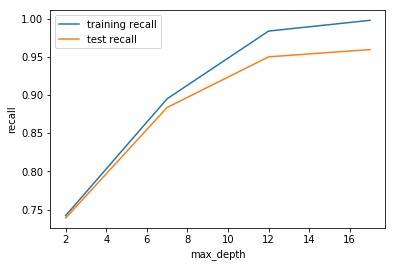

In [153]:
# plotting recall with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training recall")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test recall")
plt.xlabel("max_depth")
plt.ylabel("recall")
plt.legend()
plt.show()

You can see that as we increase the value of max_depth, both train and test scores increase and the model does not seem to overfit more with increasing max_depth

### Tuning n_estimators

# THIS CODE WILL TAKE MORE THAN 4 MINUTES TO RUN

In [154]:
# From above step we are taking max_depth as 12 
# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'n_estimators': range(100, 1500, 400)}

# instantiate the model (note we are specifying a max_depth)
rf = RandomForestClassifier(class_weight="balanced",max_depth=12)


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="recall")
rf.fit(X_train_no_pattern_balanced, y_train_no_pattern_balanced)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=12, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': range(100, 1500, 400)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='recall', verbose=0)

In [155]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
0      17.587539         0.160697         0.959529          0.988689   
1      95.860063         1.056773         0.959269          0.989026   
2     226.461698         2.348357         0.960152          0.989143   
3     359.505291         3.486209         0.959996          0.989091   

  param_n_estimators                  params  rank_test_score  \
0                100   {'n_estimators': 100}                3   
1                500   {'n_estimators': 500}                4   
2                900   {'n_estimators': 900}                1   
3               1300  {'n_estimators': 1300}                2   

   split0_test_score  split0_train_score  split1_test_score       ...         \
0           0.924254            0.991893           0.961608       ...          
1           0.923735            0.992022           0.962905       ...          
2           0.926329            0.991698           0.963424       ...          
3           0.925032            0.992282           0.962387       ...          

   split2_test_score  split2_train_score  split3_test_score  \
0           0.964981            0.988390           0.971977   
1           0.965499            0.988909           0.972237   
2           0.965499            0.989493           0.972237   
3           0.965759            0.989363           0.973015   

   split3_train_score  split4_test_score  split4_train_score  std_fit_time  \
0            0.987159           0.974831            0.988650      0.774805   
1            0.988132           0.971977            0.988521     19.644600   
2            0.988780           0.973275            0.988391     10.401676   
3            0.988650           0.973793            0.988391      3.326288   

   std_score_time  std_test_score  std_train_score  
0        0.027606        0.018262         0.001702  
1        0.219595        0.018135         0.001564  
2        0.126651        0.017330         0.001453  
3        0.072953        0.018007         0.001807  

[4 rows x 21 columns]

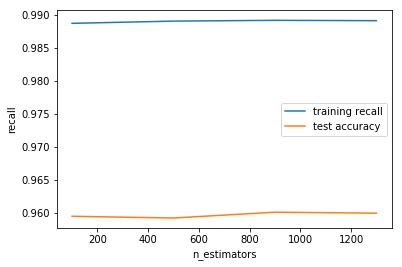

In [156]:
# plotting recall with n_estimators
plt.figure()
plt.plot(scores["param_n_estimators"], 
         scores["mean_train_score"], 
         label="training recall")
plt.plot(scores["param_n_estimators"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("n_estimators")
plt.ylabel("recall")
plt.legend()
plt.show()

### Tuning max_features

Let's see how the model performance varies with max_features, which is the maximum numbre of features considered for splitting at a node

In [161]:
# GridSearchCV to find optimal max_features
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_features': [4, 8, 14, 20, 24, 40]}

# instantiate the model
rf = RandomForestClassifier(class_weight="balanced",max_depth=12)


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="recall")
rf.fit(X_train_no_pattern_balanced, y_train_no_pattern_balanced)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=12, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_features': [4, 8, 14, 20, 24, 40]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='recall', verbose=0)

In [162]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
0       0.798058         0.022751         0.937477          0.974796   
1       1.419287         0.019681         0.949671          0.982475   
2       2.511783         0.021871         0.955637          0.986484   
3       3.263222         0.015636         0.954081          0.984512   
4       3.810201         0.018741         0.954703          0.984058   

  param_max_features                params  rank_test_score  \
0                  4   {'max_features': 4}                6   
1                  8   {'max_features': 8}                5   
2                 14  {'max_features': 14}                2   
3                 20  {'max_features': 20}                4   
4                 24  {'max_features': 24}                3   

   split0_test_score  split0_train_score  split1_test_score       ...         \
0           0.904280            0.981515           0.940078       ...          
1           0.913878            0.988131           0.953567       ...          
2           0.923735            0.991633           0.962646       ...          
3           0.915953            0.987417           0.957977       ...          
4           0.916732            0.990531           0.955901       ...          

   split2_test_score  split2_train_score  split3_test_score  \
0           0.947082            0.976002           0.950441   
1           0.955383            0.979764           0.965750   
2           0.958755            0.984045           0.967826   
3           0.960571            0.982293           0.967566   
4           0.965499            0.980867           0.967307   

   split3_train_score  split4_test_score  split4_train_score  std_fit_time  \
0            0.973150           0.945511            0.969064      0.060681   
1            0.983073           0.959782            0.980997      0.108638   
2            0.985732           0.965231            0.986705      0.045741   
3            0.986834           0.968345            0.982813      0.145013   
4            0.983786           0.968085            0.983527      0.054656   

   std_score_time  std_test_score  std_train_score  
0        0.007113        0.016934         0.004061  
1        0.006061        0.018384         0.003037  
2        0.007646        0.016231         0.002751  
3        0.000015        0.019475         0.002161  
4        0.006257        0.019483         0.003423  

[5 rows x 21 columns]

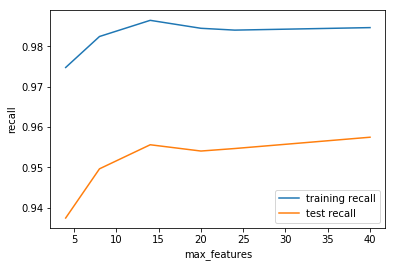

In [163]:
# plotting recall with max_features
plt.figure()
plt.plot(scores["param_max_features"], 
         scores["mean_train_score"], 
         label="training recall")
plt.plot(scores["param_max_features"], 
         scores["mean_test_score"], 
         label="test recall")
plt.xlabel("max_features")
plt.ylabel("recall")
plt.legend()
plt.show()

Apparently, the training and test scores both seem to increase as we increase max_features, 
and the model doesn't seem to overfit more with increasing max_features. This happens because as we give more features 
for splitting at a node more information will be present to predict correctly hence, more recall

### Tuning min_samples_leaf

In [164]:
# GridSearchCV to find optimal min_samples_leaf
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_leaf': range(100, 400, 50)}

# instantiate the model
rf = RandomForestClassifier(class_weight="balanced",max_depth=12)


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="recall")
rf.fit(X_train_no_pattern_balanced, y_train_no_pattern_balanced)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=12, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'min_samples_leaf': range(100, 400, 50)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='recall', verbose=0)

In [165]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
0       1.387588         0.018831         0.870441          0.879897   
1       1.164413         0.016372         0.864526          0.868676   
2       1.146591         0.018749         0.851917          0.857651   
3       1.021764         0.014822         0.850516          0.854447   
4       0.984623         0.015623         0.842266          0.841929   

  param_min_samples_leaf                     params  rank_test_score  \
0                    100  {'min_samples_leaf': 100}                1   
1                    150  {'min_samples_leaf': 150}                2   
2                    200  {'min_samples_leaf': 200}                3   
3                    250  {'min_samples_leaf': 250}                4   
4                    300  {'min_samples_leaf': 300}                5   

   split0_test_score  split0_train_score  split1_test_score       ...         \
0           0.828794            0.888702           0.872114       ...          
1           0.829313            0.876249           0.866926       ...          
2           0.814786            0.862109           0.846693       ...          
3           0.819196            0.864314           0.850843       ...          
4           0.810636            0.849267           0.827497       ...          

   split2_test_score  split2_train_score  split3_test_score  \
0           0.885344            0.880205           0.884536   
1           0.876783            0.860682           0.870524   
2           0.869261            0.858672           0.862221   
3           0.859922            0.848878           0.852361   
4           0.861997            0.844338           0.844318   

   split3_train_score  split4_test_score  split4_train_score  std_fit_time  \
0            0.878397           0.881422            0.874181      0.097407   
1            0.866204           0.879087            0.869901      0.059381   
2            0.857903           0.866632            0.859589      0.094119   
3            0.848045           0.870265            0.857773      0.030882   
4            0.833647           0.866892            0.852390      0.059518   

   std_score_time  std_test_score  std_train_score  
0        0.006212        0.021348         0.004819  
1        0.001491        0.018133         0.005131  
2        0.006252        0.020148         0.004088  
3        0.001798        0.017106         0.006032  
4        0.000006        0.021065         0.008716  

[5 rows x 21 columns]

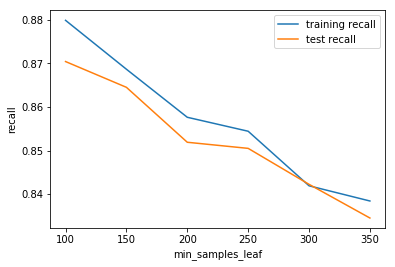

In [166]:
# plotting recall with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training recall")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test recall")
plt.xlabel("min_samples_leaf")
plt.ylabel("recall")
plt.legend()
plt.show()

minimum number of samples required at each node
You can see that the model starts of overfit on decreasing the value of min_samples_leaf.

Tuning min_samples_split

In [167]:
# GridSearchCV to find optimal min_samples_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_split': range(200, 500, 50)}

# instantiate the model
rf = RandomForestClassifier(class_weight="balanced")


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="recall")
rf.fit(X_train_no_pattern_balanced, y_train_no_pattern_balanced)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'min_samples_split': range(200, 500, 50)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='recall', verbose=0)

In [168]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
0       1.830613         0.016111         0.889223          0.901417   
1       1.735158         0.015644         0.886992          0.897499   
2       1.624350         0.018758         0.874851          0.886240   
3       1.708117         0.015628         0.872983          0.883217   
4       1.532547         0.018753         0.869870          0.879015   

  param_min_samples_split                      params  rank_test_score  \
0                     200  {'min_samples_split': 200}                1   
1                     250  {'min_samples_split': 250}                2   
2                     300  {'min_samples_split': 300}                3   
3                     350  {'min_samples_split': 350}                4   
4                     400  {'min_samples_split': 400}                5   

   split0_test_score  split0_train_score  split1_test_score       ...         \
0           0.842023            0.911597           0.897276       ...          
1           0.839689            0.902517           0.894942       ...          
2           0.833463            0.900117           0.867964       ...          
3           0.819715            0.885653           0.881712       ...          
4           0.832685            0.892723           0.868742       ...          

   split2_test_score  split2_train_score  split3_test_score  \
0           0.900389            0.896095           0.895693   
1           0.907134            0.898949           0.893358   
2           0.894163            0.883837           0.895433   
3           0.886900            0.879362           0.888168   
4           0.886641            0.876313           0.878568   

   split3_train_score  split4_test_score  split4_train_score  std_fit_time  \
0            0.896167           0.910742            0.901745      0.158476   
1            0.895000           0.899844            0.894481      0.102307   
2            0.889682           0.883238            0.882288      0.039833   
3            0.886633           0.888428            0.881445      0.156131   
4            0.874116           0.882719            0.875219      0.045849   

   std_score_time  std_test_score  std_train_score  
0        0.000969        0.024176         0.005650  
1        0.000019        0.024135         0.002951  
2        0.006265        0.022924         0.008319  
3        0.000020        0.026746         0.002671  
4        0.006251        0.019525         0.006913  

[5 rows x 21 columns]

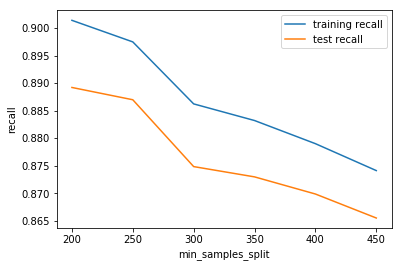

In [169]:
# plotting recall with min_samples_split
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training recall")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test recall")
plt.xlabel("min_samples_split")
plt.ylabel("recall")
plt.legend()
plt.show()

### Grid Search to Find Optimal Hyperparameters

# Caution: The below code took us more than 1 hour : You may skip running this

In [170]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [4,8,10,12,14],
    'min_samples_leaf': range(100, 400, 200),
    'min_samples_split': range(200, 500, 200),
    'n_estimators': [100,200, 300], 
    'max_features': [10,20,25,30,40,50]
}
# Create a based model
rf = RandomForestClassifier(class_weight="balanced")
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1,verbose = 1)

In [ ]:
# Fit the grid search to the data
grid_search.fit(X_train_no_pattern_balanced, y_train_no_pattern_balanced)

Fitting 3 folds for each of 360 candidates, totalling 1080 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed: 46.9min


Screen shot from the other file as the above step is taking alot of time here
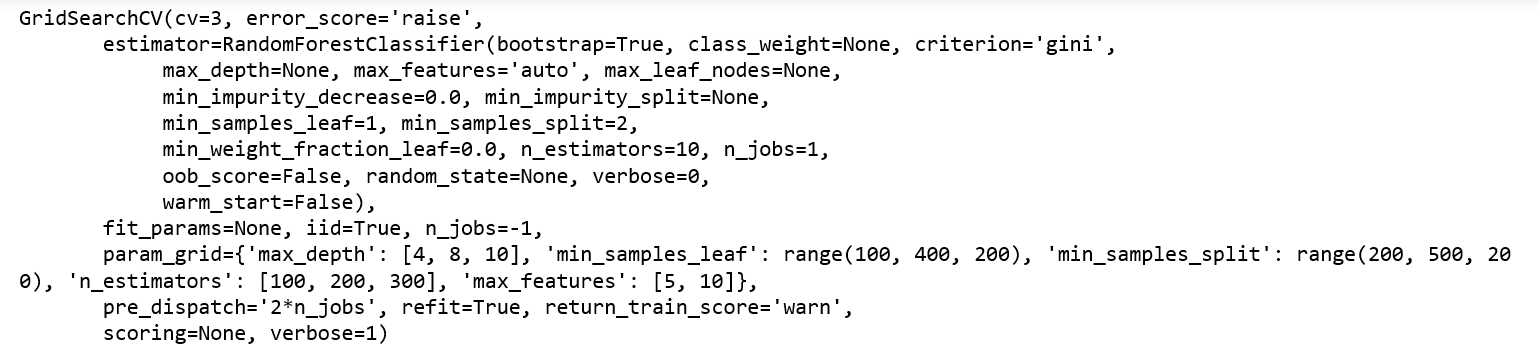

In [ ]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy and recall of',grid_search.best_score_,'using',grid_search.best_params_)

Screen shot 
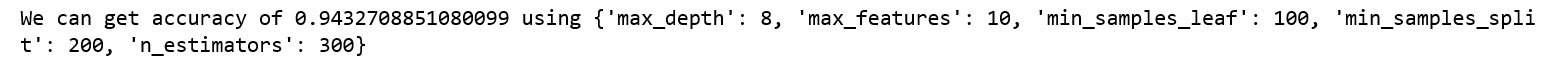
As this is for accuracy we should also refer to the above graphs for recall; there we got max_depth as 12 and other parameters seem similar

In [ ]:
# model with the best hyperparameters
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(bootstrap=True,
                             max_depth=8,
                             min_samples_leaf=100, 
                             min_samples_split=200,
                             max_features=15,
                             n_estimators=600)

Screenshot
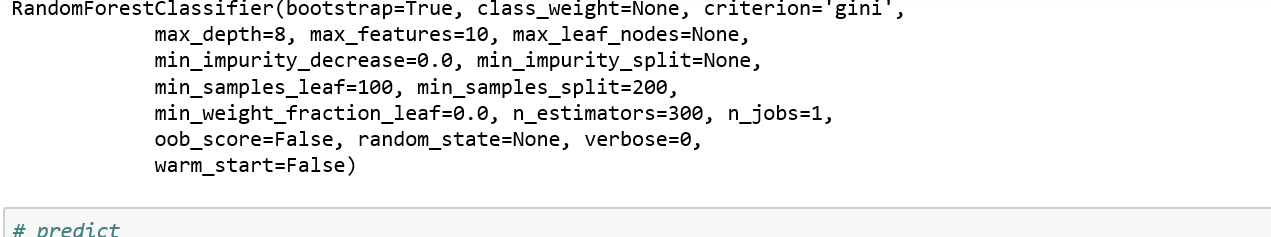

In [ ]:
# fit
rfc.fit(X_train_no_pattern_balanced,y_train_no_pattern_balanced)

In [ ]:
# predict
predictions = rfc.predict(X_test_no_pattern_balanced)

In [ ]:
# evaluation metrics
from sklearn.metrics import classification_report,confusion_matrix
print(Classification_report(y_test_no_pattern_balanced,predictions))

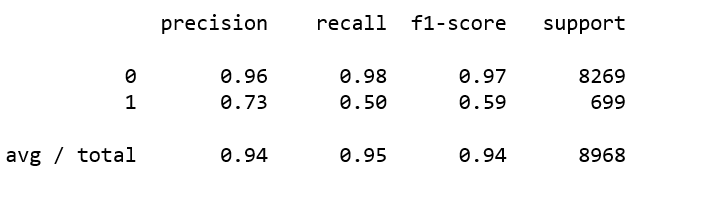

In [ ]:
features = pd.DataFrame(rfc.feature_importances_, index = X_train_no_pattern_balanced.columns, columns = ['importance'])

In [ ]:
# got the following features from the above command - total_ic_mou_8, loc_ic_mou_8, loc_ic_t2t_mou_8, loc_ic_t2m_mou_8, total_rech_amt_8,
# total_og_mou_8, loc_og__t2t_mou_8, loc_og_t2m_mou_8, loc_og_mou_8
# Note the above command is not run in this file as the commands before this were taking lots of time hence, added the variables from
# the  rough work file here.

# Modeling via Support Vector Machine

# DO NOT RUN THE BELOW CODE AS IT WILL TAKE ALOT OF TIME TO RUN
### will mention where you can start with execution - till that point you may skip running the code

In [ ]:
# Note we will run SVM on data that has been already treated with PCA (df_train_pca_no_pattern_5, y_train_no_pattern_balanced)

In [ ]:
# Model building
from sklearn.svm import SVC
# instantiate an object of class SVC()
# note that we are using cost C=1
model = SVC(C = 1)

# fit
model.fit(df_train_pca_no_pattern_5, y_train_no_pattern_balanced)

# predict
y_pred = model.predict(df_test_pca_no_pattern_5)

In [ ]:
# Evaluate the model using confusion matrix 
from sklearn import metrics
metrics.confusion_matrix(y_true=y_test_no_pattern_balanced, y_pred=y_pred)

Screen shot of the above commands executed in a seperate file
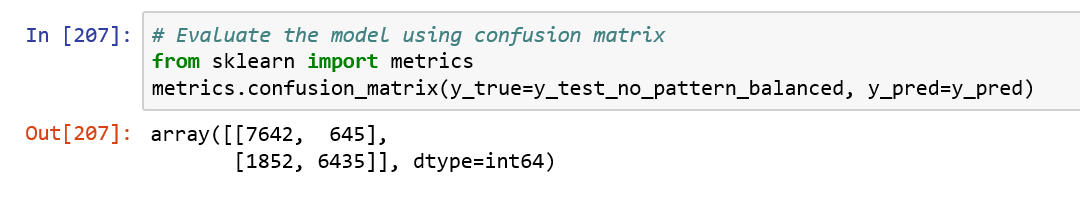

In [ ]:
# accuracy
print("accuracy", metrics.accuracy_score(y_test_no_pattern_balanced, y_pred))

# precision
print("precision", metrics.precision_score(y_test_no_pattern_balanced, y_pred))

# recall/sensitivity
print("recall", metrics.recall_score(y_test_no_pattern_balanced, y_pred))

Screen shot of result of above command ran in another file
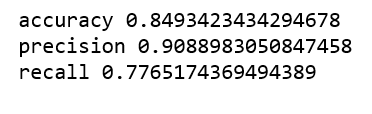

In [ ]:
from sklearn.model_selection import KFold
# creating a KFold object with 5 splits 
folds = KFold(n_splits = 5, shuffle = True, random_state = 4)

# instantiating a model with cost=1
model = SVC(C = 10)

In [ ]:
# computing the cross-validation scores 
# note that the argument cv takes the 'folds' object, and
# we have specified 'accuracy' as the metric
from sklearn.model_selection import cross_val_score
cv_results = cross_val_score(model, df_train_pca_no_pattern_5, y_train_no_pattern_balanced, cv = folds, scoring = 'recall') 

In [ ]:
# print 5 recalls obtained from the 5 folds
print(cv_results)
print("mean recall = {}".format(cv_results.mean()))

screen shot of the results of above commands ran in another file
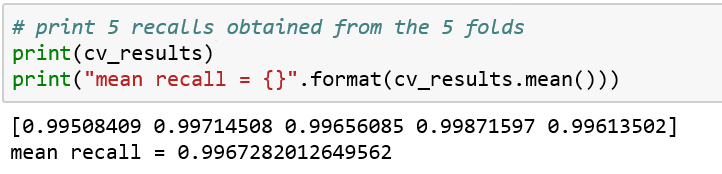

In [ ]:
from sklearn.model_selection import GridSearchCV
# specify range of parameters (C) as a list
params = {"C": [0.1, 1, 10, 100, 1000]}

model = SVC()

# set up grid search scheme
# note that we are still using the 5 fold CV scheme we set up earlier
model_cv = GridSearchCV(estimator = model, param_grid = params, 
                        scoring= 'recall', 
                        cv = folds, 
                        verbose = 1,
                       return_train_score=True)  

In [ ]:
# fit the model - it will fit 5 folds across all values of C
model_cv.fit(df_train_pca_no_pattern_5, y_train_no_pattern_balanced)  

Screenshot of the result of the above commands executed in another file
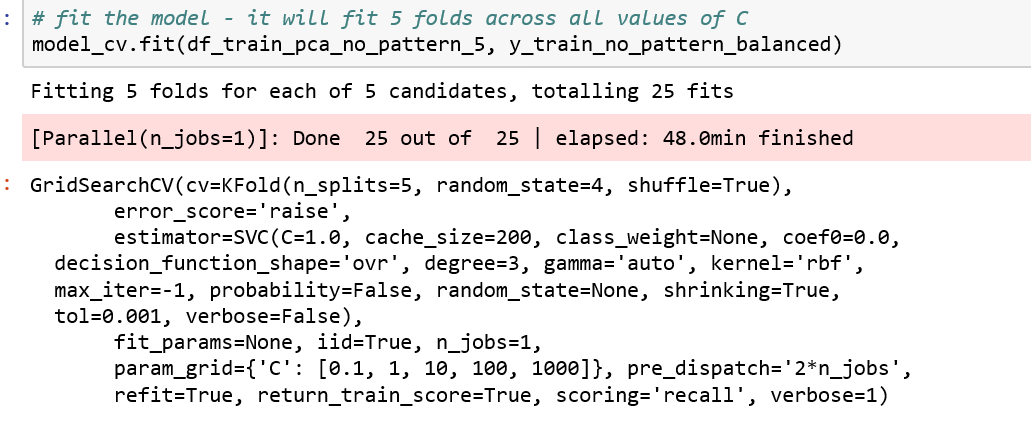

In [ ]:
# results of grid search CV
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

Screenshot of the results of the above command
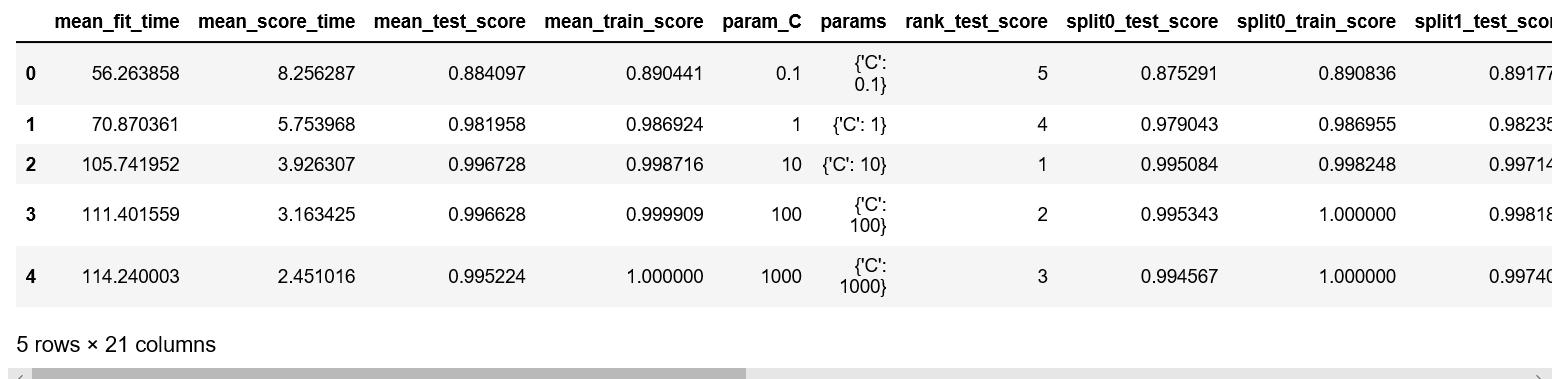

In [ ]:
# plot of C versus train and test scores

plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('Recall')
plt.legend(['test recall', 'train recall'], loc='upper left')
plt.xscale('log')

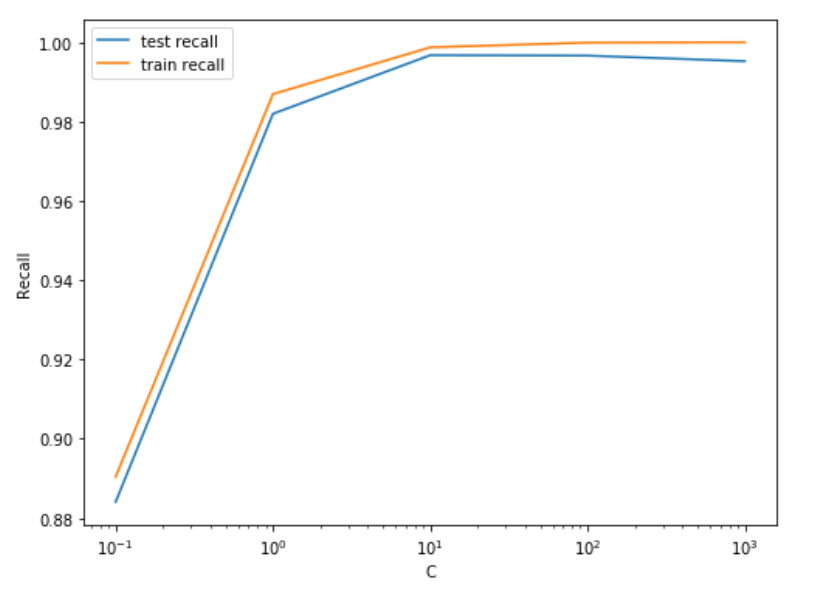

In [ ]:
best_score = model_cv.best_score_
best_C = model_cv.best_params_['C']

print(" The highest test accuracy is {0} at C = {1}".format(best_score, best_C))

In [ ]:
# model with the best value of C
model = SVC(C=best_C)

# fit
model.fit(df_train_pca_no_pattern_5, y_train_no_pattern_balanced)

# predict
y_pred = model.predict(df_test_pca_no_pattern_5)

In [ ]:
# metrics
# print other metrics

# accuracy
print("accuracy", metrics.accuracy_score(y_test_no_pattern_balanced, y_pred))

# precision
print("precision", metrics.precision_score(y_test_no_pattern_balanced, y_pred))

# recall/sensitivity
print("recall", metrics.recall_score(y_test_no_pattern_balanced, y_pred))

Screen shot 
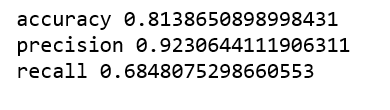

In [ ]:
# specify params
params = {"C": [0.1, 1, 10, 100, 1000]}

# specify scores/metrics in an iterable
scores = ['accuracy', 'precision', 'recall']

for score in scores:
    print("# Tuning hyper-parameters for {}".format(score))
    
    # set up GridSearch for score metric
    clf = GridSearchCV(SVC(), 
                       params, 
                       cv=folds,
                       scoring=score,
                       return_train_score=True)
    # fit
    clf.fit(df_train_pca_no_pattern_5, y_train_no_pattern_balanced)

    print(" The highest {0} score is {1} at C = {2}".format(score, clf.best_score_, clf.best_params_))
    print("\n")

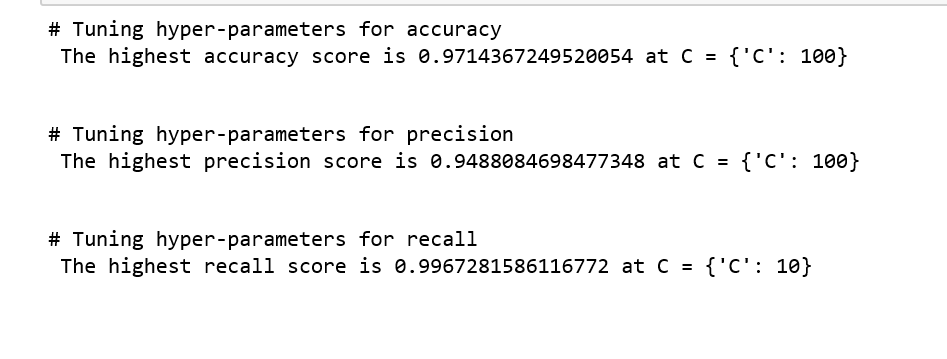

# You can run the below code

# Model for finding important feature which help the business to understand the indicators of Churn

In [80]:
# Run on both pattern and non-pattern dataset

In [81]:
import statsmodels.api as sm
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [82]:
# RFE
lm = LogisticRegression(class_weight="balanced")
rfe_pattern = RFE(lm, 15)
rfe_no_pattern = RFE(lm,15)
rfe_pattern = rfe_pattern.fit(X_train_pattern_balanced, y_train_pattern_balanced)
rfe_no_pattern = rfe_no_pattern.fit(X_train_no_pattern_balanced, y_train_no_pattern_balanced)
print("Pattern Dataset")
print(rfe_pattern.support_)
print(rfe_pattern.ranking_)
print("Non Pattern Dataset")
print(rfe_no_pattern.support_)
print(rfe_no_pattern.ranking_)

Pattern Dataset
[ True False False False False False False False False False False False
 False False  True False False False  True  True False  True False False
 False False  True False False False  True  True  True False  True False
 False False  True  True  True False  True False False  True False False
 False False]
[ 1 26  4  5  8  7 23 14 36 12  6 15 16 29  1 11 24 10  1  1 27  1 19 13
 33 28  1 20 25 31  1  1  1  2  1 30  3 34  1  1  1 18  1 17 35  1 21 32
  9 22]
Non Pattern Dataset
[False False False False False  True False False False False False False
 False False False False False False  True  True False  True False False
 False False  True  True False False False False False  True False False
 False  True False False False False False False False False False False
 False  True False  True False False False False False False False False
  True False False False False False False  True  True False  True False
 False False False  True False False False False False False False

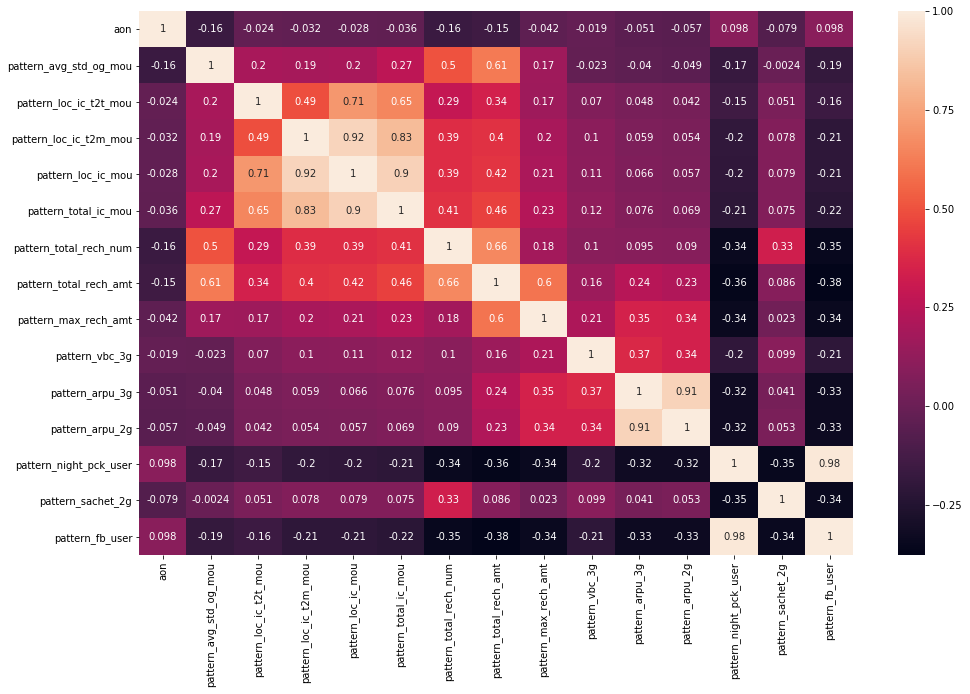

In [83]:
# Working on Pattern Data first
col_pattern = X_train_pattern_balanced.columns[rfe_pattern.support_]
X_train_pattern_rfe = X_train_pattern_balanced[col_pattern]
#X_test_pattern_rfe = X_test_pattern_balanced[col_pattern]

#function for calculating VIF - to calculate and then remove multicolinearlity
def vif_cal(input_data):
    vif_df = pd.DataFrame( columns = ['Var', 'Vif'])
    x_vars=input_data
    xvar_names=x_vars.columns
    for i in range(0,xvar_names.shape[0]):
        y=x_vars[xvar_names[i]]
        x=x_vars[xvar_names.drop(xvar_names[i])]
        rsq=sm.OLS(y,x).fit().rsquared
        vif=round(1/(1-rsq),2)
        vif_df.loc[i] = [xvar_names[i], vif]
    return vif_df.sort_values(by = 'Vif', axis=0, ascending=False, inplace=False)



plt.figure(figsize = (16,10))     # Size of the figure
sns.heatmap(X_train_pattern_balanced[col_pattern].corr(), annot = True)

In [84]:
# From the above heat map we can see following are multicolinear
# pattern_total_ic_mou and pattern_loc_ic_t2m_mou
# pattern_loc_ic_mou and pattern_loc_ic_t2t_mou 
# etc. Hence, we need to remove multicolinearity from the model

In [85]:
import statsmodels.api as sm  
lm1 = sm.GLM(y_train_pattern_balanced,X_train_pattern_rfe, family = sm.families.Binomial()).fit()
#Let's see the summary of our linear model
print(lm1.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                38546
Model:                            GLM   Df Residuals:                    38531
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -19760.
Date:                Sun, 26 Aug 2018   Deviance:                       39520.
Time:                        18:22:22   Pearson chi2:                 4.15e+04
No. Iterations:                     5                                         
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
aon                       -0.3247      0.013    -24.255      0.000      -0.351      -0.298
pattern_avg_std_

In [86]:
print(vif_cal(input_data=X_train_pattern_rfe))

                       Var    Vif
14         pattern_fb_user  37.52
12  pattern_night_pck_user  36.97
4       pattern_loc_ic_mou  19.71
3   pattern_loc_ic_t2m_mou  10.15
5     pattern_total_ic_mou   6.33
10         pattern_arpu_3g   6.26
11         pattern_arpu_2g   6.08
7   pattern_total_rech_amt   5.18
2   pattern_loc_ic_t2t_mou   3.14
6   pattern_total_rech_num   2.83
8     pattern_max_rech_amt   2.27
1   pattern_avg_std_og_mou   2.14
13       pattern_sachet_2g   1.37
9           pattern_vbc_3g   1.22
0                      aon   1.07


In [87]:
# p-value of all is 0.00
# let's look at VIF
# pattern_fb_user has high VIF
# let's create a model without pattern_fb_user
# Let's remove pattern_fb_user as it's VIF is high and coefficient is also highly negative
X_train_pattern_rfe = X_train_pattern_rfe.drop('pattern_fb_user', 1)

# Create a second fitted model
lm_2 = sm.GLM(y_train_pattern_balanced,X_train_pattern_rfe, family = sm.families.Binomial()).fit()

#Let's see the summary of our second linear model
print(lm_2.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                38546
Model:                            GLM   Df Residuals:                    38532
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -19809.
Date:                Sun, 26 Aug 2018   Deviance:                       39618.
Time:                        18:24:30   Pearson chi2:                 4.17e+04
No. Iterations:                     5                                         
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
aon                       -0.3226      0.013    -24.144      0.000      -0.349      -0.296
pattern_avg_std_

In [88]:
print(vif_cal(input_data=X_train_pattern_rfe))

                       Var    Vif
4       pattern_loc_ic_mou  19.71
3   pattern_loc_ic_t2m_mou  10.15
5     pattern_total_ic_mou   6.33
10         pattern_arpu_3g   6.25
11         pattern_arpu_2g   6.08
7   pattern_total_rech_amt   5.16
2   pattern_loc_ic_t2t_mou   3.14
6   pattern_total_rech_num   2.83
8     pattern_max_rech_amt   2.26
1   pattern_avg_std_og_mou   2.14
12  pattern_night_pck_user   1.61
13       pattern_sachet_2g   1.37
9           pattern_vbc_3g   1.21
0                      aon   1.07


In [89]:
# VIF has reduced
# let's remove pattern_loc_ic_mou as it has high VIF 
X_train_pattern_rfe = X_train_pattern_rfe.drop('pattern_loc_ic_mou', 1)
lm_3 = sm.GLM(y_train_pattern_balanced,X_train_pattern_rfe, family = sm.families.Binomial()).fit()
print(lm_3.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                38546
Model:                            GLM   Df Residuals:                    38533
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -19837.
Date:                Sun, 26 Aug 2018   Deviance:                       39675.
Time:                        18:25:09   Pearson chi2:                 4.16e+04
No. Iterations:                     5                                         
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
aon                       -0.3234      0.013    -24.226      0.000      -0.350      -0.297
pattern_avg_std_

In [90]:
print(vif_cal(input_data=X_train_pattern_rfe))

                       Var   Vif
9          pattern_arpu_3g  6.25
10         pattern_arpu_2g  6.08
6   pattern_total_rech_amt  5.16
4     pattern_total_ic_mou  4.89
3   pattern_loc_ic_t2m_mou  3.62
5   pattern_total_rech_num  2.83
7     pattern_max_rech_amt  2.26
1   pattern_avg_std_og_mou  2.11
2   pattern_loc_ic_t2t_mou  1.85
11  pattern_night_pck_user  1.61
12       pattern_sachet_2g  1.37
8           pattern_vbc_3g  1.21
0                      aon  1.07


In [91]:
# VIF has again reduced
# let's remove pattern_arpu_3g as it has high VIF and is negatively correlated (has a negative coefficent)
X_train_pattern_rfe = X_train_pattern_rfe.drop('pattern_arpu_3g', 1)
lm_4 = sm.GLM(y_train_pattern_balanced,X_train_pattern_rfe,family = sm.families.Binomial()).fit()
print(lm_4.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                38546
Model:                            GLM   Df Residuals:                    38534
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -19849.
Date:                Sun, 26 Aug 2018   Deviance:                       39698.
Time:                        18:28:22   Pearson chi2:                 4.16e+04
No. Iterations:                     5                                         
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
aon                       -0.3237      0.013    -24.249      0.000      -0.350      -0.298
pattern_avg_std_

In [92]:
print(vif_cal(input_data=X_train_pattern_rfe))

                       Var   Vif
6   pattern_total_rech_amt  5.14
4     pattern_total_ic_mou  4.89
3   pattern_loc_ic_t2m_mou  3.62
5   pattern_total_rech_num  2.83
7     pattern_max_rech_amt  2.26
1   pattern_avg_std_og_mou  2.11
2   pattern_loc_ic_t2t_mou  1.85
10  pattern_night_pck_user  1.60
9          pattern_arpu_2g  1.37
11       pattern_sachet_2g  1.36
8           pattern_vbc_3g  1.19
0                      aon  1.07


In [93]:
# let's remove pattern_total_rech_amt as it has high VIF 
X_train_pattern_rfe = X_train_pattern_rfe.drop('pattern_total_rech_amt', 1)
lm_5 = sm.GLM(y_train_pattern_balanced,X_train_pattern_rfe,family = sm.families.Binomial()).fit()
print(lm_5.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                38546
Model:                            GLM   Df Residuals:                    38535
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -19865.
Date:                Sun, 26 Aug 2018   Deviance:                       39729.
Time:                        18:28:45   Pearson chi2:                 4.16e+04
No. Iterations:                     5                                         
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
aon                       -0.3254      0.013    -24.393      0.000      -0.352      -0.299
pattern_avg_std_

In [94]:
print(vif_cal(input_data=X_train_pattern_rfe))

                       Var   Vif
4     pattern_total_ic_mou  4.88
3   pattern_loc_ic_t2m_mou  3.61
5   pattern_total_rech_num  2.08
2   pattern_loc_ic_t2t_mou  1.84
1   pattern_avg_std_og_mou  1.62
9   pattern_night_pck_user  1.60
6     pattern_max_rech_amt  1.38
8          pattern_arpu_2g  1.36
10       pattern_sachet_2g  1.34
7           pattern_vbc_3g  1.19
0                      aon  1.07


In [95]:
# let's remove pattern_total_ic_mou as it has high VIF 
X_train_pattern_rfe = X_train_pattern_rfe.drop('pattern_total_ic_mou', 1)
lm_6 = sm.GLM(y_train_pattern_balanced,X_train_pattern_rfe, family = sm.families.Binomial()).fit()
print(lm_6.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                38546
Model:                            GLM   Df Residuals:                    38536
Model Family:                Binomial   Df Model:                            9
Link Function:                  logit   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -19886.
Date:                Sun, 26 Aug 2018   Deviance:                       39771.
Time:                        18:29:19   Pearson chi2:                 4.16e+04
No. Iterations:                     5                                         
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
aon                       -0.3236      0.013    -24.286      0.000      -0.350      -0.297
pattern_avg_std_

In [96]:
print(vif_cal(input_data=X_train_pattern_rfe))

                      Var   Vif
4  pattern_total_rech_num  2.07
1  pattern_avg_std_og_mou  1.60
8  pattern_night_pck_user  1.60
3  pattern_loc_ic_t2m_mou  1.56
2  pattern_loc_ic_t2t_mou  1.40
5    pattern_max_rech_amt  1.38
7         pattern_arpu_2g  1.36
9       pattern_sachet_2g  1.34
6          pattern_vbc_3g  1.19
0                     aon  1.07


In [97]:
# Let's keep lm6 model from pattern data set and let's compare it with non pattern data set further and then decide which features
# are important

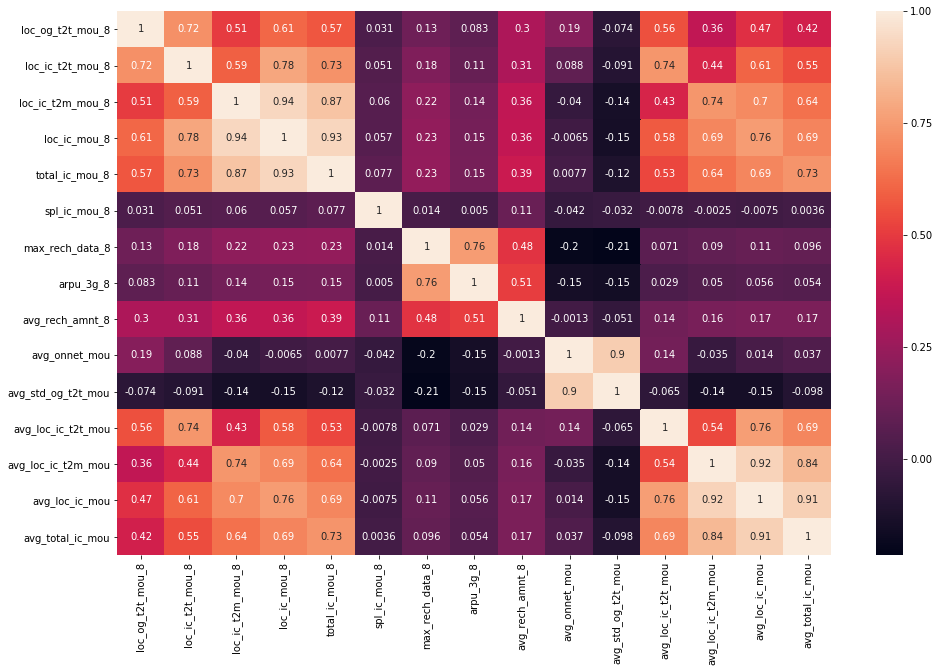

In [98]:
# Working on Non Pattern Data first
col_no_pattern = X_train_no_pattern_balanced.columns[rfe_no_pattern.support_]
X_train_no_pattern_rfe = X_train_no_pattern_balanced[col_no_pattern]

plt.figure(figsize = (16,10))     # Size of the figure
sns.heatmap(X_train_no_pattern_balanced[col_no_pattern].corr(), annot = True)

In [99]:
# From the above heat map we can see that many columns are correlated
# loc_og_t2t_mou_8 is highly correlated with loc_ic_t2t_mou_8
# loc_ic_t2t_mou_8 is highly correlated with avg_loc_ic_mou
# avg_loc_ic_t2m_mou with avg_loc_ic_mou and with avg_total_ic_mou
# etc. Hence, we will use VIF method to remove multi colinearity

In [100]:
import statsmodels.api as sm
lm7 = sm.GLM(y_train_no_pattern_balanced, X_train_no_pattern_rfe, family = sm.families.Binomial()).fit()    # our model is not linear
# GLM allows for different distributions of the residuals and non-linear functions. Essentially it uses a transformation that straightens the regression.
#Let's see the summary of ouR model
print(lm7.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                38546
Model:                            GLM   Df Residuals:                    38531
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -19489.
Date:                Sun, 26 Aug 2018   Deviance:                       38977.
Time:                        18:30:28   Pearson chi2:                 3.69e+04
No. Iterations:                     5                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
loc_og_t2t_mou_8      -0.3759      0.026    -14.402      0.000      -0.427      -0.325
loc_ic_t2t_mou_8      -0.462

In [101]:
# p-values are 0
# let's see VIF
print(vif_cal(input_data=X_train_no_pattern_rfe))

                   Var    Vif
3         loc_ic_mou_8  56.50
13      avg_loc_ic_mou  44.48
2     loc_ic_t2m_mou_8  26.58
12  avg_loc_ic_t2m_mou  21.09
4       total_ic_mou_8  16.87
14    avg_total_ic_mou  11.34
9        avg_onnet_mou   9.67
10  avg_std_og_t2t_mou   9.20
1     loc_ic_t2t_mou_8   8.97
11  avg_loc_ic_t2t_mou   7.25
0     loc_og_t2t_mou_8   3.29
6      max_rech_data_8   2.73
7            arpu_3g_8   2.65
8      avg_rech_amnt_8   1.94
5         spl_ic_mou_8   1.05


In [102]:
# let's check the heat map for loc_ic_mou_8
# loc_ic_mou_8 is highly correlated in decreasing order with loc_ic_t2m_mou_8, total_ic_mou_8, loc_ic_t2t_mou_m, avg_loc_ic_mou,avg_local_ic_t2m_mou ,avg_total_ic_mou
# Let's see the coefficient out of loc_ic_mou_8 and loc_ic_t2m_mou_8 -> loc_ic_mou_8 has a positive and higher coefficient
# So, let's remove loc_ic_t2m_mou_8 
X_train_no_pattern_rfe = X_train_no_pattern_rfe.drop('loc_ic_t2m_mou_8', 1)
lm_8 = sm.GLM(y_train_no_pattern_balanced,X_train_no_pattern_rfe,family = sm.families.Binomial()).fit()
print(lm_8.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                38546
Model:                            GLM   Df Residuals:                    38532
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -19594.
Date:                Sun, 26 Aug 2018   Deviance:                       39187.
Time:                        18:31:03   Pearson chi2:                 3.70e+04
No. Iterations:                     5                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
loc_og_t2t_mou_8      -0.4040      0.026    -15.426      0.000      -0.455      -0.353
loc_ic_t2t_mou_8      -0.114

In [103]:
# p-value for avg_loc_ic_t2m_mou is high
X_train_no_pattern_rfe = X_train_no_pattern_rfe.drop('avg_loc_ic_t2m_mou', 1)
lm_9 = sm.GLM(y_train_no_pattern_balanced,X_train_no_pattern_rfe,family = sm.families.Binomial()).fit()
print(lm_9.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                38546
Model:                            GLM   Df Residuals:                    38533
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -19594.
Date:                Sun, 26 Aug 2018   Deviance:                       39187.
Time:                        18:32:11   Pearson chi2:                 3.70e+04
No. Iterations:                     5                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
loc_og_t2t_mou_8      -0.4021      0.026    -15.449      0.000      -0.453      -0.351
loc_ic_t2t_mou_8      -0.116

In [104]:
print(vif_cal(input_data=X_train_no_pattern_rfe))

                   Var    Vif
2         loc_ic_mou_8  20.55
3       total_ic_mou_8  16.85
11      avg_loc_ic_mou  14.73
12    avg_total_ic_mou  11.33
8        avg_onnet_mou   9.59
9   avg_std_og_t2t_mou   9.12
1     loc_ic_t2t_mou_8   6.14
10  avg_loc_ic_t2t_mou   4.81
0     loc_og_t2t_mou_8   3.24
5      max_rech_data_8   2.73
6            arpu_3g_8   2.65
7      avg_rech_amnt_8   1.91
4         spl_ic_mou_8   1.05


In [105]:
# loc_ic_mou_8 has p-value greater than 0.02 and has high VIF
X_train_no_pattern_rfe = X_train_no_pattern_rfe.drop('loc_ic_mou_8', 1)
lm_10 = sm.GLM(y_train_no_pattern_balanced,X_train_no_pattern_rfe,family = sm.families.Binomial()).fit()
print(lm_10.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                38546
Model:                            GLM   Df Residuals:                    38534
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -19596.
Date:                Sun, 26 Aug 2018   Deviance:                       39192.
Time:                        18:34:23   Pearson chi2:                 3.71e+04
No. Iterations:                     5                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
loc_og_t2t_mou_8      -0.4048      0.026    -15.561      0.000      -0.456      -0.354
loc_ic_t2t_mou_8      -0.140

In [106]:
print(vif_cal(input_data=X_train_no_pattern_rfe))

                   Var   Vif
7        avg_onnet_mou  9.58
8   avg_std_og_t2t_mou  9.12
10      avg_loc_ic_mou  7.78
11    avg_total_ic_mou  7.76
1     loc_ic_t2t_mou_8  5.51
2       total_ic_mou_8  5.17
9   avg_loc_ic_t2t_mou  4.55
0     loc_og_t2t_mou_8  3.23
4      max_rech_data_8  2.73
5            arpu_3g_8  2.65
6      avg_rech_amnt_8  1.91
3         spl_ic_mou_8  1.05


In [107]:
X_train_no_pattern_rfe = X_train_no_pattern_rfe.drop('avg_onnet_mou', 1)
lm_11 = sm.GLM(y_train_no_pattern_balanced,X_train_no_pattern_rfe,family = sm.families.Binomial()).fit()
print(lm_11.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                38546
Model:                            GLM   Df Residuals:                    38535
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -19689.
Date:                Sun, 26 Aug 2018   Deviance:                       39379.
Time:                        18:35:11   Pearson chi2:                 3.69e+04
No. Iterations:                     5                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
loc_og_t2t_mou_8      -0.2060      0.021     -9.865      0.000      -0.247      -0.165
loc_ic_t2t_mou_8      -0.198

In [108]:
print(vif_cal(input_data=X_train_no_pattern_rfe))

                   Var   Vif
9       avg_loc_ic_mou  7.78
10    avg_total_ic_mou  7.76
1     loc_ic_t2t_mou_8  5.38
2       total_ic_mou_8  5.15
8   avg_loc_ic_t2t_mou  4.30
4      max_rech_data_8  2.72
5            arpu_3g_8  2.65
0     loc_og_t2t_mou_8  2.38
6      avg_rech_amnt_8  1.91
7   avg_std_og_t2t_mou  1.10
3         spl_ic_mou_8  1.04


In [109]:
X_train_no_pattern_rfe = X_train_no_pattern_rfe.drop('avg_loc_ic_mou', 1)
lm_12 = sm.GLM(y_train_no_pattern_balanced,X_train_no_pattern_rfe,family = sm.families.Binomial()).fit()
print(lm_12.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                38546
Model:                            GLM   Df Residuals:                    38536
Model Family:                Binomial   Df Model:                            9
Link Function:                  logit   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -19733.
Date:                Sun, 26 Aug 2018   Deviance:                       39465.
Time:                        18:35:59   Pearson chi2:                 3.67e+04
No. Iterations:                     5                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
loc_og_t2t_mou_8      -0.2156      0.021    -10.355      0.000      -0.256      -0.175
loc_ic_t2t_mou_8      -0.208

In [110]:
print(vif_cal(input_data=X_train_no_pattern_rfe))

                  Var   Vif
1    loc_ic_t2t_mou_8  5.38
2      total_ic_mou_8  5.14
9    avg_total_ic_mou  3.90
8  avg_loc_ic_t2t_mou  3.89
4     max_rech_data_8  2.71
5           arpu_3g_8  2.64
0    loc_og_t2t_mou_8  2.37
6     avg_rech_amnt_8  1.91
7  avg_std_og_t2t_mou  1.07
3        spl_ic_mou_8  1.04


In [111]:
# looking at the heat map loc_ic_t2t_mou_8 and total_ic_mou_8. both are correlated to each other and have almost same VIF.
# As the coefficient of total_ic_mou_8 is higher than the other variable. Let's remove loc_ic_t2t_mou_8
X_train_no_pattern_rfe = X_train_no_pattern_rfe.drop('loc_ic_t2t_mou_8', 1)
lm_13 = sm.GLM(y_train_no_pattern_balanced,X_train_no_pattern_rfe,family = sm.families.Binomial()).fit()
print(lm_13.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                38546
Model:                            GLM   Df Residuals:                    38537
Model Family:                Binomial   Df Model:                            8
Link Function:                  logit   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -19752.
Date:                Sun, 26 Aug 2018   Deviance:                       39505.
Time:                        18:41:33   Pearson chi2:                 3.66e+04
No. Iterations:                     5                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
loc_og_t2t_mou_8      -0.2557      0.020    -12.919      0.000      -0.295      -0.217
total_ic_mou_8        -1.066

In [112]:
print(vif_cal(input_data=X_train_no_pattern_rfe))

                  Var   Vif
1      total_ic_mou_8  3.51
8    avg_total_ic_mou  3.38
3     max_rech_data_8  2.71
4           arpu_3g_8  2.64
7  avg_loc_ic_t2t_mou  2.46
0    loc_og_t2t_mou_8  2.05
5     avg_rech_amnt_8  1.91
6  avg_std_og_t2t_mou  1.07
2        spl_ic_mou_8  1.04


In [113]:
# avg_loc_ic_t2t_mou has high p-value 
X_train_no_pattern_rfe = X_train_no_pattern_rfe.drop('avg_loc_ic_t2t_mou', 1)
lm_14 = sm.GLM(y_train_no_pattern_balanced,X_train_no_pattern_rfe,family = sm.families.Binomial()).fit()
print(lm_14.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                38546
Model:                            GLM   Df Residuals:                    38538
Model Family:                Binomial   Df Model:                            7
Link Function:                  logit   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -19753.
Date:                Sun, 26 Aug 2018   Deviance:                       39506.
Time:                        18:43:30   Pearson chi2:                 3.66e+04
No. Iterations:                     5                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
loc_og_t2t_mou_8      -0.2442      0.018    -13.823      0.000      -0.279      -0.210
total_ic_mou_8        -1.071

In [114]:
print(vif_cal(input_data=X_train_no_pattern_rfe))

                  Var   Vif
1      total_ic_mou_8  3.45
3     max_rech_data_8  2.71
4           arpu_3g_8  2.64
7    avg_total_ic_mou  2.32
5     avg_rech_amnt_8  1.91
0    loc_og_t2t_mou_8  1.66
6  avg_std_og_t2t_mou  1.07
2        spl_ic_mou_8  1.04


In [ ]:
# Let's look at the confusion matrix and then decide the further step

In [119]:
X_test_pattern_rfe = X_test_pattern_balanced[col_pattern]

In [124]:
X_test_no_pattern_rfe = X_test_no_pattern_balanced[col_no_pattern]

In [125]:
X_test_no_pattern_rfe = X_test_no_pattern_rfe.drop(['loc_ic_t2m_mou_8', 'avg_loc_ic_t2m_mou', 'loc_ic_mou_8', 'avg_onnet_mou', 
                              "avg_loc_ic_mou", 'loc_ic_t2t_mou_8','avg_loc_ic_t2t_mou' ], axis=1)

In [126]:
log_model = LogisticRegression(class_weight="balanced")
log_model.fit(X_train_no_pattern_rfe, y_train_no_pattern_balanced)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [127]:
X_test_no_pattern_rfe.columns

Index(['loc_og_t2t_mou_8', 'total_ic_mou_8', 'spl_ic_mou_8', 'max_rech_data_8',
       'arpu_3g_8', 'avg_rech_amnt_8', 'avg_std_og_t2t_mou',
       'avg_total_ic_mou'],
      dtype='object')

In [128]:
X_train_no_pattern_rfe.columns

Index(['loc_og_t2t_mou_8', 'total_ic_mou_8', 'spl_ic_mou_8', 'max_rech_data_8',
       'arpu_3g_8', 'avg_rech_amnt_8', 'avg_std_og_t2t_mou',
       'avg_total_ic_mou'],
      dtype='object')

In [132]:
pred_probs_no_pattern = log_model.predict(X_test_no_pattern_rfe)

In [133]:
from sklearn import metrics
"{:2.2f}".format(metrics.roc_auc_score(y_test_no_pattern_balanced, pred_probs_no_pattern))

'0.80'

In [135]:
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
confusion = metrics.confusion_matrix(y_test_no_pattern_balanced, pred_probs_no_pattern)
confusion

array([[6470, 1817],
       [1461, 6826]], dtype=int64)

In [136]:
print("recall", metrics.recall_score(y_test_no_pattern_balanced, pred_probs_no_pattern))

recall 0.8236997707252323


In [137]:
# For second model where we need to find the features contrinution churn; we will also check the accuracy
print("accuracy", metrics.accuracy_score(y_test_no_pattern_balanced, pred_probs_no_pattern))

accuracy 0.8022203451188609


Model 14 with variables
loc_og_t2t_mou_8', 'total_ic_mou_8', 'spl_ic_mou_8', 'max_rech_data_8',
'arpu_3g_8', 'avg_rech_amnt_8', 'avg_std_og_t2t_mou',
'avg_total_ic_mou'
returned recall of 82.3% and accuracy of 80.22%

In [ ]:
# Let's now remove total_ic_mou_8 from model 14 as it also had a high VIF
X_train_no_pattern_rfe = X_train_no_pattern_rfe.drop('total_ic_mou_8', 1)

In [140]:
lm_15 = sm.GLM(y_train_no_pattern_balanced,X_train_no_pattern_rfe,family = sm.families.Binomial()).fit()
print(lm_15.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                38546
Model:                            GLM   Df Residuals:                    38539
Model Family:                Binomial   Df Model:                            6
Link Function:                  logit   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -20649.
Date:                Sun, 26 Aug 2018   Deviance:                       41299.
Time:                        19:20:11   Pearson chi2:                 3.69e+04
No. Iterations:                     4                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
loc_og_t2t_mou_8      -0.5021      0.017    -29.869      0.000      -0.535      -0.469
spl_ic_mou_8          -0.356

In [141]:
print(vif_cal(input_data=X_train_no_pattern_rfe))

                  Var   Vif
2     max_rech_data_8  2.66
3           arpu_3g_8  2.61
4     avg_rech_amnt_8  1.74
0    loc_og_t2t_mou_8  1.41
6    avg_total_ic_mou  1.27
5  avg_std_og_t2t_mou  1.07
1        spl_ic_mou_8  1.03


In [142]:
X_test_no_pattern_rfe = X_test_no_pattern_rfe.drop(['total_ic_mou_8'], axis=1)

In [143]:
log_model1 = LogisticRegression(class_weight="balanced")
log_model1.fit(X_train_no_pattern_rfe, y_train_no_pattern_balanced)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [144]:
pred_probs_no_pattern1 = log_model1.predict(X_test_no_pattern_rfe)

In [146]:
"{:2.2f}".format(metrics.roc_auc_score(y_test_no_pattern_balanced, pred_probs_no_pattern1))

'0.77'

In [147]:
confusion = metrics.confusion_matrix(y_test_no_pattern_balanced, pred_probs_no_pattern1)
confusion

array([[6059, 2228],
       [1538, 6749]], dtype=int64)

In [148]:
print("recall", metrics.recall_score(y_test_no_pattern_balanced, pred_probs_no_pattern1))
print("accuracy", metrics.accuracy_score(y_test_no_pattern_balanced, pred_probs_no_pattern1))

recall 0.8144081090865211
accuracy 0.7727766381078798


In [149]:
# Recall and accuracy dropped hence, model 14 was better than model model 15

In [150]:
# Let's analyse model 6 for pattern data

In [151]:
X_test_pattern_rfe = X_test_pattern_rfe.drop(['pattern_fb_user', 'pattern_loc_ic_mou', 'pattern_arpu_3g', 'pattern_total_rech_amt', 
                              "pattern_total_ic_mou"], axis=1)

In [152]:
log_model2 = LogisticRegression(class_weight="balanced")
log_model2.fit(X_train_pattern_rfe, y_train_pattern_balanced)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [156]:
pred_probs_pattern = log_model2.predict(X_test_pattern_rfe)

In [157]:
"{:2.2f}".format(metrics.roc_auc_score(y_test_pattern_balanced, pred_probs_pattern))

'0.78'

In [158]:
confusion = metrics.confusion_matrix(y_test_pattern_balanced, pred_probs_pattern)
confusion

array([[6742, 1545],
       [2109, 6178]], dtype=int64)

In [159]:
print("recall", metrics.recall_score(y_test_pattern_balanced, pred_probs_pattern))
print("accuracy", metrics.accuracy_score(y_test_pattern_balanced, pred_probs_pattern))

recall 0.7455050078436105
accuracy 0.7795342102087607


Comparing the accuracy and recall of model 6 (pattern data) is less as compared to model 14 (non pattern data)
Logistic regression for feature selection also gave better result with non-pattern data

# Conclusion

Requirement

1) Creation of model to predict churn
2) Creation of model to find important features contrubuting to churn

Models created to predict churn via following algorithms
1) Logistic Regression on balanced data that has PCA applied on it
2) Random forest that is applied on the balanced dataset (it is not on PCA)
3) SVM - on PCA dataset 

Models created to find important features via following algorithms 
1) Random forest
2) RFE and logistic regression

Datasets used
1) Pattern 
2) Non- Pattern (both are explained already)

PCA Conclusions (Increamental PCA) 
1) Scree Plot
    1) Pattern dataset - 40 components
    2) Non Pattern dataset - 70 components
 
Logistic Regression on balanced data that has PCA applied on it 
ROC Score
1) Pattern dataset 
    1) 40 components - 0.85
    2) 30 components - 0.85
    3) 25 components - 0.85
    4) 15 components - 0.84
    5) 90% variance - 25 components - 0.85
2) Non-Pattern dataset
    1) 70 components - 0.91
    2) 60 components - 0.91
    3) 40 components - 0.91
    4) 25 components - 0.90
    5) 90% variance - 37 components - 0.91

Conclusion 1: Non-pattern data set model with 90% variance having 37 components gave 91% of ROC Score with
Recall 83%.


Random Forest:
1) Without any hyperparameter
    Recall for 1(churn) - 78.4 %
2) Optimal max_depth found - 12 
3) Grid search to find all optimal parameters - recall 50%


SVM
1) C=1 recall - 77.65% 
2) changing C - recall = 68.4%
3) Tuning hyperparameter recall - 
at C = 10 - recall = 99.67% 
SVM gave a really good recall but takes lots of time to execute on huge dataset

Random Forest for important feature selection - it gave 50% recall hence, let's move to logistic regression

RFE and Logistic regression for important feature selection
1) Model 6 on pattern dataset - recall - 74.55%
pattern_total_rech_num  
pattern_avg_std_og_mou  
pattern_night_pck_user  
pattern_loc_ic_t2m_mou  
pattern_loc_ic_t2t_mou  
pattern_max_rech_amt  
pattern_arpu_2g  
pattern_sachet_2g 
pattern_vbc_3g 
aon 

the above mean that total number of recharge pattern i.e. the flag value comparing action phase and good phase,
flag for std outgoing usage, flag for night pack users, flag for local incoming from same operator and from other operator,
flag for maximum recharge amount, average revenue for 2g, sachet for 2g, vbc for 2g and Age on network.

2) Model 14 on non-pattern dataset - recall - 81.44%
Important features
total_ic_mou_8 
max_rech_data_8
arpu_3g_8
avg_total_ic_mou
avg_rech_amnt_8 
loc_og_t2t_mou_8 
avg_std_og_t2t_mou 
spl_ic_mou_8 

which means month 8 important features are:
    1) total incoming minutes of usage
    2) maximum recharge data 
    3) average revenue per user
    4) average recharge amount
    5) local outgoing with in same operator mobile to mobile
    6) special incoming minutes of usage
    
month 6 and 7 important features - refers to average.
    1) total incoming minutes of usage
    2) std outgoing with in same operator mobile to mobile 
  
Hence, more usage via total incoming calls and more local outgoing calls in the same operator,  more the recharge amount in month 8 refers to less churn probability
Note: the dataset at many places has the word as total but after data analysi, it was found that total does not include all the values of it's kind.

Performance of model 14 is better than model 6. Hence, consider model 14.
    
